___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME To Our ML Classification Project!

In this project we will work together as a teem to complete this project, we will apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenging.

This project aims to improve our ability to implement algorithms for Multi-Class Classification. Thus, we will implement many algorithms commonly used for Multi-Class Classification problems.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, we need to understand the data well and develop different approaches that can affect the dependent variable.

Firstly, we will try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

We will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of our models with appropriate performance metrics.

At the end of the project, we will choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, we will use ***SHAP*** to explain how the best model we choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data*
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA 
- Droping unnecessary colums
- Droping DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, we need to import the necessary modules for data visualization, data preprocessing, Model building and tuning etc...


In [313]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
from collections import Counter
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.tree import plot_tree
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import matthews_corrcoef
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from scikitplot.metrics import plot_precision_recall
from imblearn.under_sampling import ClusterCentroids
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import PrecisionRecallDisplay , average_precision_score
from scikitplot.metrics import plot_precision_recall, plot_roc, precision_recall_curve
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score
from sklearn.metrics import accuracy_score, f1_score, make_scorer, precision_score, recall_score, roc_auc_score




plt.rcParams["figure.figsize"] = (7,4)


# These becuase we have many features, and we want to display all of them
pd.set_option("display.max_rows", 30)
pd.set_option("display.max_columns", 30)

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [314]:
# import dataframes
df_male = pd.read_csv("ANSUR II MALE Public.csv", encoding="ISO-8859-1")
df_female = pd.read_csv("ANSUR II FEMALE Public.csv", encoding="ISO-8859-1")

# merge female dataframe with male dataframe
df = pd.concat([df_male, df_female])
df = df.reset_index()

# Make a copy of our dataframe for manipulating 
df_copy = df.copy()
df_copy

index  subjectid  abdominalextensiondepthsitting  acromialheight   
0         0  10027.000                             266            1467  \
1         1  10032.000                             233            1395   
2         2  10033.000                             287            1430   
3         3  10092.000                             234            1347   
4         4  10093.000                             250            1585   
...     ...        ...                             ...             ...   
6063   1981        NaN                             285            1392   
6064   1982        NaN                             262            1324   
6065   1983        NaN                             260            1334   
6066   1984        NaN                             205            1293   
6067   1985        NaN                             238            1346   

      acromionradialelength  anklecircumference  axillaheight   
0                       337                 222          1347  \
1                       326                 220          1293   
2                       341                 230          1327   
3                       310                 230          1239   
4                       372                 247          1478   
...                     ...                 ...           ...   
6063                    335                 223          1297   
6064                    301                 202          1204   
6065                    318                 213          1259   
6066                    302                 199          1207   
6067                    308                 210          1256   

      balloffootcircumference  balloffootlength  biacromialbreadth   
0                         253               202                401  \
1                         245               193                394   
2                         256               196                427   
3                         262               199                401   
4                         267               224                435   
...                       ...               ...                ...   
6063                      252               196                368   
6064                      236               181                378   
6065                      234               183                363   
6066                      213               163                376   
6067                      236               188                361   

      bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth   
0                           369               274               493  \
1                           338               257               479   
2                           408               261               544   
3                           359               262               518   
4                           356               263               524   
...                         ...               ...               ...   
6063                        299               312               477   
6064                        294               287               468   
6065                        332               299               460   
6066                        276               280               426   
6067                        285               279               433   

      bimalleolarbreadth  bitragionchinarc  ...  Gender       Date   
0                     71               319  ...    Male   4-Oct-10  \
1                     67               344  ...    Male   4-Oct-10   
2                     75               345  ...    Male   4-Oct-10   
3                     73               328  ...    Male  12-Oct-10   
4                     80               340  ...    Male  12-Oct-10   
...                  ...               ...  ...     ...        ...   
6063                  72               306  ...  Female   5-Apr-12   
6064                  66               309  ...  Female   5-Apr-12   
6065        

In [315]:
try:
    # We noticed that one of the columns was named differently in each dataframe
    # sence it's not related with our target at all we decided to drop it
    df_copy = df_copy.drop(["subjectid", "SubjectId"], axis=1)

except:
    print("The column\s that you are trying to drop is\\are already droped!")
    
# It's always best practice to check our dataframe after each manipulation
df_copy

index  abdominalextensiondepthsitting  acromialheight   
0         0                             266            1467  \
1         1                             233            1395   
2         2                             287            1430   
3         3                             234            1347   
4         4                             250            1585   
...     ...                             ...             ...   
6063   1981                             285            1392   
6064   1982                             262            1324   
6065   1983                             260            1334   
6066   1984                             205            1293   
6067   1985                             238            1346   

      acromionradialelength  anklecircumference  axillaheight   
0                       337                 222          1347  \
1                       326                 220          1293   
2                       341                 230          1327   
3                       310                 230          1239   
4                       372                 247          1478   
...                     ...                 ...           ...   
6063                    335                 223          1297   
6064                    301                 202          1204   
6065                    318                 213          1259   
6066                    302                 199          1207   
6067                    308                 210          1256   

      balloffootcircumference  balloffootlength  biacromialbreadth   
0                         253               202                401  \
1                         245               193                394   
2                         256               196                427   
3                         262               199                401   
4                         267               224                435   
...                       ...               ...                ...   
6063                      252               196                368   
6064                      236               181                378   
6065                      234               183                363   
6066                      213               163                376   
6067                      236               188                361   

      bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth   
0                           369               274               493  \
1                           338               257               479   
2                           408               261               544   
3                           359               262               518   
4                           356               263               524   
...                         ...               ...               ...   
6063                        299               312               477   
6064                        294               287               468   
6065                        332               299               460   
6066                        276               280               426   
6067                        285               279               433   

      bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  ...   
0                     71               319                        291  ...  \
1                     67               344                        320  ...   
2                     75               345                        330  ...   
3                     73               328                        309  ...   
4                     80               340                        310  ...   
...                  ...               ...                        ...  ...   
6063                  72               306                        282  ...   
6064                  66               309                        311  ...   
6065                  70               317                        311  .

## Explore Data

In [316]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Columns: 108 entries, index to WritingPreference
dtypes: int64(99), object(9)
memory usage: 5.0+ MB


In [317]:
# Look for DODRace with >= 500 observations
df_copy.groupby("DODRace").count()

index  abdominalextensiondepthsitting  acromialheight   
DODRace                                                          
1         3792                            3792            3792  \
2         1298                            1298            1298   
3          679                             679             679   
4          188                             188             188   
5           49                              49              49   
6           59                              59              59   
8            3                               3               3   

         acromionradialelength  anklecircumference  axillaheight   
DODRace                                                            
1                         3792                3792          3792  \
2                         1298                1298          1298   
3                          679                 679           679   
4                          188                 188           188   
5                           49                  49            49   
6                           59                  59            59   
8                            3                   3             3   

         balloffootcircumference  balloffootlength  biacromialbreadth   
DODRace                                                                 
1                           3792              3792               3792  \
2                           1298              1298               1298   
3                            679               679                679   
4                            188               188                188   
5                             49                49                 49   
6                             59                59                 59   
8                              3                 3                  3   

         bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth   
DODRace                                                                  
1                             3792              3792              3792  \
2                             1298              1298              1298   
3                              679               679               679   
4                              188               188               188   
5                               49                49                49   
6                               59                59                59   
8                                3                 3                 3   

         bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  ...   
DODRace                                                                   ...   
1                      3792              3792                       3792  ...  \
2                      1298              1298                       1298  ...   
3                       679               679                        679  ...   
4                       188               188                        188  ...   
5                        49                49                         49  ...   
6                        59                59                         59  ...   
8                         3                 3                          3  ...   

         wristcircumference  wristheight  Gender  Date  Installation   
DODRace                                                                
1                      3792         3792    3792  3792          3792  \
2                      1298         1298    1298  1298          1298   
3                       679          679     679   679           679   
4                       188          188     188   188           188   
5                        49           49      49    49            49   
6                        59           59      59    59            59   
8                         3            3       3     3             3   

         Component  Branch  PrimaryMOS  SubjectsBirthLocation   
DODRace                         

In [318]:
# We will keap only DODRace with observations > 500 
df_copy = df_copy.query("DODRace in [1, 2, 3]")
df_copy.groupby("DODRace").count()

index  abdominalextensiondepthsitting  acromialheight   
DODRace                                                          
1         3792                            3792            3792  \
2         1298                            1298            1298   
3          679                             679             679   

         acromionradialelength  anklecircumference  axillaheight   
DODRace                                                            
1                         3792                3792          3792  \
2                         1298                1298          1298   
3                          679                 679           679   

         balloffootcircumference  balloffootlength  biacromialbreadth   
DODRace                                                                 
1                           3792              3792               3792  \
2                           1298              1298               1298   
3                            679               679                679   

         bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth   
DODRace                                                                  
1                             3792              3792              3792  \
2                             1298              1298              1298   
3                              679               679               679   

         bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  ...   
DODRace                                                                   ...   
1                      3792              3792                       3792  ...  \
2                      1298              1298                       1298  ...   
3                       679               679                        679  ...   

         wristcircumference  wristheight  Gender  Date  Installation   
DODRace                                                                
1                      3792         3792    3792  3792          3792  \
2                      1298         1298    1298  1298          1298   
3                       679          679     679   679           679   

         Component  Branch  PrimaryMOS  SubjectsBirthLocation   
DODRace                                                         
1             3792    3792        3792                   3792  \
2             1298    1298        1298                   1298   
3              679     679         679                    679   

         SubjectNumericRace  Ethnicity   Age  Heightin  Weightlbs   
DODRace                                                             
1                      3792        229  3792      3792       3792  \
2                      1298        220  1298      1298       1298   
3                       679        676   679       679        679   

         WritingPreference  
DODRace                     
1                     3792  
2                     1298  
3                      679  

[3 rows x 107 columns]

In [319]:
# Check null values
df_copy.isnull().sum()

index                             0
abdominalextensiondepthsitting    0
acromialheight                    0
acromionradialelength             0
anklecircumference                0
                                 ..
DODRace                           0
Age                               0
Heightin                          0
Weightlbs                         0
WritingPreference                 0
Length: 108, dtype: int64

In [320]:
# We can see hear we are missing more than 50% fo Ethnicity values!

In [321]:
# Check duplicates values
df_copy.duplicated().sum()

0

### 1-Explore Numrical Data

In [322]:
# Checking some descriptive information about our dataset
df_copy.describe()

index  abdominalextensiondepthsitting  acromialheight   
count 5769.000                        5769.000        5769.000  \
mean  1698.305                         247.254        1408.630   
std   1133.084                          37.458          78.303   
min      0.000                         155.000        1146.000   
25%    764.000                         220.000        1353.000   
50%   1512.000                         243.000        1412.000   
75%   2567.000                         272.000        1464.000   
max   4081.000                         451.000        1683.000   

       acromionradialelength  anklecircumference  axillaheight   
count               5769.000            5769.000      5769.000  \
mean                 328.072             225.202      1301.903   
std                   20.445              15.966        71.261   
min                  249.000             156.000      1062.000   
25%                  314.000             214.000      1252.000   
50%                  328.000             225.000      1304.000   
75%                  342.000             235.000      1351.000   
max                  393.000             293.000      1553.000   

       balloffootcircumference  balloffootlength  biacromialbreadth   
count                 5769.000          5769.000           5769.000  \
mean                   244.408           195.119            399.706   
std                     16.804            13.379             30.124   
min                    186.000           151.000            283.000   
25%                    233.000           186.000            377.000   
50%                    245.000           196.000            404.000   
75%                    256.000           205.000            422.000   
max                    306.000           245.000            489.000   

       bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth   
count                   5769.000          5769.000          5769.000  \
mean                     341.663           274.903           491.455   
std                       41.271            19.240            42.012   
min                      216.000           197.000           357.000   
25%                      312.000           262.000           461.000   
50%                      342.000           274.000           493.000   
75%                      370.000           288.000           520.000   
max                      490.000           362.000           637.000   

       bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  ...   
count            5769.000          5769.000                   5769.000  ...  \
mean               72.335           324.962                    306.678  ...   
std                 5.327            17.050                     20.819  ...   
min                55.000           267.000                    245.000  ...   
25%                68.000           314.000                    292.000  ...   
50%                73.000           326.000                    307.000  ...   
75%                76.000           336.000                    321.000  ...   
max                91.000           385.000                    390.000  ...   

       verticaltrunkcircumferenceusa  waistbacklength  waistbreadth   
count                       5769.000         5769.000      5769.000  \
mean                        1632.471          460.990       318.410   
std                           98.204           36.706        36.396   
min                         1342.000          345.000       211.000   
25%                         1561.000          435.000       292.000   
50%                         1631.000          463.000       316.000   
75%                         1697.000          486.000       344.000   
max                         1991.000          598.000       461.000   

       waistcircumference  waistdepth  waistfrontlengthsitting   
count            5769.000    5769.000                 5769.000  \
mean              916.817     230.459         

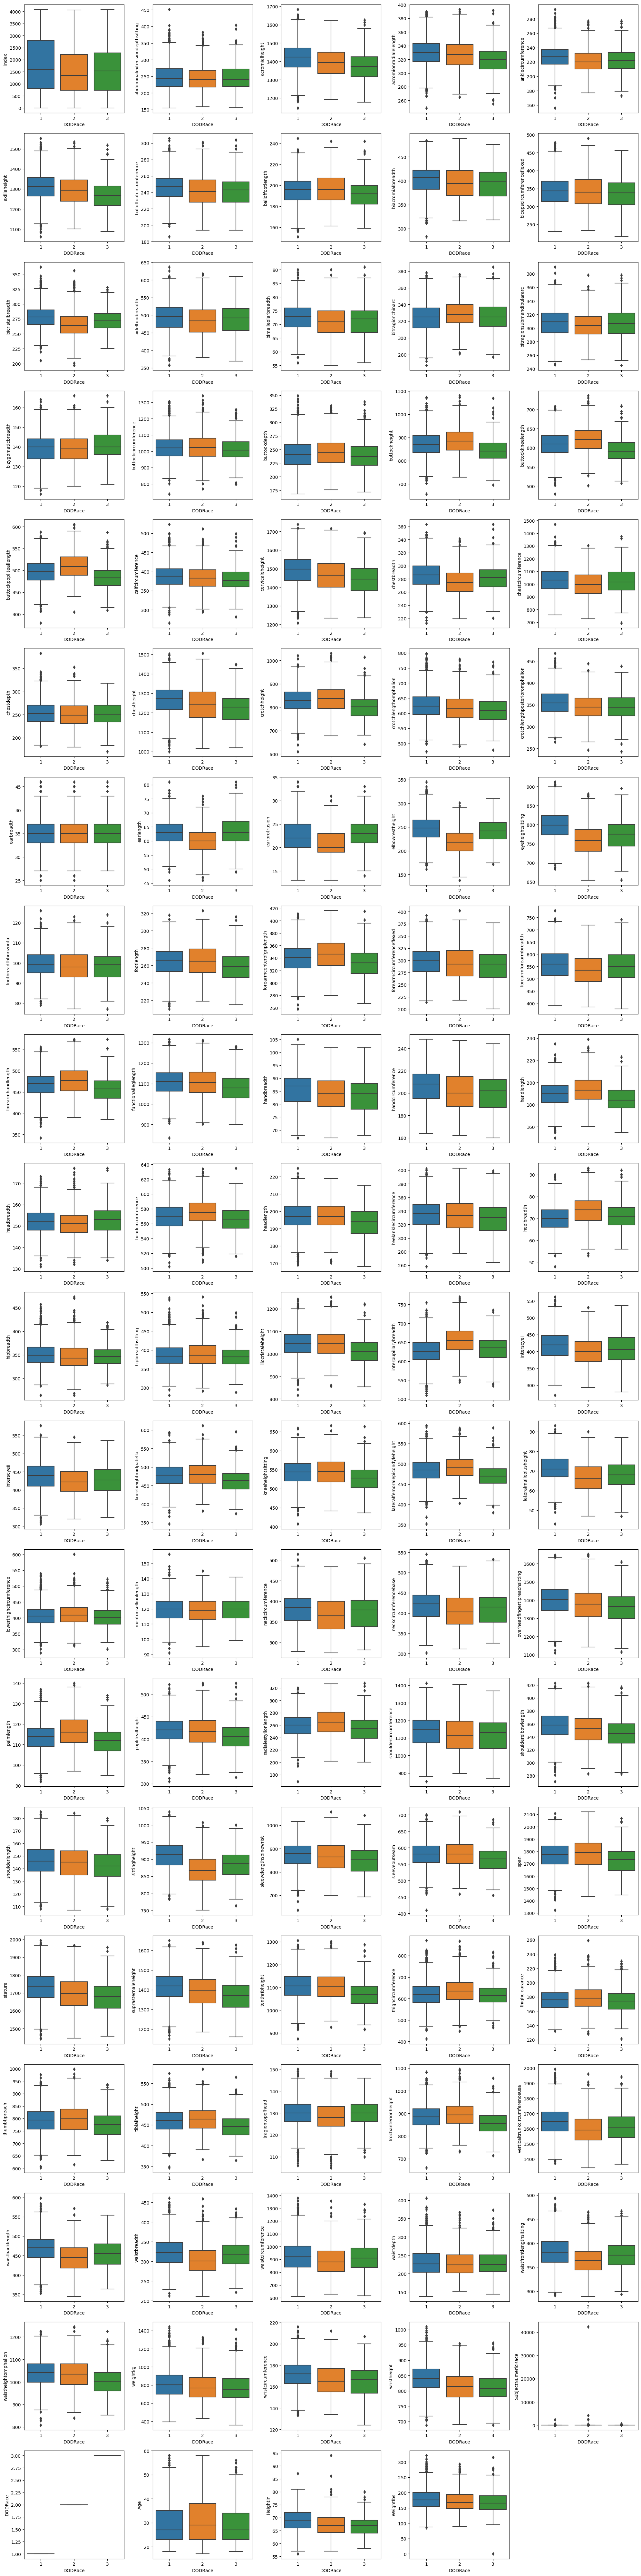

In [323]:
# Here we could see the most distinguishing features and potential outliers

fig = plt.figure(figsize=(20,80))

for i, col in enumerate(df_copy.select_dtypes(include=np.number)):
        plt.subplot(20,5,i+1)
        ax = sns.boxplot(x="DODRace", y=df_copy[col], data=df_copy)
        
plt.tight_layout();

In [324]:
#Calculate the correlation matrix
correlation_matrix = df_copy.corr(numeric_only= True)

pd.set_option('display.max_rows', None)
correlation_matrix


# Display the correlation matrix with colors
def color_red(val):
    
    if (val > 0.90 and val < 1) or (val < -0.90 and val > -1):
        color = 'red'
    else:
        color = 'black'
    return f'color: {color}'


pd.DataFrame(correlation_matrix).corr().style.applymap(color_red)

### 2-Explore Categurical Data

In [325]:
# Checking categorical features and their unique values
cate = df_copy.describe(include="O").T
cate

count unique                     top  freq
Gender                 5769      2                    Male  3899
Date                   5769    253                5-Apr-12    43
Installation           5769     12             Camp Shelby  1111
Component              5769      3            Regular Army  2955
Branch                 5769      3  Combat Service Support  3021
PrimaryMOS             5769    281                     11B   641
SubjectsBirthLocation  5769    136              California   417
Ethnicity              1125    157                 Mexican   356
WritingPreference      5769      3              Right hand  5088

In [326]:
for i in df_copy.describe(include="O"):
    print(str(i) + ":\n" + str(df_copy[i].unique()) + "\n")

Gender:
['Male' 'Female']

Date:
['4-Oct-10' '12-Oct-10' '6-Oct-10' '7-Oct-10' '13-Oct-10' '14-Oct-10'
 '15-Oct-10' '18-Oct-10' '19-Oct-10' '20-Oct-10' '21-Oct-10' '22-Oct-10'
 '25-Oct-10' '26-Oct-10' '27-Oct-10' '28-Oct-10' '29-Oct-10' '2-Nov-10'
 '4-Nov-10' '17-Nov-10' '16-Nov-10' '18-Nov-10' '19-Nov-10' '22-Nov-10'
 '23-Nov-10' '29-Nov-10' '30-Nov-10' '1-Dec-10' '2-Dec-10' '3-Dec-10'
 '6-Dec-10' '7-Dec-10' '10-Dec-10' '8-Dec-10' '13-Dec-10' '14-Dec-10'
 '5-Jan-11' '7-Jan-11' '10-Jan-11' '11-Jan-11' '12-Jan-11' '13-Jan-11'
 '19-Jan-11' '18-Jan-11' '20-Jan-11' '21-Jan-11' '27-Jan-11' '28-Jan-11'
 '30-Jan-11' '31-Jan-11' '7-Feb-11' '8-Feb-11' '9-Feb-11' '11-Feb-11'
 '15-Feb-11' '16-Feb-11' '17-Feb-11' '22-Feb-11' '24-Feb-11' '25-Feb-11'
 '9-Mar-11' '11-Mar-11' '14-Mar-11' '15-Mar-11' '16-Mar-11' '17-Mar-11'
 '18-Mar-11' '22-Mar-11' '21-Mar-11' '24-Mar-11' '25-Mar-11' '26-Mar-11'
 '29-Mar-11' '30-Mar-11' '31-Mar-11' '8-Apr-11' '11-Apr-11' '12-Apr-11'
 '13-Apr-11' '14-Apr-11' '18-Apr-11'

Gender, Component, Branch, SubjectsBirthLocation and WritingPreference could be helpful for us but we have high cardinality in SubjectsBirthLocation column so we will use this dictionary of states/regions and countries/continents to reduce its cardinality.

In [327]:
states_by_region = {
    "Alabama": "South",
    "Alaska": "West",
    "Arizona": "West",
    "Arkansas": "South",
    "California": "West",
    "Colorado": "West",
    "Connecticut": "Northeast",
    "Delaware": "Mid Atlantic",
    "Florida": "South",
    "Georgia": "South",
    "Hawaii": "West",
    "Idaho": "West",
    "Illinois": "Midwest",
    "Indiana": "Midwest",
    "Iowa": "Midwest",
    "Kansas": "Midwest",
    "Kentucky": "South",
    "Louisiana": "South",
    "Maine": "Northeast",
    "Maryland": "Mid Atlantic",
    "Massachusetts": "Northeast",
    "Michigan": "Midwest",
    "Minnesota": "Midwest",
    "Mississippi": "South",
    "Missouri": "Midwest",
    "Montana": "West",
    "Nebraska": "Midwest",
    "Nevada": "West",
    "New Hampshire": "Northeast",
    "New Jersey": "Mid Atlantic",
    "New Mexico": "West",
    "New York": "Northeast",
    "North Carolina": "South",
    "North Dakota": "Midwest",
    "Ohio": "Midwest",
    "Oklahoma": "South",
    "Oregon": "West",
    "Pennsylvania": "Mid Atlantic",
    "Rhode Island": "Northeast",
    "South Carolina": "South",
    "South Dakota": "Midwest",
    "Tennessee": "South",
    "Texas": "South",
    "Utah": "West",
    "Vermont": "Northeast",
    "Virginia": "Mid Atlantic",
    "Washington": "West",
    "West Virginia": "South",
    "Wisconsin": "Midwest",
    "Wyoming": "West",
    "District of Columbia": "Mid Atlantic"
}


countries_by_continent = {
    "Afghanistan": "Asia",
    "Albania": "Europe",
    "Algeria": "Africa",
    "American Samoa": "Oceania",
    "Andorra": "Europe",
    "Angola": "Africa",
    "Antigua and Barbuda": "North America",
    "Argentina": "South America",
    "Armenia": "Asia",
    "Australia": "Oceania",
    "Austria": "Europe",
    "Azerbaijan": "Asia",
    "Bahamas": "North America",
    "Bahrain": "Asia",
    "Bangladesh": "Asia",
    "Barbados": "North America",
    "Belarus": "Europe",
    "Belgium": "Europe",
    "Belize": "North America",
    "Benin": "Africa",
    "Bhutan": "Asia",
    "Bolivia": "South America",
    "Bosnia and Herzegovina": "Europe",
    "Botswana": "Africa",
    "Brazil": "South America",
    "British Virgin Islands": "North America",
    "Brunei": "Asia",
    "Bulgaria": "Europe",
    "Burkina Faso": "Africa",
    "Burundi": "Africa",
    "Cambodia": "Asia",
    "Cameroon": "Africa",
    "Canada": "North America",
    "Cape Verde": "Africa",
    "Central African Republic": "Africa",
    "Chad": "Africa",
    "Chile": "South America",
    "China": "Asia",
    "Colombia": "South America",
    "Comoros": "Africa",
    "Congo, Democratic Republic of the": "Africa",
    "Congo, Republic of the": "Africa",
    "Costa Rica": "North America",
    "Côte d'Ivoire": "Africa",
    "Croatia": "Europe",
    "Cuba": "North America",
    "Cyprus": "Europe",
    "Czech Republic": "Europe",
    "Denmark": "Europe",
    "Djibouti": "Africa",
    "Dominica": "North America",
    "Dominican Republic": "North America",
    "East Timor": "Asia",
    "Ecuador": "South America",
    "Egypt": "Africa",
    "El Salvador": "North America",
    "England": "Europe",
    "Equatorial Guinea": "Africa",
    "Eritrea": "Africa",
    "Estonia": "Europe",
    "Eswatini": "Africa",
    "Ethiopia": "Africa",
    "Federated States of Micronesia": "Oceania",
    "Fiji": "Oceania",
    "Finland": "Europe",
    "France": "Europe",
    "French Guiana": "South America",
    "Gabon": "Africa",
    "Gambia": "Africa",
    "Georgia": "Asia",
    "Germany": "Europe",
    "Ghana": "Africa",
    "Greece": "Europe",
    "Grenada": "North America",
    "Guam": "Oceania",
    "Guadalupe" : "North America",
    "Guatemala": "North America",
    "Guinea": "Africa",
    "Guinea-Bissau": "Africa",
    "Guyana": "South America",
    "Haiti": "North America",
    "Honduras": "North America",
    "Hungary": "Europe",
    "Iceland": "Europe",
    "India": "Asia",
    "Indonesia": "Asia",
    "Iran": "Asia",
    "Iraq": "Asia",
    "Ireland": "Europe",
    "Israel": "Asia",
    "Italy": "Europe",
    "Ivory Coast": "Africa",
    "Jamaica": "North America",
    "Japan": "Asia",
    "Jordan": "Asia",
    "Kazakhstan": "Asia",
    "Kenya": "Africa",
    "Kiribati": "Oceania",
    "Kosovo": "Europe",
    "Kuwait": "Asia",
    "Kyrgyzstan": "Asia",
    "Laos": "Asia",
    "Latvia": "Europe",
    "Lebanon": "Asia",
    "Lesotho": "Africa",
    "Liberia": "Africa",
    "Libya": "Africa",
    "Liechtenstein": "Europe",
    "Lithuania": "Europe",
    "Luxembourg": "Europe",
    "Macedonia, Republic of": "Europe",
    "Madagascar": "Africa",
    "Malawi": "Africa",
    "Malaysia": "Asia",
    "Maldives": "Asia",
    "Mali": "Africa",
    "Malta": "Europe",
    "Marshall Islands": "Oceania",
    "Mauritania": "Africa",
    "Mauritius": "Africa",
    "Mexico": "North America",
    "Micronesia": "Oceania",
    "Moldova": "Europe",
    "Monaco": "Europe",
    "Mongolia": "Asia",
    "Montenegro": "Europe",
    "Morocco": "Africa",
    "Mozambique": "Africa",
    "Myanmar (Burma)": "Asia",
    "Namibia": "Africa",
    "Nauru": "Oceania",
    "Nepal": "Asia",
    "Netherlands": "Europe",
    "New Zealand": "Oceania",
    "Nicaragua": "North America",
    "Niger": "Africa",
    "Nigeria": "Africa",
    "North Korea": "Asia",
    "Norway": "Europe",
    "Oman": "Asia",
    "Pakistan": "Asia",
    "Palau": "Oceania",
    "Palestine": "Asia",
    "Panama": "North America",
    "Papua New Guinea": "Oceania",
    "Paraguay": "South America",
    "Peru": "South America",
    "Philippines": "Asia",
    "Poland": "Europe",
    "Portugal": "Europe",
    "Puerto Rico": "North America",
    "Qatar": "Asia",
    "Romania": "Europe",
    "Russia": "Europe",
    "Rwanda": "Africa",
    "Saint Kitts and Nevis": "North America",
    "Saint Lucia": "North America",
    "Saint Vincent and the Grenadines": "North America",
    "Samoa": "Oceania",
    "San Marino": "Europe",
    "Sao Tome and Principe": "Africa",
    "Saudi Arabia": "Asia",
    "Scotland": "Europe",
    "Senegal": "Africa",
    "Serbia": "Europe",
    "Seychelles": "Africa",
    "Sierra Leone": "Africa",
    "Singapore": "Asia",
    "Slovakia": "Europe",
    "Slovenia": "Europe",
    "Solomon Islands": "Oceania",
    "Somalia": "Africa",
    "South Africa": "Africa",
    "South Korea": "Asia",
    "South Sudan": "Africa",
    "Spain": "Europe",
    "Sri Lanka": "Asia",
    "Sudan": "Africa",
    "Suriname": "South America",
    "Swaziland": "Africa",
    "Sweden": "Europe",
    "Switzerland": "Europe",
    "Syria": "Asia",
    "Taiwan": "Asia",
    "Tajikistan": "Asia",
    "Tanzania": "Africa",
    "Thailand": "Asia",
    "Togo": "Africa",
    "Tonga": "Oceania",
    "Trinidad and Tobago": "North America",
    "Tunisia": "Africa",
    "Turkey": "Europe",
    "Turkmenistan": "Asia",
    "Tuvalu": "Oceania",
    "Uganda": "Africa",
    "Ukraine": "Europe",
    "United Arab Emirates": "Asia",
    "United Kingdom": "Europe",
    "United States": "North America",
    "Uruguay": "South America",
    "US Virgin Islands": "North America",
    "Uzbekistan": "Asia",
    "Vanuatu": "Oceania",
    "Vatican City": "Europe",
    "Venezuela": "South America",
    "Vietnam": "Asia",
    "Wales": "Europe",
    "Yemen": "Asia",
    "Zambia": "Africa",
    "Zimbabwe": "Africa",
    "South America": "South America",
    "Burma": "Asia",
    "Korea": "Asia",
    "Northern Mariana Islands": "Oceania",
    "Bermuda": "North America",
}

In [328]:
# replacing the values in the column "SubjectsBirthLocation" with the values from the dictionaries

df["SubjectsBirthLocation"] = [i if i in states_by_region else countries_by_continent[i] for i in df["SubjectsBirthLocation"].values ]
df["SubjectsBirthLocation"].value_counts()


SubjectsBirthLocation
California              446
New York                420
Texas                   397
Indiana                 266
North America           265
Oklahoma                221
Illinois                216
Florida                 210
Minnesota               200
Michigan                196
Mississippi             194
Georgia                 170
Alabama                 164
South Carolina          161
North Carolina          149
Europe                  149
Asia                    144
Ohio                    142
Louisiana               137
Pennsylvania            132
Virginia                118
Massachusetts           112
Wisconsin               102
New Jersey               89
Missouri                 84
Arizona                  84
Colorado                 81
Maryland                 80
Tennessee                74
Kentucky                 69
Washington               66
Kansas                   63
South Dakota             56
Iowa                     55
Arkansas                 5

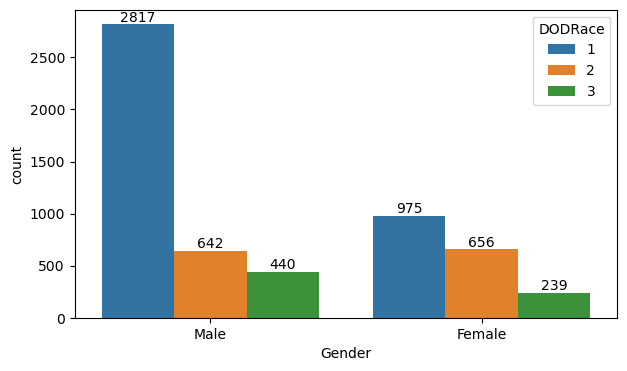

In [329]:
WritingPreference_dester = sns.countplot(x="Gender", hue="DODRace", data = df_copy)
for p in WritingPreference_dester.containers:
    WritingPreference_dester.bar_label(p)

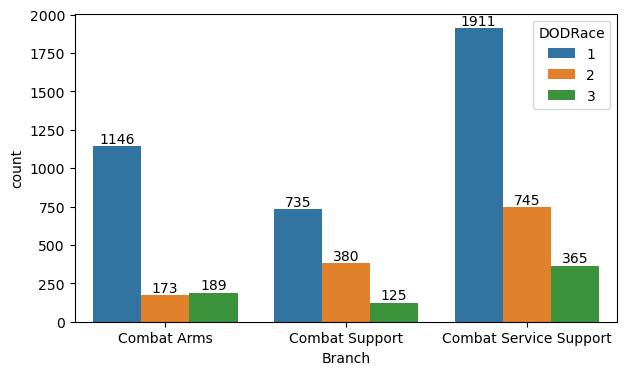

In [330]:
WritingPreference_dester = sns.countplot(x="Branch", hue="DODRace", data = df_copy)
for p in WritingPreference_dester.containers:
    WritingPreference_dester.bar_label(p)

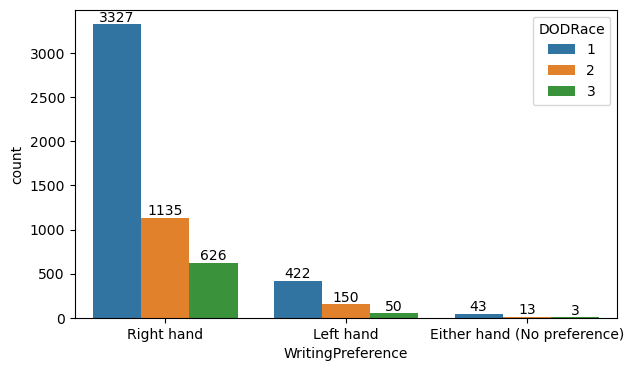

In [331]:
WritingPreference_dester = sns.countplot(x="WritingPreference", hue="DODRace", data = df_copy)
for p in WritingPreference_dester.containers:
    WritingPreference_dester.bar_label(p)

In [332]:
# After reading the data DICT and exploring the data we decided the following:
    ## Height and weight are repeated so we will drop the self_reported ones
    ## Installation column is about the place that the measurments ocour and we do not need it
    ## Date, index and PrimaryMOS columns aren't related so we will drop thim
    ## We need to convert the weight so the values maches the column name
    ## We are missing more than 50% fo Ethnicity values so we will drop this column
    ## SubjectNumericRace column may mislead the conclusion "similar to the target" so we will drop it
    ## Also we will drop undistinguishing numetrical featurs based on data visualization

df_copy =df_copy[['acromialheight','acromionradialelength','axillaheight','balloffootlength','bicristalbreadth',
'bitragionchinarc','bizygomaticbreadth','buttockheight','buttockkneelength','buttockpopliteallength','cervicaleheight',
'chestbreadth','chestheight','crotchheight','earlength','earprotrusion','elbowrestheight','eyeheightsitting',
'forearmcenterofgriplength','forearmforearmbreadth','forearmhandlength','handbreadth','handlength','headbreadth',
'headcircumference','headlength','heelbreadth','iliocristaleheight','interscyei','interscyeii','kneeheightmidpatella',
'kneeheightsitting','lateralfemoralepicondyleheight','lateralmalleolusheight','neckcircumference','neckcircumferencebase',
'overheadfingertipreachsitting','palmlength','poplitealheight','radialestylionlength','shoulderelbowlength','sittingheight',
'sleevelengthspinewrist','sleeveoutseam','span','stature','suprasternaleheight','tenthribheight','thighcircumference',
'thighclearance','thumbtipreach','tibialheight','tragiontopofhead','trochanterionheight','verticaltrunkcircumferenceusa',
'weightkg', 'waistbacklength','waistbreadth','waistcircumference','waistfrontlengthsitting','waistheightomphalion',
'wristcircumference','wristheight','Age','SubjectsBirthLocation','Gender','Component','Branch','WritingPreference', 'DODRace']]

df_copy["weightkg"] = df_copy["weightkg"]/10


"""
try:
    for column in df_copy:
        if column not in selected_featuers:
            df_copy = df_copy.drop([column], axis=1)
    df_copy["weightkg"] = df_copy["weightkg"]/10
except:
    print("The column\s that you are trying to drop is\\are already droped!")
    
"""
# It's always best practice to check our dataframe after each manipulation
df_copy.head()

acromialheight  acromionradialelength  axillaheight  balloffootlength   
0            1467                    337          1347               202  \
1            1395                    326          1293               193   
2            1430                    341          1327               196   
3            1347                    310          1239               199   
4            1585                    372          1478               224   

   bicristalbreadth  bitragionchinarc  bizygomaticbreadth  buttockheight   
0               274               319                 142            882  \
1               257               344                 135            870   
2               261               345                 135            901   
3               262               328                 143            821   
4               263               340                 138           1080   

   buttockkneelength  buttockpopliteallength  cervicaleheight  chestbreadth   
0                619                     509             1535           291  \
1                584                     468             1471           269   
2                623                     506             1501           288   
3                560                     437             1423           296   
4                706                     567             1684           304   

   chestheight  crotchheight  earlength  ...  weightkg  waistbacklength   
0         1292           877         71  ...    81.500              501  \
1         1244           851         62  ...    72.600              432   
2         1288           854         61  ...    92.900              472   
3         1205           769         66  ...    79.400              461   
4         1452          1014         56  ...    94.600              467   

   waistbreadth  waistcircumference  waistfrontlengthsitting   
0           329                 933                      440  \
1           316                 870                      371   
2           329                 964                      411   
3           315                 857                      399   
4           303                 868                      379   

   waistheightomphalion  wristcircumference  wristheight  Age   
0                  1054                 175          853   41  \
1                  1054                 167          815   35   
2                  1041                 180          831   42   
3                   968                 176          793   31   
4                  1245                 188          954   21   

   SubjectsBirthLocation  Gender     Component                  Branch   
0           North Dakota    Male  Regular Army             Combat Arms  \
1               New York    Male  Regular Army          Combat Support   
2               New York    Male  Regular Army          Combat Support   
3              Wisconsin    Male  Regular Army  Combat Service Support   
4         North Carolina    Male  Regular Army  Combat Service Support   

   WritingPreference  DODRace  
0         Right hand        1  
1          Left hand        1  
2          Left hand        2  
3         Right hand        1  
4         Right hand        2  

[5 rows x 70 columns]

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [333]:
# Encode nominal categorical features
cat_onehot = ['SubjectsBirthLocation','Gender', 'Component', 'Branch','WritingPreference']

In [334]:
column_trans = make_column_transformer(
                        (OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot),
                        remainder='passthrough',verbose_feature_names_out=False)

column_trans=column_trans.set_output(transform="pandas")
df_copy.shape

(5769, 70)

In [335]:
df_copy["DODRace"] = df_copy.DODRace.map(
    {
        1: "White",
        2: "Black",
        3: "Hispanic",
    }
)
df_copy["DODRace"]

0          White
1          White
2          Black
3          White
4          Black
5          White
6          Black
7          White
8          White
9          White
10         White
11         White
12         Black
13         White
14         White
15         Black
16         White
17         White
18         White
19         White
20         White
21      Hispanic
22         White
23         Black
24         White
25      Hispanic
26         White
27         White
28      Hispanic
29         White
30         White
31      Hispanic
32      Hispanic
33         White
34         White
35         White
36         White
37         White
38         Black
39         White
40         White
41      Hispanic
42         White
43      Hispanic
44         White
46         White
47         White
48         White
49         White
50         White
51         White
52         White
53         White
54         White
55         White
56         Black
57         White
59         White
61         Whi

In [336]:
# Split the data
X = df_copy.drop(["DODRace"], axis=1)
y = df_copy["DODRace"]

X.shape

(5769, 69)

In [337]:
X.head()

acromialheight  acromionradialelength  axillaheight  balloffootlength   
0            1467                    337          1347               202  \
1            1395                    326          1293               193   
2            1430                    341          1327               196   
3            1347                    310          1239               199   
4            1585                    372          1478               224   

   bicristalbreadth  bitragionchinarc  bizygomaticbreadth  buttockheight   
0               274               319                 142            882  \
1               257               344                 135            870   
2               261               345                 135            901   
3               262               328                 143            821   
4               263               340                 138           1080   

   buttockkneelength  buttockpopliteallength  cervicaleheight  chestbreadth   
0                619                     509             1535           291  \
1                584                     468             1471           269   
2                623                     506             1501           288   
3                560                     437             1423           296   
4                706                     567             1684           304   

   chestheight  crotchheight  earlength  ...  verticaltrunkcircumferenceusa   
0         1292           877         71  ...                           1700  \
1         1244           851         62  ...                           1627   
2         1288           854         61  ...                           1678   
3         1205           769         66  ...                           1625   
4         1452          1014         56  ...                           1679   

   weightkg  waistbacklength  waistbreadth  waistcircumference   
0    81.500              501           329                 933  \
1    72.600              432           316                 870   
2    92.900              472           329                 964   
3    79.400              461           315                 857   
4    94.600              467           303                 868   

   waistfrontlengthsitting  waistheightomphalion  wristcircumference   
0                      440                  1054                 175  \
1                      371                  1054                 167   
2                      411                  1041                 180   
3                      399                   968                 176   
4                      379                  1245                 188   

   wristheight  Age  SubjectsBirthLocation  Gender     Component   
0          853   41           North Dakota    Male  Regular Army  \
1          815   35               New York    Male  Regular Army   
2          831   42               New York    Male  Regular Army   
3          793   31              Wisconsin    Male  Regular Army   
4          954   21         North Carolina    Male  Regular Army   

                   Branch  WritingPreference  
0             Combat Arms         Right hand  
1          Combat Support          Left hand  
2          Combat Support          Left hand  
3  Combat Service Support         Right hand  
4  Combat Service Support         Right hand  

[5 rows x 69 columns]

In [338]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify =y)

# Modelling
- Fiting the model with train dataset
- Geting predictions from vanilla model on both train and test sets to examine if there is over/underfitting   
- Applying GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Useing hyperparameters that we find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

In [339]:
sc = StandardScaler()

lr = LogisticRegression()

operations = [("encoder", column_trans), ("scaler", sc), ("logistic", lr)]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['SubjectsBirthLocation',
                                                   'Gender', 'Component',
                                                   'Branch',
                                                   'WritingPreference'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

In [340]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [341]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[229   8  23]
 [  6  68  62]
 [ 11  19 728]]
              precision    recall  f1-score   support

       Black       0.93      0.88      0.91       260
    Hispanic       0.72      0.50      0.59       136
       White       0.90      0.96      0.93       758

    accuracy                           0.89      1154
   macro avg       0.85      0.78      0.81      1154
weighted avg       0.88      0.89      0.88      1154


Train_Set
[[ 963   11   64]
 [  23  336  184]
 [  37   66 2931]]
              precision    recall  f1-score   support

       Black       0.94      0.93      0.93      1038
    Hispanic       0.81      0.62      0.70       543
       White       0.92      0.97      0.94      3034

    accuracy                           0.92      4615
   macro avg       0.89      0.84      0.86      4615
weighted avg       0.91      0.92      0.91      4615



### Cross validation

In [342]:
operations = [("encoder", column_trans), ("scaler", sc), ("logistic", lr)]

pipe_model = Pipeline(steps=operations)

scores = cross_validate(
    pipe_model,
    X_train,
    y_train,
    scoring=["accuracy", "precision_weighted", "recall_weighted", "f1_weighted"],
    cv=10,
    return_train_score=True,
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_accuracy              0.889
train_accuracy             0.915
test_precision_weighted    0.884
train_precision_weighted   0.912
test_recall_weighted       0.889
train_recall_weighted      0.915
test_f1_weighted           0.885
train_f1_weighted          0.911
dtype: float64

In [343]:
# 'white':1, 'black':2, 'hispanic': 3
f1_hispanic = make_scorer(f1_score, average=None, labels=['Hispanic'])
precision_hispanic = make_scorer(precision_score, average=None, labels=['Hispanic'])
recall_hispanic = make_scorer(recall_score, average=None, labels=['Hispanic'])


scoring = {
    "f1_hispanic": f1_hispanic,
    "precision_hispanic": precision_hispanic,
    "recall_hispanic": recall_hispanic,
}

In [344]:
operations = [("encoder", column_trans), ("scaler", sc), ("logistic", lr)]

pipe_model = Pipeline(steps=operations)

scores = cross_validate(
    pipe_model, X_train, y_train, scoring=scoring, cv=10, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_f1_hispanic           0.626
train_f1_hispanic          0.694
test_precision_hispanic    0.724
train_precision_hispanic   0.806
test_recall_hispanic       0.553
train_recall_hispanic      0.608
dtype: float64

### Logistic Model GridsearchCV

In [345]:

operations = [("encoder", column_trans), ("scaler", sc), ("logistic", lr)]
pipe_model = Pipeline(steps=operations)
param_grid = {
    "logistic__C": [0.001, 0.01, 0.1, 1, 10],  # 100, 1000
    "logistic__penalty": ["l1", "l2"],
    "logistic__solver": ["liblinear", "saga"],
    "logistic__class_weight": ["balanced", None],
}

grid_search = GridSearchCV(
    pipe_model, param_grid, verbose=3, cv=5, scoring=recall_hispanic, return_train_score=True
)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END logistic__C=0.001, logistic__class_weight=balanced, logistic__penalty=l1, logistic__solver=liblinear;, score=(train=0.000, test=0.000) total time=   0.4s
[CV 2/5] END logistic__C=0.001, logistic__class_weight=balanced, logistic__penalty=l1, logistic__solver=liblinear;, score=(train=0.000, test=0.000) total time=   0.2s
[CV 3/5] END logistic__C=0.001, logistic__class_weight=balanced, logistic__penalty=l1, logistic__solver=liblinear;, score=(train=0.000, test=0.000) total time=   0.1s
[CV 4/5] END logistic__C=0.001, logistic__class_weight=balanced, logistic__penalty=l1, logistic__solver=liblinear;, score=(train=0.000, test=0.000) total time=   0.1s
[CV 5/5] END logistic__C=0.001, logistic__class_weight=balanced, logistic__penalty=l1, logistic__solver=liblinear;, score=(train=0.000, test=0.000) total time=   0.1s
[CV 1/5] END logistic__C=0.001, logistic__class_weight=balanced, logistic__penalty=l1, logistic__solver

[CV 1/5] END logistic__C=0.01, logistic__class_weight=balanced, logistic__penalty=l2, logistic__solver=liblinear;, score=(train=0.680, test=0.630) total time=   0.6s
[CV 2/5] END logistic__C=0.01, logistic__class_weight=balanced, logistic__penalty=l2, logistic__solver=liblinear;, score=(train=0.676, test=0.565) total time=   0.5s
[CV 3/5] END logistic__C=0.01, logistic__class_weight=balanced, logistic__penalty=l2, logistic__solver=liblinear;, score=(train=0.657, test=0.651) total time=   0.6s
[CV 4/5] END logistic__C=0.01, logistic__class_weight=balanced, logistic__penalty=l2, logistic__solver=liblinear;, score=(train=0.654, test=0.670) total time=   0.6s
[CV 5/5] END logistic__C=0.01, logistic__class_weight=balanced, logistic__penalty=l2, logistic__solver=liblinear;, score=(train=0.671, test=0.615) total time=   0.5s
[CV 1/5] END logistic__C=0.01, logistic__class_weight=balanced, logistic__penalty=l2, logistic__solver=saga;, score=(train=0.828, test=0.759) total time=   3.2s
[CV 2/5] 

[CV 2/5] END logistic__C=0.1, logistic__class_weight=None, logistic__penalty=l1, logistic__solver=liblinear;, score=(train=0.522, test=0.435) total time=   1.1s
[CV 3/5] END logistic__C=0.1, logistic__class_weight=None, logistic__penalty=l1, logistic__solver=liblinear;, score=(train=0.521, test=0.468) total time=   1.1s
[CV 4/5] END logistic__C=0.1, logistic__class_weight=None, logistic__penalty=l1, logistic__solver=liblinear;, score=(train=0.484, test=0.505) total time=   1.3s
[CV 5/5] END logistic__C=0.1, logistic__class_weight=None, logistic__penalty=l1, logistic__solver=liblinear;, score=(train=0.521, test=0.431) total time=   1.7s
[CV 1/5] END logistic__C=0.1, logistic__class_weight=None, logistic__penalty=l1, logistic__solver=saga;, score=(train=0.538, test=0.537) total time=   4.8s
[CV 2/5] END logistic__C=0.1, logistic__class_weight=None, logistic__penalty=l1, logistic__solver=saga;, score=(train=0.554, test=0.454) total time=   4.8s
[CV 3/5] END logistic__C=0.1, logistic__clas

[CV 4/5] END logistic__C=1, logistic__class_weight=None, logistic__penalty=l2, logistic__solver=liblinear;, score=(train=0.558, test=0.550) total time=   1.8s
[CV 5/5] END logistic__C=1, logistic__class_weight=None, logistic__penalty=l2, logistic__solver=liblinear;, score=(train=0.583, test=0.495) total time=   1.8s
[CV 1/5] END logistic__C=1, logistic__class_weight=None, logistic__penalty=l2, logistic__solver=saga;, score=(train=0.591, test=0.583) total time=   3.2s
[CV 2/5] END logistic__C=1, logistic__class_weight=None, logistic__penalty=l2, logistic__solver=saga;, score=(train=0.607, test=0.491) total time=   3.1s
[CV 3/5] END logistic__C=1, logistic__class_weight=None, logistic__penalty=l2, logistic__solver=saga;, score=(train=0.585, test=0.560) total time=   3.3s
[CV 4/5] END logistic__C=1, logistic__class_weight=None, logistic__penalty=l2, logistic__solver=saga;, score=(train=0.581, test=0.578) total time=   3.1s
[CV 5/5] END logistic__C=1, logistic__class_weight=None, logistic_

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['SubjectsBirthLocation',
                                                                          'Gender',
                                                                          'Component',
                                                                          'Branch',
                                                                          'WritingPreference'])],
                                                          verbose_feature_names_out=False)),
                                       ('scaler', StandardScaler()),
                                       ('logistic', LogisticRegression())]),
             param_grid={'logistic__C': [0.001, 0.01, 0.1, 1, 10],
                         'logistic__class_weight': ['balanced', None],
                         'logistic__penalty': ['l1', 'l2'],
                         'logistic__solver': ['liblinear', 'saga']},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [346]:
grid_search.best_estimator_

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['SubjectsBirthLocation',
                                                   'Gender', 'Component',
                                                   'Branch',
                                                   'WritingPreference'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(C=0.1, class_weight='balanced',
                                    penalty='l1', solver='saga'))])

In [347]:
pd.DataFrame(grid_search.cv_results_).loc[
    grid_search.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score    0.762
mean_train_score   0.815
Name: 17, dtype: object

In [348]:
eval_metric(grid_search, X_train, y_train, X_test, y_test)

Test_Set
[[234  16  10]
 [  8 102  26]
 [ 15  88 655]]
              precision    recall  f1-score   support

       Black       0.91      0.90      0.91       260
    Hispanic       0.50      0.75      0.60       136
       White       0.95      0.86      0.90       758

    accuracy                           0.86      1154
   macro avg       0.78      0.84      0.80      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 957   42   39]
 [  22  441   80]
 [  95  389 2550]]
              precision    recall  f1-score   support

       Black       0.89      0.92      0.91      1038
    Hispanic       0.51      0.81      0.62       543
       White       0.96      0.84      0.89      3034

    accuracy                           0.86      4615
   macro avg       0.78      0.86      0.81      4615
weighted avg       0.89      0.86      0.87      4615



In [349]:
# converting the dependent variable to float
df["DODRace"] = df["DODRace"].astype(float)

In [350]:
# Try to maximize the Recall score by balance the data
lr = LogisticRegression(C=10, solver="saga", class_weight="balanced")

operations = [("encoder", column_trans), ("scaler", sc), ("logistic", lr)]

pipe_model_balanced = Pipeline(steps=operations)

pipe_model_balanced.fit(X_train, y_train)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['SubjectsBirthLocation',
                                                   'Gender', 'Component',
                                                   'Branch',
                                                   'WritingPreference'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(C=10, class_weight='balanced',
                                    solver='saga'))])

In [351]:
eval_metric(pipe_model_balanced, X_train, y_train, X_test, y_test)

Test_Set
[[237  15   8]
 [  6 104  26]
 [ 20  90 648]]
              precision    recall  f1-score   support

       Black       0.90      0.91      0.91       260
    Hispanic       0.50      0.76      0.60       136
       White       0.95      0.85      0.90       758

    accuracy                           0.86      1154
   macro avg       0.78      0.84      0.80      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 963   43   32]
 [  24  443   76]
 [  91  402 2541]]
              precision    recall  f1-score   support

       Black       0.89      0.93      0.91      1038
    Hispanic       0.50      0.82      0.62       543
       White       0.96      0.84      0.89      3034

    accuracy                           0.86      4615
   macro avg       0.78      0.86      0.81      4615
weighted avg       0.89      0.86      0.87      4615



In [352]:
# change the class_weight to None

lr = LogisticRegression(C=10, solver="saga", class_weight=None)

operations = [("encoder", column_trans), ("scaler", sc), ("logistic", lr)]

pipe_model_None = Pipeline(steps=operations)

pipe_model_None.fit(X_train, y_train)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['SubjectsBirthLocation',
                                                   'Gender', 'Component',
                                                   'Branch',
                                                   'WritingPreference'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('logistic', LogisticRegression(C=10, solver='saga'))])

In [353]:
eval_metric(pipe_model_None, X_train, y_train, X_test, y_test)

Test_Set
[[231   6  23]
 [  8  71  57]
 [  9  17 732]]
              precision    recall  f1-score   support

       Black       0.93      0.89      0.91       260
    Hispanic       0.76      0.52      0.62       136
       White       0.90      0.97      0.93       758

    accuracy                           0.90      1154
   macro avg       0.86      0.79      0.82      1154
weighted avg       0.89      0.90      0.89      1154


Train_Set
[[ 952   14   72]
 [  26  316  201]
 [  39   66 2929]]
              precision    recall  f1-score   support

       Black       0.94      0.92      0.93      1038
    Hispanic       0.80      0.58      0.67       543
       White       0.91      0.97      0.94      3034

    accuracy                           0.91      4615
   macro avg       0.88      0.82      0.85      4615
weighted avg       0.91      0.91      0.91      4615



In [354]:
# pip uninstall scikit-learn

In [355]:
# pip install scikit-learn==1.2.2

In [472]:
# Using the ClusterCentroids to balance the target column in training data
# If you have error here please run the two previous cells

X_train_encoded = column_trans.fit_transform(X_train)
X_test_encoded = column_trans.transform(X_test) # We shouldn't apply fit_transform to the TEST data.

cc = ClusterCentroids(random_state=0)
X_resampled, y_resampled = cc.fit_resample(X_train_encoded, y_train)
print(sorted(Counter(y_resampled).items()))

AttributeError: 'NoneType' object has no attribute 'split'

In [ ]:
# Implement the LogisticRegression model with the balanced data

lr_resampled = LogisticRegression(C=10, solver="saga")

lr_resampled.fit(X_resampled, y_resampled)

In [ ]:
eval_metric(lr_resampled, X_resampled, y_resampled, X_test, y_test)

In [ ]:
# Using the ClusterCentroids to balance the target column for testing data
X_train_encoded = column_trans.fit_transform(X_train)
X_test_encoded = column_trans.transform(X_test)

cc = ClusterCentroids(random_state=0)
X_resampled, y_resampled = cc.fit_resample(X_train_encoded, y_train)
X_resampled_test, y_resampled_test = cc.fit_resample(X_test_encoded, y_test)
print(sorted(Counter(y_resampled_test).items()))


In [ ]:
eval_metric(
    lr_resampled, X_resampled, y_resampled, X_resampled_test, y_resampled_test
)

In [ ]:
operations = [
    ("encoder", column_trans),
    ("scaler", StandardScaler()),
    ("logistic", LogisticRegression(C=0.1, class_weight="balanced", solver="saga")),
]

grid_search = Pipeline(steps=operations)

grid_search.fit(X_train, y_train)

y_pred_proba = grid_search.predict_proba(X_test)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

## 2. SVC

### Vanilla SVC model 

In [357]:
operations = [("encoder", column_trans), ("scaler", StandardScaler()), 
              ("SVC", SVC())]

SVM_pipe_model = Pipeline(steps=operations)

SVM_pipe_model.fit(X_train, y_train)

eval_metric(SVM_pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[224   2  34]
 [  4  49  83]
 [  8   9 741]]
              precision    recall  f1-score   support

       Black       0.95      0.86      0.90       260
    Hispanic       0.82      0.36      0.50       136
       White       0.86      0.98      0.92       758

    accuracy                           0.88      1154
   macro avg       0.88      0.73      0.77      1154
weighted avg       0.88      0.88      0.86      1154


Train_Set
[[ 936    7   95]
 [  24  251  268]
 [  19   13 3002]]
              precision    recall  f1-score   support

       Black       0.96      0.90      0.93      1038
    Hispanic       0.93      0.46      0.62       543
       White       0.89      0.99      0.94      3034

    accuracy                           0.91      4615
   macro avg       0.92      0.78      0.83      4615
weighted avg       0.91      0.91      0.90      4615



In [358]:
scoring = {"f1_hispanic":f1_hispanic, 
           "precision_hispanic":precision_hispanic,
           "recall_hispanic":recall_hispanic}

scores = cross_validate(SVM_pipe_model, 
                        X_train, 
                        y_train, 
                        scoring=scoring,
                        cv = 10,
                        verbose=2,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   3.1s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.6s remaining:    0.0s


[CV] END .................................................... total time=   2.5s
[CV] END .................................................... total time=   2.5s
[CV] END .................................................... total time=   3.0s
[CV] END .................................................... total time=   3.1s
[CV] END .................................................... total time=   2.9s
[CV] END .................................................... total time=   2.9s
[CV] END .................................................... total time=   3.0s
[CV] END .................................................... total time=   2.8s
[CV] END .................................................... total time=   3.0s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.1min finished


test_f1_hispanic           0.553
train_f1_hispanic          0.615
test_precision_hispanic    0.896
train_precision_hispanic   0.931
test_recall_hispanic       0.402
train_recall_hispanic      0.460
dtype: float64

This artical helps to understand how SVM deals with imbalanced data

https://machinelearningmastery.com/cost-sensitive-svm-for-imbalanced-classification/

In [359]:
operations = [("encoder", column_trans), ("scaler", StandardScaler()), 
              ("SVC", SVC(gamma='scale', class_weight='balanced'))]

SVM_pipe_model = Pipeline(steps=operations)

SVM_pipe_model.fit(X_train, y_train)

eval_metric(SVM_pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[229  11  20]
 [  5  99  32]
 [ 16  89 653]]
              precision    recall  f1-score   support

       Black       0.92      0.88      0.90       260
    Hispanic       0.50      0.73      0.59       136
       White       0.93      0.86      0.89       758

    accuracy                           0.85      1154
   macro avg       0.78      0.82      0.79      1154
weighted avg       0.87      0.85      0.86      1154


Train_Set
[[ 973   26   39]
 [  16  474   53]
 [  55  352 2627]]
              precision    recall  f1-score   support

       Black       0.93      0.94      0.93      1038
    Hispanic       0.56      0.87      0.68       543
       White       0.97      0.87      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.82      0.89      0.84      4615
weighted avg       0.91      0.88      0.89      4615



In [360]:
scoring = {"f1_hispanic":f1_hispanic, 
           "precision_hispanic":precision_hispanic,
           "recall_hispanic":recall_hispanic}

scores = cross_validate(SVM_pipe_model, 
                        X_train, 
                        y_train, 
                        scoring=scoring,
                        cv = 10,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_hispanic           0.580
train_f1_hispanic          0.685
test_precision_hispanic    0.480
train_precision_hispanic   0.561
test_recall_hispanic       0.735
train_recall_hispanic      0.879
dtype: float64

###  SVC Model GridsearchCV

In [361]:
# Thered try for C values was: [2**−5=0.03, 2**−3=0.13, 2**−1=0.50, 2**3=8, 2**5=32] here I was trying
# exponentially growing sequences of C and narrowing the range based on the best value I got but
# it really takes long time so I was not able to continue the experimental process

param_grid = {'SVC__C': [0.03, 0.13, 0.50, 8, 32],
              'SVC__gamma': ["scale", "auto", 0.2, 0.3],
              'SVC__kernel': ['rbf', 'linear'],
              'SVC__class_weight': ["balanced", None]}

operations = [("encoder", column_trans), ("scaler", sc),
              ("SVC", SVC(gamma='scale', class_weight='balanced'))]
SVM_pipe_model = Pipeline(steps=operations)

SVM_pipe_model_grid = GridSearchCV(SVM_pipe_model,
                              param_grid,
                              n_jobs=-1,
                              scoring=recall_hispanic,
                              cv=2, # There is no time :(
                              verbose=3,     
                              return_train_score=True)
SVM_pipe_model_grid.fit(X_train, y_train)

Fitting 2 folds for each of 80 candidates, totalling 160 fits


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['SubjectsBirthLocation',
                                                                          'Gender',
                                                                          'Component',
                                                                          'Branch',
                                                                          'WritingPreference'])],
                                                          verbose_feature_names_out=False)),
                                       ('scaler', StandardScaler()),
                                       ('SVC', SVC(class_weight='balanced'))]),
             n_jobs=-1,
             param_grid={'SVC__C': [0.03, 0.13, 0.5, 8, 32],
                         'SVC__class_weight': ['balanced', None],
                         'SVC__gamma': ['scale', 'auto', 0.2, 0.3],
                         'SVC__kernel': ['rbf', 'linear']},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [362]:
SVM_pipe_model_grid.best_estimator_

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['SubjectsBirthLocation',
                                                   'Gender', 'Component',
                                                   'Branch',
                                                   'WritingPreference'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('SVC', SVC(C=0.03, class_weight='balanced', kernel='linear'))])

In [363]:
pd.DataFrame(SVM_pipe_model_grid.cv_results_).loc[SVM_pipe_model_grid.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    0.720
mean_train_score   0.858
Name: 1, dtype: object

In [364]:
eval_metric(SVM_pipe_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[235  14  11]
 [  8 102  26]
 [ 22  85 651]]
              precision    recall  f1-score   support

       Black       0.89      0.90      0.90       260
    Hispanic       0.51      0.75      0.61       136
       White       0.95      0.86      0.90       758

    accuracy                           0.86      1154
   macro avg       0.78      0.84      0.80      1154
weighted avg       0.88      0.86      0.86      1154


Train_Set
[[ 964   38   36]
 [  21  447   75]
 [  79  381 2574]]
              precision    recall  f1-score   support

       Black       0.91      0.93      0.92      1038
    Hispanic       0.52      0.82      0.63       543
       White       0.96      0.85      0.90      3034

    accuracy                           0.86      4615
   macro avg       0.79      0.87      0.82      4615
weighted avg       0.89      0.86      0.87      4615



In [365]:
scoring = {"f1_hispanic":f1_hispanic, 
           "precision_hispanic":precision_hispanic,
           "recall_hispanic":recall_hispanic}

scores = cross_validate(SVM_pipe_model_grid, 
                        X_train, 
                        y_train, 
                        scoring=scoring,
                        cv = 5,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

Fitting 2 folds for each of 80 candidates, totalling 160 fits
Fitting 2 folds for each of 80 candidates, totalling 160 fits
Fitting 2 folds for each of 80 candidates, totalling 160 fits
Fitting 2 folds for each of 80 candidates, totalling 160 fits
Fitting 2 folds for each of 80 candidates, totalling 160 fits


test_f1_hispanic           0.573
train_f1_hispanic          0.646
test_precision_hispanic    0.465
train_precision_hispanic   0.523
test_recall_hispanic       0.746
train_recall_hispanic      0.844
dtype: float64

## 3. RF

### Vanilla RF Model

In [366]:
column_trans = make_column_transformer(
                        (OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1), cat_onehot),
                            remainder='passthrough',verbose_feature_names_out=False) # MinMaxScaler()

column_trans=column_trans.set_output(transform="pandas")

In [367]:
operations = [("encoder", column_trans),
              ("RF_model", RandomForestClassifier(random_state=101))]

v_model = Pipeline(steps=operations)

v_model.fit(X_train, y_train)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['SubjectsBirthLocation',
                                                   'Gender', 'Component',
                                                   'Branch',
                                                   'WritingPreference'])],
                                   verbose_feature_names_out=False)),
                ('RF_model', RandomForestClassifier(random_state=101))])

In [368]:
eval_metric(v_model, X_train, y_train, X_test, y_test)

Test_Set
[[199   2  59]
 [ 11  12 113]
 [ 18   4 736]]
              precision    recall  f1-score   support

       Black       0.87      0.77      0.82       260
    Hispanic       0.67      0.09      0.16       136
       White       0.81      0.97      0.88       758

    accuracy                           0.82      1154
   macro avg       0.78      0.61      0.62      1154
weighted avg       0.81      0.82      0.78      1154


Train_Set
[[1037    0    1]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [369]:
operations = [("encoder", column_trans),
              ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['SubjectsBirthLocation',
                                                   'Gender', 'Component',
                                                   'Branch',
                                                   'WritingPreference'])],
                                   verbose_feature_names_out=False)),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=101))])

In [370]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[177   2  81]
 [  7   3 126]
 [ 11   1 746]]
              precision    recall  f1-score   support

       Black       0.91      0.68      0.78       260
    Hispanic       0.50      0.02      0.04       136
       White       0.78      0.98      0.87       758

    accuracy                           0.80      1154
   macro avg       0.73      0.56      0.56      1154
weighted avg       0.78      0.80      0.75      1154


Train_Set
[[1037    0    1]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [371]:
operations = [("encoder", column_trans),
              ("RF_model", RandomForestClassifier(max_depth=3, class_weight="balanced", random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['SubjectsBirthLocation',
                                                   'Gender', 'Component',
                                                   'Branch',
                                                   'WritingPreference'])],
                                   verbose_feature_names_out=False)),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced', max_depth=3,
                                        random_state=101))])

In [372]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[183  55  22]
 [ 14  85  37]
 [ 85 288 385]]
              precision    recall  f1-score   support

       Black       0.65      0.70      0.68       260
    Hispanic       0.20      0.62      0.30       136
       White       0.87      0.51      0.64       758

    accuracy                           0.57      1154
   macro avg       0.57      0.61      0.54      1154
weighted avg       0.74      0.57      0.61      1154


Train_Set
[[ 765  174   99]
 [  60  347  136]
 [ 320 1038 1676]]
              precision    recall  f1-score   support

       Black       0.67      0.74      0.70      1038
    Hispanic       0.22      0.64      0.33       543
       White       0.88      0.55      0.68      3034

    accuracy                           0.60      4615
   macro avg       0.59      0.64      0.57      4615
weighted avg       0.75      0.60      0.64      4615



In [373]:
# 'white':1, 'black':2, 'hispanic':3
f1_hispanic = make_scorer(f1_score, average=None, labels =["Hispanic"])
precision_hispanic = make_scorer(precision_score, average=None, labels =["Hispanic"])
recall_hispanic = make_scorer(recall_score,  average=None, labels =["Hispanic"])
 

scoring = {"f1_hispanic":f1_hispanic, 
           "precision_hispanic":precision_hispanic,
           "recall_hispanic":recall_hispanic}

In [374]:
ooperations = [("encoder", column_trans),
              ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=101))]


model = Pipeline(steps=operations)

scores = cross_validate(model, 
                        X_train, 
                        y_train, 
                        scoring=scoring, 
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_hispanic           0.306
train_f1_hispanic          0.331
test_precision_hispanic    0.206
train_precision_hispanic   0.222
test_recall_hispanic       0.598
train_recall_hispanic      0.645
dtype: float64

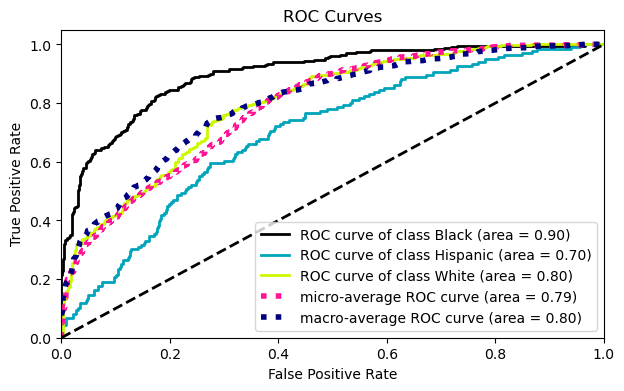

In [375]:
y_pred_probe = pipe_model.predict_proba(X_test)
    
plot_roc(y_test, y_pred_probe)
plt.show();


In [376]:
pipe_model["RF_model"].feature_importances_

array([0.0056299 , 0.01271028, 0.        , 0.00248764, 0.        ,
       0.00648668, 0.00488508, 0.00469112, 0.00165319, 0.04925487,
       0.00882172, 0.00498077, 0.02904924, 0.05241463, 0.06734385,
       0.00999666, 0.00257035, 0.00637495, 0.0203573 , 0.01813176,
       0.02618597, 0.15596264, 0.08121991, 0.01228164, 0.00098254,
       0.02996364, 0.        , 0.01800986, 0.00056544, 0.01506058,
       0.0039783 , 0.02639564, 0.01976881, 0.00053526, 0.0006058 ,
       0.00221413, 0.00277182, 0.0207683 , 0.01270133, 0.00114773,
       0.00160358, 0.00018276, 0.00756883, 0.00144793, 0.02351835,
       0.0083731 , 0.07693344, 0.00047797, 0.        , 0.0079259 ,
       0.01380862, 0.00153566, 0.01063033, 0.00313888, 0.        ,
       0.00121237, 0.00489487, 0.0022127 , 0.03234248, 0.00104597,
       0.        , 0.0180046 , 0.01124641, 0.00180377, 0.00594453,
       0.00671217, 0.00110175, 0.0166224 , 0.00075132])

In [377]:
features = pipe_model["encoder"].get_feature_names_out()
features

array(['SubjectsBirthLocation', 'Gender', 'Component', 'Branch',
       'WritingPreference', 'acromialheight', 'acromionradialelength',
       'axillaheight', 'balloffootlength', 'bicristalbreadth',
       'bitragionchinarc', 'bizygomaticbreadth', 'buttockheight',
       'buttockkneelength', 'buttockpopliteallength', 'cervicaleheight',
       'chestbreadth', 'chestheight', 'crotchheight', 'earlength',
       'earprotrusion', 'elbowrestheight', 'eyeheightsitting',
       'forearmcenterofgriplength', 'forearmforearmbreadth',
       'forearmhandlength', 'handbreadth', 'handlength', 'headbreadth',
       'headcircumference', 'headlength', 'heelbreadth',
       'iliocristaleheight', 'interscyei', 'interscyeii',
       'kneeheightmidpatella', 'kneeheightsitting',
       'lateralfemoralepicondyleheight', 'lateralmalleolusheight',
       'neckcircumference', 'neckcircumferencebase',
       'overheadfingertipreachsitting', 'palmlength', 'poplitealheight',
       'radialestylionlength', 'shoulde

In [378]:
rf_feature_imp = pd.DataFrame(data=pipe_model["RF_model"].feature_importances_, 
                              index = features,
                              columns=["Feature Importance"])

rf_feature_imp = rf_feature_imp.sort_values("Feature Importance", ascending=False)
rf_feature_imp

Feature Importance
elbowrestheight                              0.156
eyeheightsitting                             0.081
sittingheight                                0.077
buttockpopliteallength                       0.067
buttockkneelength                            0.052
bicristalbreadth                             0.049
trochanterionheight                          0.032
forearmhandlength                            0.030
buttockheight                                0.029
heelbreadth                                  0.026
earprotrusion                                0.026
radialestylionlength                         0.024
lateralfemoralepicondyleheight               0.021
crotchheight                                 0.020
iliocristaleheight                           0.020
earlength                                    0.018
handlength                                   0.018
waistbacklength                              0.018
wristheight                                  0.017
headcircumference                            0.015
stature                                      0.014
Gender                                       0.013
lateralmalleolusheight                       0.013
forearmcenterofgriplength                    0.012
waistbreadth                                 0.011
tenthribheight                               0.011
cervicaleheight                              0.010
bitragionchinarc                             0.009
shoulderelbowlength                          0.008
span                                         0.008
palmlength                                   0.008
waistheightomphalion                         0.007
acromialheight                               0.006
chestheight                                  0.006
waistfrontlengthsitting                      0.006
SubjectsBirthLocation                        0.006
bizygomaticbreadth                           0.005
tibialheight                                 0.005
acromionradialelength                        0.005
axillaheight                                 0.005
headlength                                   0.004
thighcircumference                           0.003
kneeheightsitting                            0.003
chestbreadth                                 0.003
Branch                                       0.002
kneeheightmidpatella                         0.002
tragiontopofhead                             0.002
waistcircumference                           0.002
balloffootlength                             0.002
neckcircumferencebase                        0.002
suprasternaleheight                          0.002
poplitealheight                              0.001
thumbtipreach                                0.001
neckcircumference                            0.001
wristcircumference                           0.001
verticaltrunkcircumferenceusa                0.001
forearmforearmbreadth                        0.001
Age                                          0.001
interscyeii                                  0.001
headbreadth                                  0.001
interscyei                                   0.001
sleevelengthspinewrist                       0.000
overheadfingertipreachsitting                0.000
thighclearance                               0.000
sleeveoutseam                                0.000
weightkg                                     0.000
handbreadth                                  0.000
WritingPreference                            0.000
Component                                    0.000

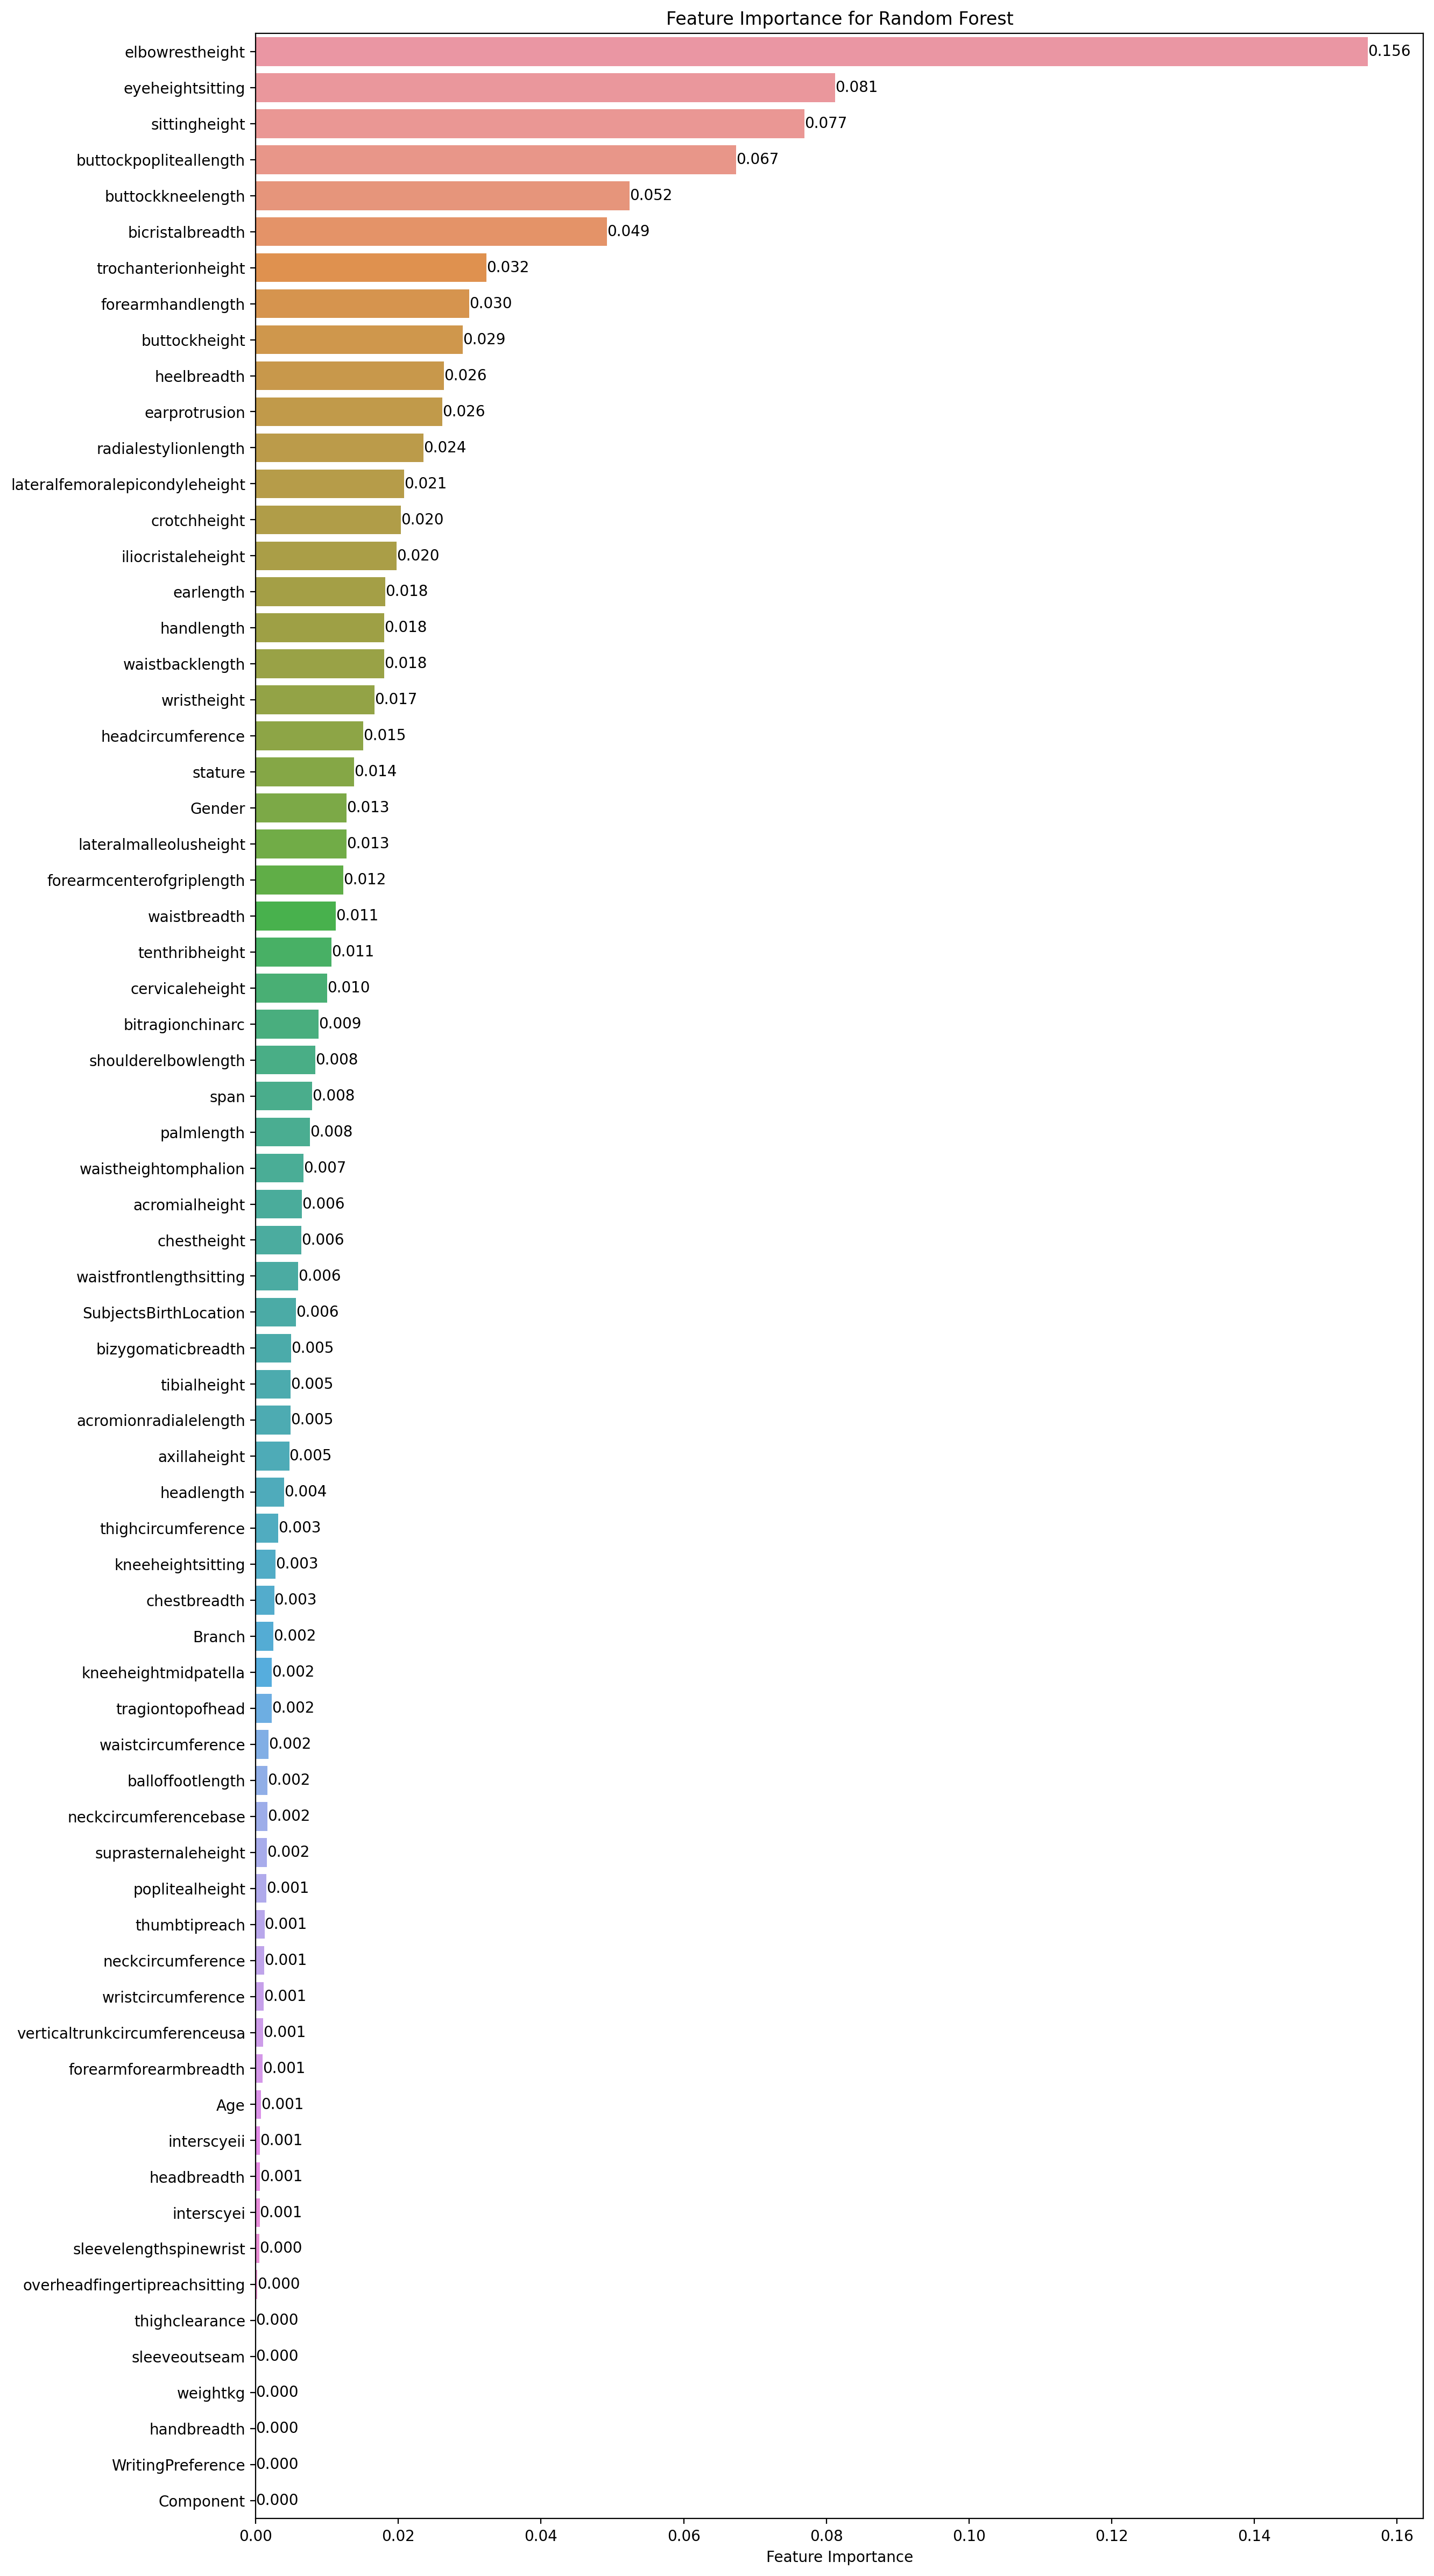

In [379]:
plt.figure(figsize=(14, 30), dpi=200)
ax = sns.barplot(x=rf_feature_imp["Feature Importance"], 
                 y=rf_feature_imp.index)

ax.bar_label(ax.containers[0],fmt="%.3f")
plt.title("Feature Importance for Random Forest")
plt.show()

In [380]:
def report_model(model, number_of_tree):
    model_pred = model.predict(X_test)
    model_train_pred = model.predict(X_train)
    print('')
    print("Test Set")
    print(confusion_matrix(y_test, model_pred))
    print('')
    print(classification_report(y_test,model_pred))
    print('')
    print("Train Set")
    print(confusion_matrix(y_train, model_train_pred))
    print('')
    print(classification_report(y_train,model_train_pred))
    plt.figure(figsize=(12,8),dpi=100)
    plot_tree(model["RF_model"].estimators_[number_of_tree],
              feature_names=features,
              class_names=df.species.unique(),
              filled = True,
              fontsize = 8);


In [381]:
RF_model = RandomForestClassifier(random_state=101, 
                                  max_samples=0.5)

operations = [("encoder", column_trans), 
              ("RF_model", RF_model)]

pruned_tree = Pipeline(steps=operations)

pruned_tree.fit(X_train,y_train)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['SubjectsBirthLocation',
                                                   'Gender', 'Component',
                                                   'Branch',
                                                   'WritingPreference'])],
                                   verbose_feature_names_out=False)),
                ('RF_model',
                 RandomForestClassifier(max_samples=0.5, random_state=101))])

In [382]:
eval_metric(pruned_tree, X_train, y_train, X_test, y_test)

Test_Set
[[190   5  65]
 [ 10  10 116]
 [ 14   5 739]]
              precision    recall  f1-score   support

       Black       0.89      0.73      0.80       260
    Hispanic       0.50      0.07      0.13       136
       White       0.80      0.97      0.88       758

    accuracy                           0.81      1154
   macro avg       0.73      0.59      0.60      1154
weighted avg       0.79      0.81      0.77      1154


Train_Set
[[1013    0   25]
 [   7  429  107]
 [   1    0 3033]]
              precision    recall  f1-score   support

       Black       0.99      0.98      0.98      1038
    Hispanic       1.00      0.79      0.88       543
       White       0.96      1.00      0.98      3034

    accuracy                           0.97      4615
   macro avg       0.98      0.92      0.95      4615
weighted avg       0.97      0.97      0.97      4615



### RF Model GridsearchCV

In [383]:
param_grid = {'RF_model__n_estimators':[50, 64, 128, 100],
             'RF_model__max_features':[2, 4, 'sqrt'],
             'RF_model__max_depth':[2, 3, 4],
             'RF_model__min_samples_split':[2, 3,4],
             'RF_model__min_samples_leaf': [2,3,4],
             'RF_model__max_samples':[0.8, 1]
             }

In [384]:
RF_model = RandomForestClassifier(class_weight="balanced", random_state=101)

operations = [("encoder", column_trans), 
              ("RF_model", RF_model)]

rg_model = Pipeline(steps=operations)

rf_grid_model = GridSearchCV(estimator=rg_model,
                             param_grid = param_grid,
                             scoring=recall_hispanic,
                             n_jobs = -1,
                             verbose=2)

In [385]:
%%time
rf_grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
CPU times: total: 47.6 s
Wall time: 8min 12s


GridSearchCV(estimator=Pipeline(steps=[('encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['SubjectsBirthLocation',
                                                                          'Gender',
                                                                          'Component',
                                                                          'Branch',
                                                                          'WritingPreference'])],
                                                          verbose_feature_names_out=False)),
                                       ('RF_model',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=101))]),
             n_jobs=-1,
             param_grid={'RF_model__max_depth': [2, 3, 4],
                         'RF_model__max_features': [2, 4, 'sqrt'],
                         'RF_model__max_samples': [0.8, 1],
                         'RF_model__min_samples_leaf': [2, 3, 4],
                         'RF_model__min_samples_split': [2, 3, 4],
                         'RF_model__n_estimators': [50, 64, 128, 100]},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=2)

In [386]:
rf_grid_model.best_estimator_

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['SubjectsBirthLocation',
                                                   'Gender', 'Component',
                                                   'Branch',
                                                   'WritingPreference'])],
                                   verbose_feature_names_out=False)),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced', max_depth=2,
                                        max_features=2, max_samples=0.8,
                                        min_samples_leaf=2, n_estimators=128,
                                        random_state=101))])

In [387]:
rf_grid_model.best_score_

0.6315494393476044

In [388]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[160  74  26]
 [  7  91  38]
 [ 48 343 367]]
              precision    recall  f1-score   support

       Black       0.74      0.62      0.67       260
    Hispanic       0.18      0.67      0.28       136
       White       0.85      0.48      0.62       758

    accuracy                           0.54      1154
   macro avg       0.59      0.59      0.52      1154
weighted avg       0.75      0.54      0.59      1154


Train_Set
[[ 643  291  104]
 [  41  364  138]
 [ 211 1193 1630]]
              precision    recall  f1-score   support

       Black       0.72      0.62      0.67      1038
    Hispanic       0.20      0.67      0.30       543
       White       0.87      0.54      0.66      3034

    accuracy                           0.57      4615
   macro avg       0.60      0.61      0.54      4615
weighted avg       0.76      0.57      0.62      4615



## 4. XGBoost

### Vanilla XGBoost Model

In [389]:
# Encode nominal categorical features
# We will do ordinal even though they are nominal since ordinal is better in Tree-based algorithms
cat_ordinal = ["Gender", "WritingPreference", "SubjectsBirthLocation"]
df_copy["SubjectsBirthLocation"].nunique()

136

In [390]:
# Expected: [0 1 2], got ['Black' 'Hispanic' 'White']
df_copy2 = df_copy.copy()
df_copy2["DODRace"] = df_copy2.DODRace.map({"Black": 0, "Hispanic": 1, "White": 2})

df_copy2["DODRace"]

0       2
1       2
2       0
3       2
4       0
5       2
6       0
7       2
8       2
9       2
10      2
11      2
12      0
13      2
14      2
15      0
16      2
17      2
18      2
19      2
20      2
21      1
22      2
23      0
24      2
25      1
26      2
27      2
28      1
29      2
30      2
31      1
32      1
33      2
34      2
35      2
36      2
37      2
38      0
39      2
40      2
41      1
42      2
43      1
44      2
46      2
47      2
48      2
49      2
50      2
51      2
52      2
53      2
54      2
55      2
56      0
57      2
59      2
61      2
62      2
63      2
64      2
65      1
66      1
67      2
68      2
69      0
70      2
71      0
72      1
73      2
74      2
75      2
76      1
77      0
78      0
79      0
80      2
81      2
82      2
83      2
84      1
85      2
86      2
87      2
88      2
89      2
90      2
91      2
92      2
93      2
94      2
95      2
96      2
97      2
98      2
99      2
100     2
101     2
102     2


In [391]:
df_copy["DODRace"]

0          White
1          White
2          Black
3          White
4          Black
5          White
6          Black
7          White
8          White
9          White
10         White
11         White
12         Black
13         White
14         White
15         Black
16         White
17         White
18         White
19         White
20         White
21      Hispanic
22         White
23         Black
24         White
25      Hispanic
26         White
27         White
28      Hispanic
29         White
30         White
31      Hispanic
32      Hispanic
33         White
34         White
35         White
36         White
37         White
38         Black
39         White
40         White
41      Hispanic
42         White
43      Hispanic
44         White
46         White
47         White
48         White
49         White
50         White
51         White
52         White
53         White
54         White
55         White
56         Black
57         White
59         White
61         Whi

In [392]:
# Split the data
X = df_copy2.drop(["DODRace"], axis=1)
y = df_copy2["DODRace"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

In [393]:
xgb_classifier = XGBClassifier()

# Create a pipeline
pipe_model = Pipeline([("preprocessor", column_trans), ("xgboost", xgb_classifier)])

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['SubjectsBirthLocation',
                                                   'Gender', 'Component',
                                                   'Branch',
                                                   'WritingPreference'])],
                                   verbose_feature_names_out=False)),
                ('xgboost',
                 XGBClassifier(base_score=None, booster=None, callbacks=...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [394]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[211   8  41]
 [  7  46  83]
 [ 13  10 735]]
              precision    recall  f1-score   support

           0       0.91      0.81      0.86       260
           1       0.72      0.34      0.46       136
           2       0.86      0.97      0.91       758

    accuracy                           0.86      1154
   macro avg       0.83      0.71      0.74      1154
weighted avg       0.85      0.86      0.84      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1038
           1       1.00      1.00      1.00       543
           2       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



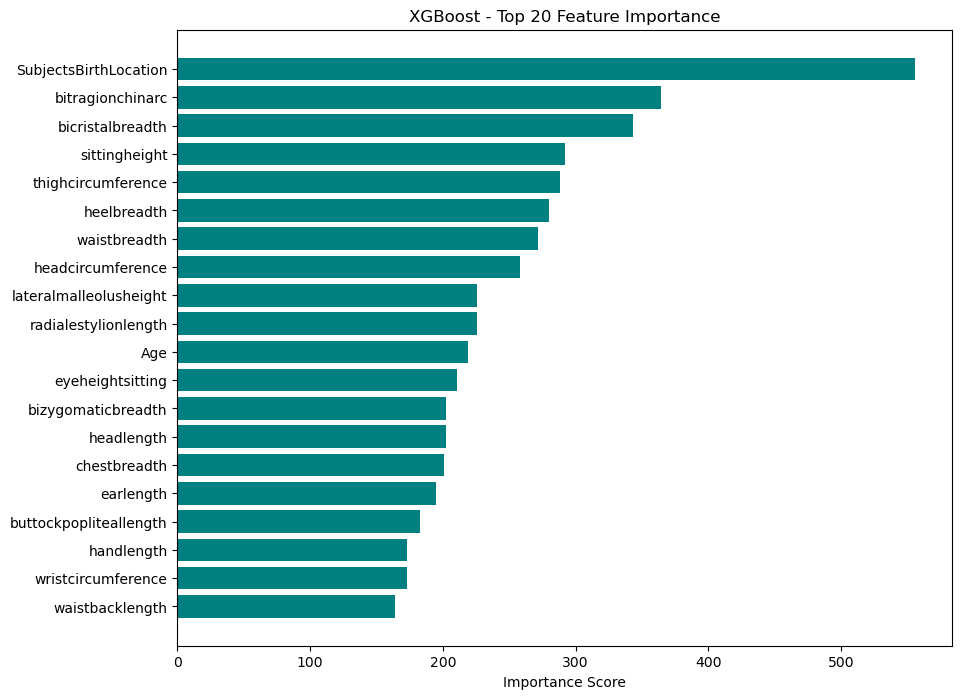

In [395]:
feature_importances = xgb_classifier.get_booster().get_score(importance_type='weight')
sorted_feature_importance = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

# Extract feature names and their importance scores
features, importance = zip(*sorted_feature_importance)

# Create a bar plot to visualize feature importance
plt.figure(figsize=(10, 8))
plt.barh(features[:20], importance[:20], color='teal')
plt.title('XGBoost - Top 20 Feature Importance')
plt.xlabel('Importance Score')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important features at the top
plt.show()

In [396]:
features

('SubjectsBirthLocation',
 'bitragionchinarc',
 'bicristalbreadth',
 'sittingheight',
 'thighcircumference',
 'heelbreadth',
 'waistbreadth',
 'headcircumference',
 'lateralmalleolusheight',
 'radialestylionlength',
 'Age',
 'eyeheightsitting',
 'bizygomaticbreadth',
 'headlength',
 'chestbreadth',
 'earlength',
 'buttockpopliteallength',
 'handlength',
 'wristcircumference',
 'waistbacklength',
 'earprotrusion',
 'elbowrestheight',
 'thighclearance',
 'waistfrontlengthsitting',
 'palmlength',
 'interscyei',
 'buttockkneelength',
 'wristheight',
 'verticaltrunkcircumferenceusa',
 'overheadfingertipreachsitting',
 'tragiontopofhead',
 'forearmhandlength',
 'shoulderelbowlength',
 'waistcircumference',
 'forearmforearmbreadth',
 'thumbtipreach',
 'handbreadth',
 'interscyeii',
 'buttockheight',
 'headbreadth',
 'acromionradialelength',
 'span',
 'forearmcenterofgriplength',
 'neckcircumferencebase',
 'neckcircumference',
 'trochanterionheight',
 'balloffootlength',
 'sleevelengthspinewri

### CV XGBoost Model

In [397]:
# 'white':2, 'black':0, 'hispanic': 1
f1_hispanic = make_scorer(f1_score, average=None, labels=[1])
precision_hispanic = make_scorer(precision_score, average=None, labels=[1])
recall_hispanic = make_scorer(recall_score, average=None, labels=[1])


scoring = {
    "f1_hispanic": f1_hispanic,
    "precision_hispanic": precision_hispanic,
    "recall_hispanic": recall_hispanic,
}

In [398]:

xgb_classifier = XGBClassifier()

# Create a pipeline
pipe_model = Pipeline([("preprocessor", column_trans), ("xgboost", xgb_classifier)])

pipe_model.fit(X_train, y_train)

scores = cross_validate(
    pipe_model, X_train, y_train, scoring=scoring, cv=5, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 6))
df_scores.mean()[2:]

test_f1_hispanic           0.466
train_f1_hispanic          1.000
test_precision_hispanic    0.754
train_precision_hispanic   1.000
test_recall_hispanic       0.337
train_recall_hispanic      1.000
dtype: float64

In [399]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[211   8  41]
 [  7  46  83]
 [ 13  10 735]]
              precision    recall  f1-score   support

           0       0.91      0.81      0.86       260
           1       0.72      0.34      0.46       136
           2       0.86      0.97      0.91       758

    accuracy                           0.86      1154
   macro avg       0.83      0.71      0.74      1154
weighted avg       0.85      0.86      0.84      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1038
           1       1.00      1.00      1.00       543
           2       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



### XGBoost Model GridsearchCV

In [400]:
# 'white':1, 'black':2, 'hispanic': 3

# Expected: [0 1 2], got ['Black' 'Hispanic' 'White']

f1_hispanic = make_scorer(f1_score, average=None, labels=[1])
precision_hispanic = make_scorer(precision_score, average=None, labels=[1])
recall_hispanic = make_scorer(recall_score, average=None, labels=[1])


scoring = {
    "f1_hispanic": f1_hispanic,
    "precision_hispanic": precision_hispanic,
    "recall_hispanic": recall_hispanic,
}

In [401]:
pipe_model = Pipeline([("preprocessor", column_trans), ("xgboost", xgb_classifier)])

scores = cross_validate(
    pipe_model, X_train, y_train, scoring=scoring, cv=5, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 6))
df_scores.mean()

fit_time                   3.344
score_time                 0.104
test_f1_hispanic           0.466
train_f1_hispanic          1.000
test_precision_hispanic    0.754
train_precision_hispanic   1.000
test_recall_hispanic       0.337
train_recall_hispanic      1.000
dtype: float64

In [402]:

param_grid = {"xgboost__n_estimators":[50, 100],
              'xgboost__max_depth':[3,4],
              "xgboost__learning_rate": [0.1, 0.2],
              "xgboost__subsample":[0.5, 0.8, 1],
              "xgboost__colsample_bytree":[0.5,0.7, 1],
             "xgboost__reg_alpha": [0, 0.25, 0.5],
}


In [403]:
# Create a pipeline
pipe_model = Pipeline([("preprocessor", column_trans), ("xgboost", xgb_classifier)])


param_grid = param_grid

grid_search = GridSearchCV(
    pipe_model, param_grid, cv=5, scoring=recall_hispanic, return_train_score=True, verbose=2, )
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END xgboost__colsample_bytree=0.5, xgboost__learning_rate=0.1, xgboost__max_depth=3, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=0.5; total time=   0.6s
[CV] END xgboost__colsample_bytree=0.5, xgboost__learning_rate=0.1, xgboost__max_depth=3, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=0.5; total time=   0.7s
[CV] END xgboost__colsample_bytree=0.5, xgboost__learning_rate=0.1, xgboost__max_depth=3, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=0.5; total time=   0.9s
[CV] END xgboost__colsample_bytree=0.5, xgboost__learning_rate=0.1, xgboost__max_depth=3, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=0.5; total time=   0.7s
[CV] END xgboost__colsample_bytree=0.5, xgboost__learning_rate=0.1, xgboost__max_depth=3, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=0.5; total time=   0.7s
[CV] END xgboost__colsample_byt

[CV] END xgboost__colsample_bytree=0.5, xgboost__learning_rate=0.1, xgboost__max_depth=3, xgboost__n_estimators=100, xgboost__reg_alpha=0, xgboost__subsample=0.5; total time=   1.3s
[CV] END xgboost__colsample_bytree=0.5, xgboost__learning_rate=0.1, xgboost__max_depth=3, xgboost__n_estimators=100, xgboost__reg_alpha=0, xgboost__subsample=0.5; total time=   1.5s
[CV] END xgboost__colsample_bytree=0.5, xgboost__learning_rate=0.1, xgboost__max_depth=3, xgboost__n_estimators=100, xgboost__reg_alpha=0, xgboost__subsample=0.5; total time=   1.4s
[CV] END xgboost__colsample_bytree=0.5, xgboost__learning_rate=0.1, xgboost__max_depth=3, xgboost__n_estimators=100, xgboost__reg_alpha=0, xgboost__subsample=0.5; total time=   1.4s
[CV] END xgboost__colsample_bytree=0.5, xgboost__learning_rate=0.1, xgboost__max_depth=3, xgboost__n_estimators=100, xgboost__reg_alpha=0, xgboost__subsample=0.5; total time=   1.5s
[CV] END xgboost__colsample_bytree=0.5, xgboost__learning_rate=0.1, xgboost__max_depth=3, 

[CV] END xgboost__colsample_bytree=0.5, xgboost__learning_rate=0.1, xgboost__max_depth=4, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=0.5; total time=   1.1s
[CV] END xgboost__colsample_bytree=0.5, xgboost__learning_rate=0.1, xgboost__max_depth=4, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=0.5; total time=   0.9s
[CV] END xgboost__colsample_bytree=0.5, xgboost__learning_rate=0.1, xgboost__max_depth=4, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=0.5; total time=   1.0s
[CV] END xgboost__colsample_bytree=0.5, xgboost__learning_rate=0.1, xgboost__max_depth=4, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=0.5; total time=   1.2s
[CV] END xgboost__colsample_bytree=0.5, xgboost__learning_rate=0.1, xgboost__max_depth=4, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=0.5; total time=   0.9s
[CV] END xgboost__colsample_bytree=0.5, xgboost__learning_rate=0.1, xgboost__max_depth=4, xgboo

[CV] END xgboost__colsample_bytree=0.5, xgboost__learning_rate=0.1, xgboost__max_depth=4, xgboost__n_estimators=100, xgboost__reg_alpha=0, xgboost__subsample=0.5; total time=   1.9s
[CV] END xgboost__colsample_bytree=0.5, xgboost__learning_rate=0.1, xgboost__max_depth=4, xgboost__n_estimators=100, xgboost__reg_alpha=0, xgboost__subsample=0.5; total time=   2.0s
[CV] END xgboost__colsample_bytree=0.5, xgboost__learning_rate=0.1, xgboost__max_depth=4, xgboost__n_estimators=100, xgboost__reg_alpha=0, xgboost__subsample=0.5; total time=   2.0s
[CV] END xgboost__colsample_bytree=0.5, xgboost__learning_rate=0.1, xgboost__max_depth=4, xgboost__n_estimators=100, xgboost__reg_alpha=0, xgboost__subsample=0.5; total time=   1.8s
[CV] END xgboost__colsample_bytree=0.5, xgboost__learning_rate=0.1, xgboost__max_depth=4, xgboost__n_estimators=100, xgboost__reg_alpha=0, xgboost__subsample=0.8; total time=   1.9s
[CV] END xgboost__colsample_bytree=0.5, xgboost__learning_rate=0.1, xgboost__max_depth=4, 

[CV] END xgboost__colsample_bytree=0.5, xgboost__learning_rate=0.2, xgboost__max_depth=3, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=0.5; total time=   0.8s
[CV] END xgboost__colsample_bytree=0.5, xgboost__learning_rate=0.2, xgboost__max_depth=3, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=0.5; total time=   0.8s
[CV] END xgboost__colsample_bytree=0.5, xgboost__learning_rate=0.2, xgboost__max_depth=3, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=0.5; total time=   0.7s
[CV] END xgboost__colsample_bytree=0.5, xgboost__learning_rate=0.2, xgboost__max_depth=3, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=0.5; total time=   0.7s
[CV] END xgboost__colsample_bytree=0.5, xgboost__learning_rate=0.2, xgboost__max_depth=3, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=0.8; total time=   0.7s
[CV] END xgboost__colsample_bytree=0.5, xgboost__learning_rate=0.2, xgboost__max_depth=3, xgboo

[CV] END xgboost__colsample_bytree=0.5, xgboost__learning_rate=0.2, xgboost__max_depth=3, xgboost__n_estimators=100, xgboost__reg_alpha=0, xgboost__subsample=0.5; total time=   1.3s
[CV] END xgboost__colsample_bytree=0.5, xgboost__learning_rate=0.2, xgboost__max_depth=3, xgboost__n_estimators=100, xgboost__reg_alpha=0, xgboost__subsample=0.5; total time=   1.4s
[CV] END xgboost__colsample_bytree=0.5, xgboost__learning_rate=0.2, xgboost__max_depth=3, xgboost__n_estimators=100, xgboost__reg_alpha=0, xgboost__subsample=0.5; total time=   1.4s
[CV] END xgboost__colsample_bytree=0.5, xgboost__learning_rate=0.2, xgboost__max_depth=3, xgboost__n_estimators=100, xgboost__reg_alpha=0, xgboost__subsample=0.8; total time=   1.4s
[CV] END xgboost__colsample_bytree=0.5, xgboost__learning_rate=0.2, xgboost__max_depth=3, xgboost__n_estimators=100, xgboost__reg_alpha=0, xgboost__subsample=0.8; total time=   1.5s
[CV] END xgboost__colsample_bytree=0.5, xgboost__learning_rate=0.2, xgboost__max_depth=3, 

[CV] END xgboost__colsample_bytree=0.5, xgboost__learning_rate=0.2, xgboost__max_depth=4, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=0.5; total time=   1.1s
[CV] END xgboost__colsample_bytree=0.5, xgboost__learning_rate=0.2, xgboost__max_depth=4, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=0.5; total time=   0.9s
[CV] END xgboost__colsample_bytree=0.5, xgboost__learning_rate=0.2, xgboost__max_depth=4, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=0.5; total time=   0.9s
[CV] END xgboost__colsample_bytree=0.5, xgboost__learning_rate=0.2, xgboost__max_depth=4, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=0.8; total time=   0.9s
[CV] END xgboost__colsample_bytree=0.5, xgboost__learning_rate=0.2, xgboost__max_depth=4, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=0.8; total time=   0.9s
[CV] END xgboost__colsample_bytree=0.5, xgboost__learning_rate=0.2, xgboost__max_depth=4, xgboo

[CV] END xgboost__colsample_bytree=0.5, xgboost__learning_rate=0.2, xgboost__max_depth=4, xgboost__n_estimators=100, xgboost__reg_alpha=0, xgboost__subsample=0.5; total time=   1.7s
[CV] END xgboost__colsample_bytree=0.5, xgboost__learning_rate=0.2, xgboost__max_depth=4, xgboost__n_estimators=100, xgboost__reg_alpha=0, xgboost__subsample=0.5; total time=   1.7s
[CV] END xgboost__colsample_bytree=0.5, xgboost__learning_rate=0.2, xgboost__max_depth=4, xgboost__n_estimators=100, xgboost__reg_alpha=0, xgboost__subsample=0.8; total time=   1.7s
[CV] END xgboost__colsample_bytree=0.5, xgboost__learning_rate=0.2, xgboost__max_depth=4, xgboost__n_estimators=100, xgboost__reg_alpha=0, xgboost__subsample=0.8; total time=   1.6s
[CV] END xgboost__colsample_bytree=0.5, xgboost__learning_rate=0.2, xgboost__max_depth=4, xgboost__n_estimators=100, xgboost__reg_alpha=0, xgboost__subsample=0.8; total time=   1.6s
[CV] END xgboost__colsample_bytree=0.5, xgboost__learning_rate=0.2, xgboost__max_depth=4, 

[CV] END xgboost__colsample_bytree=0.7, xgboost__learning_rate=0.1, xgboost__max_depth=3, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=0.5; total time=   0.8s
[CV] END xgboost__colsample_bytree=0.7, xgboost__learning_rate=0.1, xgboost__max_depth=3, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=0.5; total time=   0.8s
[CV] END xgboost__colsample_bytree=0.7, xgboost__learning_rate=0.1, xgboost__max_depth=3, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=0.8; total time=   0.8s
[CV] END xgboost__colsample_bytree=0.7, xgboost__learning_rate=0.1, xgboost__max_depth=3, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=0.8; total time=   0.9s
[CV] END xgboost__colsample_bytree=0.7, xgboost__learning_rate=0.1, xgboost__max_depth=3, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=0.8; total time=   0.9s
[CV] END xgboost__colsample_bytree=0.7, xgboost__learning_rate=0.1, xgboost__max_depth=3, xgboo

[CV] END xgboost__colsample_bytree=0.7, xgboost__learning_rate=0.1, xgboost__max_depth=3, xgboost__n_estimators=100, xgboost__reg_alpha=0, xgboost__subsample=0.5; total time=   1.7s
[CV] END xgboost__colsample_bytree=0.7, xgboost__learning_rate=0.1, xgboost__max_depth=3, xgboost__n_estimators=100, xgboost__reg_alpha=0, xgboost__subsample=0.5; total time=   1.7s
[CV] END xgboost__colsample_bytree=0.7, xgboost__learning_rate=0.1, xgboost__max_depth=3, xgboost__n_estimators=100, xgboost__reg_alpha=0, xgboost__subsample=0.8; total time=   2.0s
[CV] END xgboost__colsample_bytree=0.7, xgboost__learning_rate=0.1, xgboost__max_depth=3, xgboost__n_estimators=100, xgboost__reg_alpha=0, xgboost__subsample=0.8; total time=   1.8s
[CV] END xgboost__colsample_bytree=0.7, xgboost__learning_rate=0.1, xgboost__max_depth=3, xgboost__n_estimators=100, xgboost__reg_alpha=0, xgboost__subsample=0.8; total time=   1.9s
[CV] END xgboost__colsample_bytree=0.7, xgboost__learning_rate=0.1, xgboost__max_depth=3, 

[CV] END xgboost__colsample_bytree=0.7, xgboost__learning_rate=0.1, xgboost__max_depth=4, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=0.5; total time=   1.2s
[CV] END xgboost__colsample_bytree=0.7, xgboost__learning_rate=0.1, xgboost__max_depth=4, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=0.5; total time=   1.2s
[CV] END xgboost__colsample_bytree=0.7, xgboost__learning_rate=0.1, xgboost__max_depth=4, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=0.8; total time=   1.2s
[CV] END xgboost__colsample_bytree=0.7, xgboost__learning_rate=0.1, xgboost__max_depth=4, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=0.8; total time=   1.2s
[CV] END xgboost__colsample_bytree=0.7, xgboost__learning_rate=0.1, xgboost__max_depth=4, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=0.8; total time=   1.2s
[CV] END xgboost__colsample_bytree=0.7, xgboost__learning_rate=0.1, xgboost__max_depth=4, xgboo

[CV] END xgboost__colsample_bytree=0.7, xgboost__learning_rate=0.1, xgboost__max_depth=4, xgboost__n_estimators=100, xgboost__reg_alpha=0, xgboost__subsample=0.5; total time=   2.0s
[CV] END xgboost__colsample_bytree=0.7, xgboost__learning_rate=0.1, xgboost__max_depth=4, xgboost__n_estimators=100, xgboost__reg_alpha=0, xgboost__subsample=0.5; total time=   2.1s
[CV] END xgboost__colsample_bytree=0.7, xgboost__learning_rate=0.1, xgboost__max_depth=4, xgboost__n_estimators=100, xgboost__reg_alpha=0, xgboost__subsample=0.8; total time=   2.7s
[CV] END xgboost__colsample_bytree=0.7, xgboost__learning_rate=0.1, xgboost__max_depth=4, xgboost__n_estimators=100, xgboost__reg_alpha=0, xgboost__subsample=0.8; total time=   2.5s
[CV] END xgboost__colsample_bytree=0.7, xgboost__learning_rate=0.1, xgboost__max_depth=4, xgboost__n_estimators=100, xgboost__reg_alpha=0, xgboost__subsample=0.8; total time=   2.3s
[CV] END xgboost__colsample_bytree=0.7, xgboost__learning_rate=0.1, xgboost__max_depth=4, 

[CV] END xgboost__colsample_bytree=0.7, xgboost__learning_rate=0.2, xgboost__max_depth=3, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=0.5; total time=   0.8s
[CV] END xgboost__colsample_bytree=0.7, xgboost__learning_rate=0.2, xgboost__max_depth=3, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=0.5; total time=   0.8s
[CV] END xgboost__colsample_bytree=0.7, xgboost__learning_rate=0.2, xgboost__max_depth=3, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=0.8; total time=   0.8s
[CV] END xgboost__colsample_bytree=0.7, xgboost__learning_rate=0.2, xgboost__max_depth=3, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=0.8; total time=   1.0s
[CV] END xgboost__colsample_bytree=0.7, xgboost__learning_rate=0.2, xgboost__max_depth=3, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=0.8; total time=   1.0s
[CV] END xgboost__colsample_bytree=0.7, xgboost__learning_rate=0.2, xgboost__max_depth=3, xgboo

[CV] END xgboost__colsample_bytree=0.7, xgboost__learning_rate=0.2, xgboost__max_depth=3, xgboost__n_estimators=100, xgboost__reg_alpha=0, xgboost__subsample=0.5; total time=   2.3s
[CV] END xgboost__colsample_bytree=0.7, xgboost__learning_rate=0.2, xgboost__max_depth=3, xgboost__n_estimators=100, xgboost__reg_alpha=0, xgboost__subsample=0.5; total time=   2.0s
[CV] END xgboost__colsample_bytree=0.7, xgboost__learning_rate=0.2, xgboost__max_depth=3, xgboost__n_estimators=100, xgboost__reg_alpha=0, xgboost__subsample=0.8; total time=   1.8s
[CV] END xgboost__colsample_bytree=0.7, xgboost__learning_rate=0.2, xgboost__max_depth=3, xgboost__n_estimators=100, xgboost__reg_alpha=0, xgboost__subsample=0.8; total time=   2.3s
[CV] END xgboost__colsample_bytree=0.7, xgboost__learning_rate=0.2, xgboost__max_depth=3, xgboost__n_estimators=100, xgboost__reg_alpha=0, xgboost__subsample=0.8; total time=   2.2s
[CV] END xgboost__colsample_bytree=0.7, xgboost__learning_rate=0.2, xgboost__max_depth=3, 

[CV] END xgboost__colsample_bytree=0.7, xgboost__learning_rate=0.2, xgboost__max_depth=4, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=0.5; total time=   1.3s
[CV] END xgboost__colsample_bytree=0.7, xgboost__learning_rate=0.2, xgboost__max_depth=4, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=0.5; total time=   1.4s
[CV] END xgboost__colsample_bytree=0.7, xgboost__learning_rate=0.2, xgboost__max_depth=4, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=0.8; total time=   1.1s
[CV] END xgboost__colsample_bytree=0.7, xgboost__learning_rate=0.2, xgboost__max_depth=4, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=0.8; total time=   1.1s
[CV] END xgboost__colsample_bytree=0.7, xgboost__learning_rate=0.2, xgboost__max_depth=4, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=0.8; total time=   1.0s
[CV] END xgboost__colsample_bytree=0.7, xgboost__learning_rate=0.2, xgboost__max_depth=4, xgboo

[CV] END xgboost__colsample_bytree=0.7, xgboost__learning_rate=0.2, xgboost__max_depth=4, xgboost__n_estimators=100, xgboost__reg_alpha=0, xgboost__subsample=0.5; total time=   1.9s
[CV] END xgboost__colsample_bytree=0.7, xgboost__learning_rate=0.2, xgboost__max_depth=4, xgboost__n_estimators=100, xgboost__reg_alpha=0, xgboost__subsample=0.5; total time=   2.1s
[CV] END xgboost__colsample_bytree=0.7, xgboost__learning_rate=0.2, xgboost__max_depth=4, xgboost__n_estimators=100, xgboost__reg_alpha=0, xgboost__subsample=0.8; total time=   1.9s
[CV] END xgboost__colsample_bytree=0.7, xgboost__learning_rate=0.2, xgboost__max_depth=4, xgboost__n_estimators=100, xgboost__reg_alpha=0, xgboost__subsample=0.8; total time=   1.9s
[CV] END xgboost__colsample_bytree=0.7, xgboost__learning_rate=0.2, xgboost__max_depth=4, xgboost__n_estimators=100, xgboost__reg_alpha=0, xgboost__subsample=0.8; total time=   1.9s
[CV] END xgboost__colsample_bytree=0.7, xgboost__learning_rate=0.2, xgboost__max_depth=4, 

[CV] END xgboost__colsample_bytree=1, xgboost__learning_rate=0.1, xgboost__max_depth=3, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=0.5; total time=   0.9s
[CV] END xgboost__colsample_bytree=1, xgboost__learning_rate=0.1, xgboost__max_depth=3, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=0.5; total time=   0.9s
[CV] END xgboost__colsample_bytree=1, xgboost__learning_rate=0.1, xgboost__max_depth=3, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=0.8; total time=   0.9s
[CV] END xgboost__colsample_bytree=1, xgboost__learning_rate=0.1, xgboost__max_depth=3, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=0.8; total time=   0.9s
[CV] END xgboost__colsample_bytree=1, xgboost__learning_rate=0.1, xgboost__max_depth=3, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=0.8; total time=   1.0s
[CV] END xgboost__colsample_bytree=1, xgboost__learning_rate=0.1, xgboost__max_depth=3, xgboost__n_estima

[CV] END xgboost__colsample_bytree=1, xgboost__learning_rate=0.1, xgboost__max_depth=3, xgboost__n_estimators=100, xgboost__reg_alpha=0, xgboost__subsample=0.5; total time=   1.8s
[CV] END xgboost__colsample_bytree=1, xgboost__learning_rate=0.1, xgboost__max_depth=3, xgboost__n_estimators=100, xgboost__reg_alpha=0, xgboost__subsample=0.8; total time=   1.8s
[CV] END xgboost__colsample_bytree=1, xgboost__learning_rate=0.1, xgboost__max_depth=3, xgboost__n_estimators=100, xgboost__reg_alpha=0, xgboost__subsample=0.8; total time=   1.8s
[CV] END xgboost__colsample_bytree=1, xgboost__learning_rate=0.1, xgboost__max_depth=3, xgboost__n_estimators=100, xgboost__reg_alpha=0, xgboost__subsample=0.8; total time=   1.8s
[CV] END xgboost__colsample_bytree=1, xgboost__learning_rate=0.1, xgboost__max_depth=3, xgboost__n_estimators=100, xgboost__reg_alpha=0, xgboost__subsample=0.8; total time=   1.8s
[CV] END xgboost__colsample_bytree=1, xgboost__learning_rate=0.1, xgboost__max_depth=3, xgboost__n_e

[CV] END xgboost__colsample_bytree=1, xgboost__learning_rate=0.1, xgboost__max_depth=4, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=0.8; total time=   1.4s
[CV] END xgboost__colsample_bytree=1, xgboost__learning_rate=0.1, xgboost__max_depth=4, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=0.8; total time=   1.2s
[CV] END xgboost__colsample_bytree=1, xgboost__learning_rate=0.1, xgboost__max_depth=4, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=0.8; total time=   1.2s
[CV] END xgboost__colsample_bytree=1, xgboost__learning_rate=0.1, xgboost__max_depth=4, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=0.8; total time=   1.2s
[CV] END xgboost__colsample_bytree=1, xgboost__learning_rate=0.1, xgboost__max_depth=4, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=0.8; total time=   1.2s
[CV] END xgboost__colsample_bytree=1, xgboost__learning_rate=0.1, xgboost__max_depth=4, xgboost__n_estima

[CV] END xgboost__colsample_bytree=1, xgboost__learning_rate=0.1, xgboost__max_depth=4, xgboost__n_estimators=100, xgboost__reg_alpha=0, xgboost__subsample=0.8; total time=   2.8s
[CV] END xgboost__colsample_bytree=1, xgboost__learning_rate=0.1, xgboost__max_depth=4, xgboost__n_estimators=100, xgboost__reg_alpha=0, xgboost__subsample=0.8; total time=   2.4s
[CV] END xgboost__colsample_bytree=1, xgboost__learning_rate=0.1, xgboost__max_depth=4, xgboost__n_estimators=100, xgboost__reg_alpha=0, xgboost__subsample=0.8; total time=   2.4s
[CV] END xgboost__colsample_bytree=1, xgboost__learning_rate=0.1, xgboost__max_depth=4, xgboost__n_estimators=100, xgboost__reg_alpha=0, xgboost__subsample=0.8; total time=   2.4s
[CV] END xgboost__colsample_bytree=1, xgboost__learning_rate=0.1, xgboost__max_depth=4, xgboost__n_estimators=100, xgboost__reg_alpha=0, xgboost__subsample=1; total time=   2.1s
[CV] END xgboost__colsample_bytree=1, xgboost__learning_rate=0.1, xgboost__max_depth=4, xgboost__n_est

[CV] END xgboost__colsample_bytree=1, xgboost__learning_rate=0.2, xgboost__max_depth=3, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=0.8; total time=   1.2s
[CV] END xgboost__colsample_bytree=1, xgboost__learning_rate=0.2, xgboost__max_depth=3, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=0.8; total time=   1.1s
[CV] END xgboost__colsample_bytree=1, xgboost__learning_rate=0.2, xgboost__max_depth=3, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=0.8; total time=   1.1s
[CV] END xgboost__colsample_bytree=1, xgboost__learning_rate=0.2, xgboost__max_depth=3, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=1; total time=   1.0s
[CV] END xgboost__colsample_bytree=1, xgboost__learning_rate=0.2, xgboost__max_depth=3, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=1; total time=   0.9s
[CV] END xgboost__colsample_bytree=1, xgboost__learning_rate=0.2, xgboost__max_depth=3, xgboost__n_estimators

[CV] END xgboost__colsample_bytree=1, xgboost__learning_rate=0.2, xgboost__max_depth=3, xgboost__n_estimators=100, xgboost__reg_alpha=0, xgboost__subsample=0.8; total time=   2.1s
[CV] END xgboost__colsample_bytree=1, xgboost__learning_rate=0.2, xgboost__max_depth=3, xgboost__n_estimators=100, xgboost__reg_alpha=0, xgboost__subsample=0.8; total time=   1.8s
[CV] END xgboost__colsample_bytree=1, xgboost__learning_rate=0.2, xgboost__max_depth=3, xgboost__n_estimators=100, xgboost__reg_alpha=0, xgboost__subsample=1; total time=   1.5s
[CV] END xgboost__colsample_bytree=1, xgboost__learning_rate=0.2, xgboost__max_depth=3, xgboost__n_estimators=100, xgboost__reg_alpha=0, xgboost__subsample=1; total time=   1.5s
[CV] END xgboost__colsample_bytree=1, xgboost__learning_rate=0.2, xgboost__max_depth=3, xgboost__n_estimators=100, xgboost__reg_alpha=0, xgboost__subsample=1; total time=   1.5s
[CV] END xgboost__colsample_bytree=1, xgboost__learning_rate=0.2, xgboost__max_depth=3, xgboost__n_estimat

[CV] END xgboost__colsample_bytree=1, xgboost__learning_rate=0.2, xgboost__max_depth=4, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=0.8; total time=   1.3s
[CV] END xgboost__colsample_bytree=1, xgboost__learning_rate=0.2, xgboost__max_depth=4, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=1; total time=   1.1s
[CV] END xgboost__colsample_bytree=1, xgboost__learning_rate=0.2, xgboost__max_depth=4, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=1; total time=   1.1s
[CV] END xgboost__colsample_bytree=1, xgboost__learning_rate=0.2, xgboost__max_depth=4, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=1; total time=   1.1s
[CV] END xgboost__colsample_bytree=1, xgboost__learning_rate=0.2, xgboost__max_depth=4, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=1; total time=   1.1s
[CV] END xgboost__colsample_bytree=1, xgboost__learning_rate=0.2, xgboost__max_depth=4, xgboost__n_estimators=50,

[CV] END xgboost__colsample_bytree=1, xgboost__learning_rate=0.2, xgboost__max_depth=4, xgboost__n_estimators=100, xgboost__reg_alpha=0, xgboost__subsample=1; total time=   2.2s
[CV] END xgboost__colsample_bytree=1, xgboost__learning_rate=0.2, xgboost__max_depth=4, xgboost__n_estimators=100, xgboost__reg_alpha=0, xgboost__subsample=1; total time=   2.1s
[CV] END xgboost__colsample_bytree=1, xgboost__learning_rate=0.2, xgboost__max_depth=4, xgboost__n_estimators=100, xgboost__reg_alpha=0, xgboost__subsample=1; total time=   2.0s
[CV] END xgboost__colsample_bytree=1, xgboost__learning_rate=0.2, xgboost__max_depth=4, xgboost__n_estimators=100, xgboost__reg_alpha=0, xgboost__subsample=1; total time=   2.1s
[CV] END xgboost__colsample_bytree=1, xgboost__learning_rate=0.2, xgboost__max_depth=4, xgboost__n_estimators=100, xgboost__reg_alpha=0, xgboost__subsample=1; total time=   2.1s
[CV] END xgboost__colsample_bytree=1, xgboost__learning_rate=0.2, xgboost__max_depth=4, xgboost__n_estimators=

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['SubjectsBirthLocation',
                                                                          'Gender',
                                                                          'Component',
                                                                          'Branch',
                                                                          'WritingPreference'])],
                                                          verbose_feature_names_out=False)),
                                       ('xgboost',
                                        XGBClassifier(base_score=...
                                                      objective='multi:softprob',
                                                      predictor=None, ...))]),
             param_grid={'xgboost__colsample_bytree': [0.5, 0.7, 1],
                         'xgboost__learning_rate': [0.1, 0.2],
                         'xgboost__max_depth': [3, 4],
                         'xgboost__n_estimators': [50, 100],
                         'xgboost__reg_alpha': [0, 0.25, 0.5],
                         'xgboost__subsample': [0.5, 0.8, 1]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=[1]),
             verbose=2)

In [404]:
grid_search.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['SubjectsBirthLocation',
                                                   'Gender', 'Component',
                                                   'Branch',
                                                   'WritingPreference'])],
                                   verbose_feature_names_out=False)),
                ('xgboost',
                 XGBClassifier(base_score=None, booster=None, callbacks=...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.2,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=4, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [405]:
pd.DataFrame(grid_search.cv_results_).loc[
    grid_search.best_index_, ["mean_test_score", "mean_train_score"]
]

eval_metric(grid_search, X_train, y_train, X_test, y_test)

Test_Set
[[218   7  35]
 [  8  35  93]
 [ 14  10 734]]
              precision    recall  f1-score   support

           0       0.91      0.84      0.87       260
           1       0.67      0.26      0.37       136
           2       0.85      0.97      0.91       758

    accuracy                           0.86      1154
   macro avg       0.81      0.69      0.72      1154
weighted avg       0.84      0.86      0.84      1154


Train_Set
[[1020    0   18]
 [   6  457   80]
 [   1    0 3033]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1038
           1       1.00      0.84      0.91       543
           2       0.97      1.00      0.98      3034

    accuracy                           0.98      4615
   macro avg       0.99      0.94      0.96      4615
weighted avg       0.98      0.98      0.98      4615



In [406]:
############ Random Search

# Define the hyperparameter space
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint


param_grid = {
    "xgboost__n_estimators":np.arange(3,201, step=1),      # Integer
    "xgboost__max_depth":np.arange(3,11, step=1),                 # Integer
    "xgboost__learning_rate": np.arange(0.001,3, step=0.04),    # float
    "xgboost__subsample":np.arange(0.5,1, step=0.1),          # float
    "xgboost__colsample_bytree": np.arange(0.5, 1, step=0.1),   # float
    "xgboost__reg_alpha": np.arange(0, 1, step=0.1),            # float
    "xgboost__gamma": np.arange(0, 11,step=0.5),               # float   
}

xgb_classifier = XGBClassifier()
# Create a pipeline
pipe_model = Pipeline([
    ('preprocessor', column_trans),
    ('xgboost', xgb_classifier)
])


# Create the random search object
random_search = RandomizedSearchCV(
    estimator=pipe_model,
    param_distributions=param_grid,
    n_iter=1000,
    cv=5,
    verbose=2,
    return_train_score=True,
    scoring=recall_hispanic
)

# Fit the random search model
random_search.fit(X_train, y_train)



Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=9.0, xgboost__learning_rate=2.441, xgboost__max_depth=10, xgboost__n_estimators=54, xgboost__reg_alpha=0.30000000000000004, xgboost__subsample=0.8999999999999999; total time=   0.8s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=9.0, xgboost__learning_rate=2.441, xgboost__max_depth=10, xgboost__n_estimators=54, xgboost__reg_alpha=0.30000000000000004, xgboost__subsample=0.8999999999999999; total time=   1.0s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=9.0, xgboost__learning_rate=2.441, xgboost__max_depth=10, xgboost__n_estimators=54, xgboost__reg_alpha=0.30000000000000004, xgboost__subsample=0.8999999999999999; total time=   1.6s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=9.0, xgboost__learning_rate=2.441, xgboost__max_depth=10, xgboost__n_estimators=54, xgboost__reg_alpha=0.30000000000000004, xgboost__subsample=0.8999999999999999; total 

[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=5.5, xgboost__learning_rate=0.041, xgboost__max_depth=9, xgboost__n_estimators=115, xgboost__reg_alpha=0.1, xgboost__subsample=0.8999999999999999; total time=   7.8s
[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=5.5, xgboost__learning_rate=0.041, xgboost__max_depth=9, xgboost__n_estimators=115, xgboost__reg_alpha=0.1, xgboost__subsample=0.8999999999999999; total time=   7.8s
[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=5.5, xgboost__learning_rate=0.041, xgboost__max_depth=9, xgboost__n_estimators=115, xgboost__reg_alpha=0.1, xgboost__subsample=0.8999999999999999; total time=   7.3s
[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=5.5, xgboost__learning_rate=0.041, xgboost__max_depth=9, xgboost__n_estimators=115, xgboost__reg_alpha=0.1, xgboost__subsample=0.8999999999999999; total time=   7.9s
[CV] END xgboost__colsample_bytree=0.7999999999999999, x

[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=10.5, xgboost__learning_rate=0.441, xgboost__max_depth=6, xgboost__n_estimators=5, xgboost__reg_alpha=0.2, xgboost__subsample=0.7999999999999999; total time=   0.2s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=10.5, xgboost__learning_rate=0.441, xgboost__max_depth=6, xgboost__n_estimators=5, xgboost__reg_alpha=0.2, xgboost__subsample=0.7999999999999999; total time=   0.2s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=10.5, xgboost__learning_rate=0.441, xgboost__max_depth=6, xgboost__n_estimators=5, xgboost__reg_alpha=0.2, xgboost__subsample=0.7999999999999999; total time=   0.2s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=0.5, xgboost__learning_rate=2.401, xgboost__max_depth=4, xgboost__n_estimators=128, xgboost__reg_alpha=0.0, xgboost__subsample=0.7; total time=   1.3s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=0.5, xgboost__learning_rate=2.401, xgboost__max_depth=4, xgboost__n_estimators=

[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=2.0, xgboost__learning_rate=0.001, xgboost__max_depth=5, xgboost__n_estimators=189, xgboost__reg_alpha=0.6000000000000001, xgboost__subsample=0.7999999999999999; total time=   4.2s
[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=2.0, xgboost__learning_rate=0.201, xgboost__max_depth=10, xgboost__n_estimators=53, xgboost__reg_alpha=0.2, xgboost__subsample=0.8999999999999999; total time=   3.3s
[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=2.0, xgboost__learning_rate=0.201, xgboost__max_depth=10, xgboost__n_estimators=53, xgboost__reg_alpha=0.2, xgboost__subsample=0.8999999999999999; total time=   3.2s
[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=2.0, xgboost__learning_rate=0.201, xgboost__max_depth=10, xgboost__n_estimators=53, xgboost__reg_alpha=0.2, xgboost__subsample=0.8999999999999999; total time=   4.7s
[CV] END xgboost__colsample_bytree=0.7999999999999999, x

[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=7.5, xgboost__learning_rate=2.241, xgboost__max_depth=3, xgboost__n_estimators=183, xgboost__reg_alpha=0.9, xgboost__subsample=0.7; total time=   2.0s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=7.5, xgboost__learning_rate=2.241, xgboost__max_depth=3, xgboost__n_estimators=183, xgboost__reg_alpha=0.9, xgboost__subsample=0.7; total time=   1.6s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=7.5, xgboost__learning_rate=2.241, xgboost__max_depth=3, xgboost__n_estimators=183, xgboost__reg_alpha=0.9, xgboost__subsample=0.7; total time=   1.7s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=7.5, xgboost__learning_rate=2.241, xgboost__max_depth=3, xgboost__n_estimators=183, xgboost__reg_alpha=0.9, xgboost__subsample=0.7; total time=   1.5s
[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=9.5, xgboost__learning_rate=2.3609999999999998, xgboost__max_depth=9, xgboost__n_estimators=13, xgboost__r

[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=1.5, xgboost__learning_rate=1.2409999999999999, xgboost__max_depth=10, xgboost__n_estimators=130, xgboost__reg_alpha=0.30000000000000004, xgboost__subsample=0.7999999999999999; total time=   6.3s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=1.5, xgboost__learning_rate=1.2409999999999999, xgboost__max_depth=10, xgboost__n_estimators=130, xgboost__reg_alpha=0.30000000000000004, xgboost__subsample=0.7999999999999999; total time=   5.7s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=4.0, xgboost__learning_rate=2.161, xgboost__max_depth=7, xgboost__n_estimators=61, xgboost__reg_alpha=0.30000000000000004, xgboost__subsample=0.6; total time=   1.5s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=4.0, xgboost__learning_rate=2.161, xgboost__max_depth=7, xgboost__n_estimators=61, xgboost__reg_alpha=0.30000000000000004, xgboost__subsample=0.6; total time=   1.4s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=4

[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=7.5, xgboost__learning_rate=1.281, xgboost__max_depth=8, xgboost__n_estimators=93, xgboost__reg_alpha=0.5, xgboost__subsample=0.6; total time=   4.3s
[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=7.5, xgboost__learning_rate=1.281, xgboost__max_depth=8, xgboost__n_estimators=93, xgboost__reg_alpha=0.5, xgboost__subsample=0.6; total time=   4.3s
[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=7.5, xgboost__learning_rate=1.281, xgboost__max_depth=8, xgboost__n_estimators=93, xgboost__reg_alpha=0.5, xgboost__subsample=0.6; total time=   4.5s
[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=7.5, xgboost__learning_rate=1.281, xgboost__max_depth=8, xgboost__n_estimators=93, xgboost__reg_alpha=0.5, xgboost__subsample=0.6; total time=   4.3s
[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=7.5, xgboost__learning_rate=1.281, xgboost__max_de

[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=4.0, xgboost__learning_rate=0.121, xgboost__max_depth=8, xgboost__n_estimators=126, xgboost__reg_alpha=0.6000000000000001, xgboost__subsample=0.8999999999999999; total time=   7.0s
[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=4.0, xgboost__learning_rate=0.121, xgboost__max_depth=8, xgboost__n_estimators=126, xgboost__reg_alpha=0.6000000000000001, xgboost__subsample=0.8999999999999999; total time=   7.8s
[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=4.0, xgboost__learning_rate=0.121, xgboost__max_depth=8, xgboost__n_estimators=126, xgboost__reg_alpha=0.6000000000000001, xgboost__subsample=0.8999999999999999; total time=   7.7s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=1.0, xgboost__learning_rate=2.961, xgboost__max_depth=3, xgboost__n_estimators=105, xgboost__reg_alpha=0.2, xgboost__subsample=0.8999999999999999; total time=   0.7s
[CV] END xgboost__colsampl

[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=2.0, xgboost__learning_rate=0.801, xgboost__max_depth=8, xgboost__n_estimators=11, xgboost__reg_alpha=0.9, xgboost__subsample=0.8999999999999999; total time=   0.6s
[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=2.0, xgboost__learning_rate=0.801, xgboost__max_depth=8, xgboost__n_estimators=11, xgboost__reg_alpha=0.9, xgboost__subsample=0.8999999999999999; total time=   0.5s
[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=2.0, xgboost__learning_rate=0.801, xgboost__max_depth=8, xgboost__n_estimators=11, xgboost__reg_alpha=0.9, xgboost__subsample=0.8999999999999999; total time=   0.6s
[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=2.0, xgboost__learning_rate=0.801, xgboost__max_depth=8, xgboost__n_estimators=11, xgboost__reg_alpha=0.9, xgboost__subsample=0.8999999999999999; total time=   0.5s
[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=2.0, xgboost__learning_rate=0.801, xgboost__max_depth=8, xgboost_

[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=7.5, xgboost__learning_rate=2.801, xgboost__max_depth=5, xgboost__n_estimators=6, xgboost__reg_alpha=0.6000000000000001, xgboost__subsample=0.7; total time=   0.1s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=7.5, xgboost__learning_rate=2.801, xgboost__max_depth=5, xgboost__n_estimators=6, xgboost__reg_alpha=0.6000000000000001, xgboost__subsample=0.7; total time=   0.2s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=7.5, xgboost__learning_rate=2.801, xgboost__max_depth=5, xgboost__n_estimators=6, xgboost__reg_alpha=0.6000000000000001, xgboost__subsample=0.7; total time=   0.1s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=7.0, xgboost__learning_rate=2.161, xgboost__max_depth=9, xgboost__n_estimators=178, xgboost__reg_alpha=0.2, xgboost__subsample=0.7; total time=   3.3s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=7.0, xgboost__learning_rate=2.161, xgboost__max_depth=9, xgboost__n_estimators=178

[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=8.0, xgboost__learning_rate=2.681, xgboost__max_depth=6, xgboost__n_estimators=168, xgboost__reg_alpha=0.5, xgboost__subsample=0.8999999999999999; total time=   1.7s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=6.5, xgboost__learning_rate=1.9209999999999998, xgboost__max_depth=6, xgboost__n_estimators=140, xgboost__reg_alpha=0.4, xgboost__subsample=0.5; total time=   3.4s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=6.5, xgboost__learning_rate=1.9209999999999998, xgboost__max_depth=6, xgboost__n_estimators=140, xgboost__reg_alpha=0.4, xgboost__subsample=0.5; total time=   3.6s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=6.5, xgboost__learning_rate=1.9209999999999998, xgboost__max_depth=6, xgboost__n_estimators=140, xgboost__reg_alpha=0.4, xgboost__subsample=0.5; total time=   2.3s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=6.5, xgboost__learning_rate=1.9209999999999998, xgbo

[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=2.5, xgboost__learning_rate=0.241, xgboost__max_depth=10, xgboost__n_estimators=52, xgboost__reg_alpha=0.7000000000000001, xgboost__subsample=0.7999999999999999; total time=   2.5s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=2.5, xgboost__learning_rate=0.241, xgboost__max_depth=10, xgboost__n_estimators=52, xgboost__reg_alpha=0.7000000000000001, xgboost__subsample=0.7999999999999999; total time=   2.8s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=2.5, xgboost__learning_rate=0.241, xgboost__max_depth=10, xgboost__n_estimators=52, xgboost__reg_alpha=0.7000000000000001, xgboost__subsample=0.7999999999999999; total time=   2.6s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=2.5, xgboost__learning_rate=0.241, xgboost__max_depth=10, xgboost__n_estimators=52, xgboost__reg_alpha=0.7000000000000001, xgboost__subsample=0.7999999999999999; total time=   2.5s
[CV] END xgboost__colsample_bytree=0.8999999999999999, x

[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=9.0, xgboost__learning_rate=0.241, xgboost__max_depth=6, xgboost__n_estimators=133, xgboost__reg_alpha=0.0, xgboost__subsample=0.5; total time=   4.7s
[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=9.0, xgboost__learning_rate=0.241, xgboost__max_depth=6, xgboost__n_estimators=133, xgboost__reg_alpha=0.0, xgboost__subsample=0.5; total time=   4.7s
[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=3.0, xgboost__learning_rate=2.681, xgboost__max_depth=6, xgboost__n_estimators=95, xgboost__reg_alpha=0.1, xgboost__subsample=0.6; total time=   1.1s
[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=3.0, xgboost__learning_rate=2.681, xgboost__max_depth=6, xgboost__n_estimators=95, xgboost__reg_alpha=0.1, xgboost__subsample=0.6; total time=   1.4s
[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=3.0, xgboost__learning_rate=2.681, xgboost__max_

[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=3.5, xgboost__learning_rate=2.121, xgboost__max_depth=3, xgboost__n_estimators=113, xgboost__reg_alpha=0.1, xgboost__subsample=0.8999999999999999; total time=   1.4s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=3.5, xgboost__learning_rate=2.121, xgboost__max_depth=3, xgboost__n_estimators=113, xgboost__reg_alpha=0.1, xgboost__subsample=0.8999999999999999; total time=   1.0s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=3.5, xgboost__learning_rate=2.121, xgboost__max_depth=3, xgboost__n_estimators=113, xgboost__reg_alpha=0.1, xgboost__subsample=0.8999999999999999; total time=   1.4s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=3.5, xgboost__learning_rate=2.121, xgboost__max_depth=3, xgboost__n_estimators=113, xgboost__reg_alpha=0.1, xgboost__subsample=0.8999999999999999; total time=   1.4s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=3.5, xgboost__learning_rate=2.121, xgboost__max_depth=3, xgbo

[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=10.5, xgboost__learning_rate=0.561, xgboost__max_depth=4, xgboost__n_estimators=153, xgboost__reg_alpha=0.0, xgboost__subsample=0.7999999999999999; total time=   2.9s
[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=10.5, xgboost__learning_rate=0.561, xgboost__max_depth=4, xgboost__n_estimators=153, xgboost__reg_alpha=0.0, xgboost__subsample=0.7999999999999999; total time=   3.2s
[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=0.0, xgboost__learning_rate=1.841, xgboost__max_depth=4, xgboost__n_estimators=174, xgboost__reg_alpha=0.5, xgboost__subsample=0.7; total time=   2.7s
[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=0.0, xgboost__learning_rate=1.841, xgboost__max_depth=4, xgboost__n_estimators=174, xgboost__reg_alpha=0.5, xgboost__subsample=0.7; total time=   2.9s
[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=0.0, xgboost__learning_rate=1.841, xgboost__

[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=7.5, xgboost__learning_rate=0.721, xgboost__max_depth=6, xgboost__n_estimators=97, xgboost__reg_alpha=0.5, xgboost__subsample=0.7999999999999999; total time=   3.2s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=7.5, xgboost__learning_rate=0.721, xgboost__max_depth=6, xgboost__n_estimators=97, xgboost__reg_alpha=0.5, xgboost__subsample=0.7999999999999999; total time=   2.7s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=7.5, xgboost__learning_rate=0.721, xgboost__max_depth=6, xgboost__n_estimators=97, xgboost__reg_alpha=0.5, xgboost__subsample=0.7999999999999999; total time=   2.5s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=7.5, xgboost__learning_rate=0.721, xgboost__max_depth=6, xgboost__n_estimators=97, xgboost__reg_alpha=0.5, xgboost__subsample=0.7999999999999999; total time=   2.5s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=7.5, xgboost__learning_rate=0.721, xgboost__max_depth=6, xgboost_

[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=0.0, xgboost__learning_rate=1.4409999999999998, xgboost__max_depth=5, xgboost__n_estimators=32, xgboost__reg_alpha=0.9, xgboost__subsample=0.7; total time=   0.9s
[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=0.0, xgboost__learning_rate=1.4409999999999998, xgboost__max_depth=5, xgboost__n_estimators=32, xgboost__reg_alpha=0.9, xgboost__subsample=0.7; total time=   0.9s
[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=0.0, xgboost__learning_rate=1.4409999999999998, xgboost__max_depth=5, xgboost__n_estimators=32, xgboost__reg_alpha=0.9, xgboost__subsample=0.7; total time=   0.9s
[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=0.0, xgboost__learning_rate=1.4409999999999998, xgboost__max_depth=5, xgboost__n_estimators=32, xgboost__reg_alpha=0.9, xgboost__subsample=0.7; total time=   0.9s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=1.0, xgboost_

[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=6.0, xgboost__learning_rate=2.481, xgboost__max_depth=7, xgboost__n_estimators=91, xgboost__reg_alpha=0.30000000000000004, xgboost__subsample=0.7999999999999999; total time=   2.6s
[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=6.0, xgboost__learning_rate=2.481, xgboost__max_depth=7, xgboost__n_estimators=91, xgboost__reg_alpha=0.30000000000000004, xgboost__subsample=0.7999999999999999; total time=   1.7s
[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=6.0, xgboost__learning_rate=2.481, xgboost__max_depth=7, xgboost__n_estimators=91, xgboost__reg_alpha=0.30000000000000004, xgboost__subsample=0.7999999999999999; total time=   2.9s
[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=3.0, xgboost__learning_rate=0.561, xgboost__max_depth=5, xgboost__n_estimators=78, xgboost__reg_alpha=0.9, xgboost__subsample=0.5; total time=   2.8s
[CV] END xgboost__colsample

[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=1.5, xgboost__learning_rate=0.561, xgboost__max_depth=5, xgboost__n_estimators=82, xgboost__reg_alpha=0.9, xgboost__subsample=0.6; total time=   2.6s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=1.5, xgboost__learning_rate=0.561, xgboost__max_depth=5, xgboost__n_estimators=82, xgboost__reg_alpha=0.9, xgboost__subsample=0.6; total time=   2.0s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=1.5, xgboost__learning_rate=0.561, xgboost__max_depth=5, xgboost__n_estimators=82, xgboost__reg_alpha=0.9, xgboost__subsample=0.6; total time=   1.7s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=1.5, xgboost__learning_rate=2.001, xgboost__max_depth=5, xgboost__n_estimators=153, xgboost__reg_alpha=0.8, xgboost__subsample=0.7; total time=   3.1s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=1.5, xgboost__learning_rate=2.001, xgboost__max_depth=5, xgboost__n_estimators=153, xgboost__reg_alpha=0.8, xgboost__subsamp

[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=1.5, xgboost__learning_rate=0.561, xgboost__max_depth=5, xgboost__n_estimators=190, xgboost__reg_alpha=0.7000000000000001, xgboost__subsample=0.8999999999999999; total time=   5.4s
[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=1.5, xgboost__learning_rate=0.561, xgboost__max_depth=5, xgboost__n_estimators=190, xgboost__reg_alpha=0.7000000000000001, xgboost__subsample=0.8999999999999999; total time=   5.4s
[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=1.5, xgboost__learning_rate=0.561, xgboost__max_depth=5, xgboost__n_estimators=190, xgboost__reg_alpha=0.7000000000000001, xgboost__subsample=0.8999999999999999; total time=   5.3s
[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=1.5, xgboost__learning_rate=0.561, xgboost__max_depth=5, xgboost__n_estimators=190, xgboost__reg_alpha=0.7000000000000001, xgboost__subsample=0.8999999999999999; total time=   5

[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=6.5, xgboost__learning_rate=2.8409999999999997, xgboost__max_depth=10, xgboost__n_estimators=146, xgboost__reg_alpha=0.30000000000000004, xgboost__subsample=0.8999999999999999; total time=   1.6s
[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=6.5, xgboost__learning_rate=2.8409999999999997, xgboost__max_depth=10, xgboost__n_estimators=146, xgboost__reg_alpha=0.30000000000000004, xgboost__subsample=0.8999999999999999; total time=   2.0s
[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=6.5, xgboost__learning_rate=2.8409999999999997, xgboost__max_depth=10, xgboost__n_estimators=146, xgboost__reg_alpha=0.30000000000000004, xgboost__subsample=0.8999999999999999; total time=   2.1s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=6.5, xgboost__learning_rate=2.961, xgboost__max_depth=7, xgboost__n_estimators=51, xgboost__reg_alpha=0.6000000000000001, xgboost__subsample=0.7999

[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=9.5, xgboost__learning_rate=0.321, xgboost__max_depth=8, xgboost__n_estimators=158, xgboost__reg_alpha=0.6000000000000001, xgboost__subsample=0.8999999999999999; total time=   9.4s
[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=7.0, xgboost__learning_rate=2.641, xgboost__max_depth=4, xgboost__n_estimators=28, xgboost__reg_alpha=0.9, xgboost__subsample=0.6; total time=   0.6s
[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=7.0, xgboost__learning_rate=2.641, xgboost__max_depth=4, xgboost__n_estimators=28, xgboost__reg_alpha=0.9, xgboost__subsample=0.6; total time=   0.4s
[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=7.0, xgboost__learning_rate=2.641, xgboost__max_depth=4, xgboost__n_estimators=28, xgboost__reg_alpha=0.9, xgboost__subsample=0.6; total time=   0.6s
[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=7.0, xgboost__learn

[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=5.0, xgboost__learning_rate=0.841, xgboost__max_depth=7, xgboost__n_estimators=78, xgboost__reg_alpha=0.1, xgboost__subsample=0.6; total time=   2.7s
[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=5.0, xgboost__learning_rate=0.841, xgboost__max_depth=7, xgboost__n_estimators=78, xgboost__reg_alpha=0.1, xgboost__subsample=0.6; total time=   2.7s
[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=5.0, xgboost__learning_rate=0.841, xgboost__max_depth=7, xgboost__n_estimators=78, xgboost__reg_alpha=0.1, xgboost__subsample=0.6; total time=   2.7s
[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=5.0, xgboost__learning_rate=0.841, xgboost__max_depth=7, xgboost__n_estimators=78, xgboost__reg_alpha=0.1, xgboost__subsample=0.6; total time=   2.7s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=10.5, xgboost__learning_rate=0.361, xgboost__max_depth=5, xgboost__n_estimators=168, xgboost__reg_alpha=0.6000000000000001, x

[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=1.5, xgboost__learning_rate=1.401, xgboost__max_depth=5, xgboost__n_estimators=113, xgboost__reg_alpha=0.4, xgboost__subsample=0.6; total time=   2.5s
[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=6.5, xgboost__learning_rate=1.2009999999999998, xgboost__max_depth=7, xgboost__n_estimators=73, xgboost__reg_alpha=0.9, xgboost__subsample=0.7; total time=   3.4s
[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=6.5, xgboost__learning_rate=1.2009999999999998, xgboost__max_depth=7, xgboost__n_estimators=73, xgboost__reg_alpha=0.9, xgboost__subsample=0.7; total time=   3.6s
[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=6.5, xgboost__learning_rate=1.2009999999999998, xgboost__max_depth=7, xgboost__n_estimators=73, xgboost__reg_alpha=0.9, xgboost__subsample=0.7; total time=   3.2s
[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=6.5, xgboost__learning_rate=1.2009999999999998, xgboost__max_depth=7, xgboost__n_esti

[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=6.5, xgboost__learning_rate=0.041, xgboost__max_depth=4, xgboost__n_estimators=88, xgboost__reg_alpha=0.6000000000000001, xgboost__subsample=0.8999999999999999; total time=   2.1s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=6.5, xgboost__learning_rate=0.041, xgboost__max_depth=4, xgboost__n_estimators=88, xgboost__reg_alpha=0.6000000000000001, xgboost__subsample=0.8999999999999999; total time=   1.8s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=6.5, xgboost__learning_rate=0.041, xgboost__max_depth=4, xgboost__n_estimators=88, xgboost__reg_alpha=0.6000000000000001, xgboost__subsample=0.8999999999999999; total time=   1.6s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=10.5, xgboost__learning_rate=1.9609999999999999, xgboost__max_depth=3, xgboost__n_estimators=192, xgboost__reg_alpha=0.9, xgboost__subsample=0.7999999999999999; total time=   2.6s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=10.5,

[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=2.0, xgboost__learning_rate=1.321, xgboost__max_depth=10, xgboost__n_estimators=14, xgboost__reg_alpha=0.2, xgboost__subsample=0.5; total time=   0.6s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=4.0, xgboost__learning_rate=2.241, xgboost__max_depth=9, xgboost__n_estimators=164, xgboost__reg_alpha=0.9, xgboost__subsample=0.7; total time=   3.9s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=4.0, xgboost__learning_rate=2.241, xgboost__max_depth=9, xgboost__n_estimators=164, xgboost__reg_alpha=0.9, xgboost__subsample=0.7; total time=   3.2s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=4.0, xgboost__learning_rate=2.241, xgboost__max_depth=9, xgboost__n_estimators=164, xgboost__reg_alpha=0.9, xgboost__subsample=0.7; total time=   3.6s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=4.0, xgboost__learning_rate=2.241, xgboost__max_depth=9, xgboost__n_estimators=164, xgboost__reg_alpha=0.9, xgboost__subs

[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=0.0, xgboost__learning_rate=1.041, xgboost__max_depth=6, xgboost__n_estimators=151, xgboost__reg_alpha=0.7000000000000001, xgboost__subsample=0.5; total time=   3.0s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=0.0, xgboost__learning_rate=1.041, xgboost__max_depth=6, xgboost__n_estimators=151, xgboost__reg_alpha=0.7000000000000001, xgboost__subsample=0.5; total time=   3.1s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=0.0, xgboost__learning_rate=1.041, xgboost__max_depth=6, xgboost__n_estimators=151, xgboost__reg_alpha=0.7000000000000001, xgboost__subsample=0.5; total time=   2.8s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=9.5, xgboost__learning_rate=2.641, xgboost__max_depth=4, xgboost__n_estimators=93, xgboost__reg_alpha=0.9, xgboost__subsample=0.7; total time=   0.8s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=9.5, xgboost__learning_rate=2.641, xgboost__max_depth=4, xgboost__n_estimator

[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=7.5, xgboost__learning_rate=2.041, xgboost__max_depth=6, xgboost__n_estimators=178, xgboost__reg_alpha=0.6000000000000001, xgboost__subsample=0.7; total time=   6.5s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=7.5, xgboost__learning_rate=2.041, xgboost__max_depth=6, xgboost__n_estimators=178, xgboost__reg_alpha=0.6000000000000001, xgboost__subsample=0.7; total time=   3.7s
[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=9.5, xgboost__learning_rate=2.8409999999999997, xgboost__max_depth=7, xgboost__n_estimators=87, xgboost__reg_alpha=0.9, xgboost__subsample=0.7999999999999999; total time=   1.3s
[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=9.5, xgboost__learning_rate=2.8409999999999997, xgboost__max_depth=7, xgboost__n_estimators=87, xgboost__reg_alpha=0.9, xgboost__subsample=0.7999999999999999; total time=   1.6s
[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost

[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=4.5, xgboost__learning_rate=1.841, xgboost__max_depth=3, xgboost__n_estimators=96, xgboost__reg_alpha=0.30000000000000004, xgboost__subsample=0.7999999999999999; total time=   1.8s
[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=4.5, xgboost__learning_rate=1.841, xgboost__max_depth=3, xgboost__n_estimators=96, xgboost__reg_alpha=0.30000000000000004, xgboost__subsample=0.7999999999999999; total time=   1.8s
[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=4.5, xgboost__learning_rate=1.841, xgboost__max_depth=3, xgboost__n_estimators=96, xgboost__reg_alpha=0.30000000000000004, xgboost__subsample=0.7999999999999999; total time=   1.7s
[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=4.5, xgboost__learning_rate=1.841, xgboost__max_depth=3, xgboost__n_estimators=96, xgboost__reg_alpha=0.30000000000000004, xgboost__subsample=0.7999999999999999; total time=   1

[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=5.0, xgboost__learning_rate=0.841, xgboost__max_depth=10, xgboost__n_estimators=9, xgboost__reg_alpha=0.8, xgboost__subsample=0.7; total time=   0.4s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=5.0, xgboost__learning_rate=0.841, xgboost__max_depth=10, xgboost__n_estimators=9, xgboost__reg_alpha=0.8, xgboost__subsample=0.7; total time=   0.5s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=5.0, xgboost__learning_rate=0.841, xgboost__max_depth=10, xgboost__n_estimators=9, xgboost__reg_alpha=0.8, xgboost__subsample=0.7; total time=   0.4s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=5.0, xgboost__learning_rate=0.841, xgboost__max_depth=10, xgboost__n_estimators=9, xgboost__reg_alpha=0.8, xgboost__subsample=0.7; total time=   0.5s
[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=4.5, xgboost__learning_rate=2.3609999999999998, xgboost__max_depth=10, xgboost__n_estimators=128, xgboost__reg

[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=1.0, xgboost__learning_rate=1.761, xgboost__max_depth=3, xgboost__n_estimators=108, xgboost__reg_alpha=0.6000000000000001, xgboost__subsample=0.6; total time=   1.4s
[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=8.0, xgboost__learning_rate=2.641, xgboost__max_depth=3, xgboost__n_estimators=117, xgboost__reg_alpha=0.7000000000000001, xgboost__subsample=0.8999999999999999; total time=   1.0s
[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=8.0, xgboost__learning_rate=2.641, xgboost__max_depth=3, xgboost__n_estimators=117, xgboost__reg_alpha=0.7000000000000001, xgboost__subsample=0.8999999999999999; total time=   1.0s
[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=8.0, xgboost__learning_rate=2.641, xgboost__max_depth=3, xgboost__n_estimators=117, xgboost__reg_alpha=0.7000000000000001, xgboost__subsample=0.8999999999999999; total time=   1.1s
[CV] END xgboost__colsampl

[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=6.0, xgboost__learning_rate=2.721, xgboost__max_depth=10, xgboost__n_estimators=67, xgboost__reg_alpha=0.7000000000000001, xgboost__subsample=0.7; total time=   1.3s
[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=6.0, xgboost__learning_rate=2.721, xgboost__max_depth=10, xgboost__n_estimators=67, xgboost__reg_alpha=0.7000000000000001, xgboost__subsample=0.7; total time=   1.5s
[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=6.0, xgboost__learning_rate=2.721, xgboost__max_depth=10, xgboost__n_estimators=67, xgboost__reg_alpha=0.7000000000000001, xgboost__subsample=0.7; total time=   0.9s
[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=6.0, xgboost__learning_rate=2.721, xgboost__max_depth=10, xgboost__n_estimators=67, xgboost__reg_alpha=0.7000000000000001, xgboost__subsample=0.7; total time=   1.2s
[CV] END xgboost__colsample_bytree=0.7999999999999999, x

[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=7.5, xgboost__learning_rate=2.561, xgboost__max_depth=3, xgboost__n_estimators=198, xgboost__reg_alpha=0.9, xgboost__subsample=0.5; total time=   1.7s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=7.5, xgboost__learning_rate=2.561, xgboost__max_depth=3, xgboost__n_estimators=198, xgboost__reg_alpha=0.9, xgboost__subsample=0.5; total time=   1.4s
[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=7.0, xgboost__learning_rate=2.001, xgboost__max_depth=3, xgboost__n_estimators=34, xgboost__reg_alpha=0.6000000000000001, xgboost__subsample=0.5; total time=   0.6s
[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=7.0, xgboost__learning_rate=2.001, xgboost__max_depth=3, xgboost__n_estimators=34, xgboost__reg_alpha=0.6000000000000001, xgboost__subsample=0.5; total time=   0.6s
[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=7.0, xgboost__learning_rate=2.001, xgboost__max_

[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=7.0, xgboost__learning_rate=2.201, xgboost__max_depth=5, xgboost__n_estimators=6, xgboost__reg_alpha=0.7000000000000001, xgboost__subsample=0.7999999999999999; total time=   0.2s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=7.0, xgboost__learning_rate=2.201, xgboost__max_depth=5, xgboost__n_estimators=6, xgboost__reg_alpha=0.7000000000000001, xgboost__subsample=0.7999999999999999; total time=   0.2s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=7.0, xgboost__learning_rate=2.201, xgboost__max_depth=5, xgboost__n_estimators=6, xgboost__reg_alpha=0.7000000000000001, xgboost__subsample=0.7999999999999999; total time=   0.2s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=7.0, xgboost__learning_rate=2.201, xgboost__max_depth=5, xgboost__n_estimators=6, xgboost__reg_alpha=0.7000000000000001, xgboost__subsample=0.7999999999999999; total time=   0.2s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=10.5, xgb

[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=7.5, xgboost__learning_rate=1.9209999999999998, xgboost__max_depth=3, xgboost__n_estimators=95, xgboost__reg_alpha=0.2, xgboost__subsample=0.8999999999999999; total time=   1.7s
[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=7.5, xgboost__learning_rate=1.9209999999999998, xgboost__max_depth=3, xgboost__n_estimators=95, xgboost__reg_alpha=0.2, xgboost__subsample=0.8999999999999999; total time=   1.6s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=6.0, xgboost__learning_rate=0.801, xgboost__max_depth=7, xgboost__n_estimators=54, xgboost__reg_alpha=0.9, xgboost__subsample=0.7; total time=   1.9s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=6.0, xgboost__learning_rate=0.801, xgboost__max_depth=7, xgboost__n_estimators=54, xgboost__reg_alpha=0.9, xgboost__subsample=0.7; total time=   1.9s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=6.0, xgboost__learning_rate=0.801, xgbo

[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=4.0, xgboost__learning_rate=0.641, xgboost__max_depth=7, xgboost__n_estimators=144, xgboost__reg_alpha=0.2, xgboost__subsample=0.5; total time=   4.8s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=4.0, xgboost__learning_rate=0.641, xgboost__max_depth=7, xgboost__n_estimators=144, xgboost__reg_alpha=0.2, xgboost__subsample=0.5; total time=   4.7s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=4.0, xgboost__learning_rate=0.641, xgboost__max_depth=7, xgboost__n_estimators=144, xgboost__reg_alpha=0.2, xgboost__subsample=0.5; total time=   4.4s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=4.0, xgboost__learning_rate=0.641, xgboost__max_depth=7, xgboost__n_estimators=144, xgboost__reg_alpha=0.2, xgboost__subsample=0.5; total time=   4.5s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=4.0, xgboost__learning_rate=0.641, xgboost__max_depth=7, xgboost__n_estimators=144, xgboost__reg_alpha=0.2, xgboost__subs

[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=4.0, xgboost__learning_rate=2.201, xgboost__max_depth=8, xgboost__n_estimators=23, xgboost__reg_alpha=0.2, xgboost__subsample=0.6; total time=   0.8s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=4.0, xgboost__learning_rate=2.201, xgboost__max_depth=8, xgboost__n_estimators=23, xgboost__reg_alpha=0.2, xgboost__subsample=0.6; total time=   0.9s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=7.5, xgboost__learning_rate=1.9209999999999998, xgboost__max_depth=7, xgboost__n_estimators=26, xgboost__reg_alpha=0.5, xgboost__subsample=0.6; total time=   1.2s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=7.5, xgboost__learning_rate=1.9209999999999998, xgboost__max_depth=7, xgboost__n_estimators=26, xgboost__reg_alpha=0.5, xgboost__subsample=0.6; total time=   1.2s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=7.5, xgboost__learning_rate=1.9209999999999998, xgboost__max_depth=7, xgboost__n_estimators=26, xgb

[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=1.0, xgboost__learning_rate=1.001, xgboost__max_depth=6, xgboost__n_estimators=67, xgboost__reg_alpha=0.7000000000000001, xgboost__subsample=0.7999999999999999; total time=   2.3s
[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=1.0, xgboost__learning_rate=1.001, xgboost__max_depth=6, xgboost__n_estimators=67, xgboost__reg_alpha=0.7000000000000001, xgboost__subsample=0.7999999999999999; total time=   2.6s
[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=1.0, xgboost__learning_rate=1.001, xgboost__max_depth=6, xgboost__n_estimators=67, xgboost__reg_alpha=0.7000000000000001, xgboost__subsample=0.7999999999999999; total time=   2.5s
[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=1.0, xgboost__learning_rate=1.001, xgboost__max_depth=6, xgboost__n_estimators=67, xgboost__reg_alpha=0.7000000000000001, xgboost__subsample=0.7999999999999999; total time=   2.4s


[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=4.5, xgboost__learning_rate=1.2009999999999998, xgboost__max_depth=3, xgboost__n_estimators=90, xgboost__reg_alpha=0.9, xgboost__subsample=0.6; total time=   1.4s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=4.5, xgboost__learning_rate=1.2009999999999998, xgboost__max_depth=3, xgboost__n_estimators=90, xgboost__reg_alpha=0.9, xgboost__subsample=0.6; total time=   1.3s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=4.5, xgboost__learning_rate=1.2009999999999998, xgboost__max_depth=3, xgboost__n_estimators=90, xgboost__reg_alpha=0.9, xgboost__subsample=0.6; total time=   1.3s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=3.0, xgboost__learning_rate=0.761, xgboost__max_depth=4, xgboost__n_estimators=174, xgboost__reg_alpha=0.6000000000000001, xgboost__subsample=0.6; total time=   2.8s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=3.0, xgboost__learning_rate=0.761, xgboost__max_depth=4, xgboost__n_es

[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=6.0, xgboost__learning_rate=2.681, xgboost__max_depth=3, xgboost__n_estimators=23, xgboost__reg_alpha=0.5, xgboost__subsample=0.5; total time=   0.2s
[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=9.0, xgboost__learning_rate=1.2009999999999998, xgboost__max_depth=4, xgboost__n_estimators=86, xgboost__reg_alpha=0.4, xgboost__subsample=0.7; total time=   2.0s
[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=9.0, xgboost__learning_rate=1.2009999999999998, xgboost__max_depth=4, xgboost__n_estimators=86, xgboost__reg_alpha=0.4, xgboost__subsample=0.7; total time=   2.0s
[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=9.0, xgboost__learning_rate=1.2009999999999998, xgboost__max_depth=4, xgboost__n_estimators=86, xgboost__reg_alpha=0.4, xgboost__subsample=0.7; total time=   1.8s
[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=9.0, xgboost__learning_rat

[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=4.0, xgboost__learning_rate=0.161, xgboost__max_depth=8, xgboost__n_estimators=162, xgboost__reg_alpha=0.30000000000000004, xgboost__subsample=0.7; total time=   8.9s
[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=4.0, xgboost__learning_rate=0.161, xgboost__max_depth=8, xgboost__n_estimators=162, xgboost__reg_alpha=0.30000000000000004, xgboost__subsample=0.7; total time=   8.0s
[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=9.0, xgboost__learning_rate=1.841, xgboost__max_depth=10, xgboost__n_estimators=174, xgboost__reg_alpha=0.8, xgboost__subsample=0.7999999999999999; total time=  10.9s
[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=9.0, xgboost__learning_rate=1.841, xgboost__max_depth=10, xgboost__n_estimators=174, xgboost__reg_alpha=0.8, xgboost__subsample=0.7999999999999999; total time=  10.4s
[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=9.0, xgboost__learning_rate

[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=0.0, xgboost__learning_rate=0.001, xgboost__max_depth=5, xgboost__n_estimators=162, xgboost__reg_alpha=0.0, xgboost__subsample=0.8999999999999999; total time=   4.2s
[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=0.0, xgboost__learning_rate=0.001, xgboost__max_depth=5, xgboost__n_estimators=162, xgboost__reg_alpha=0.0, xgboost__subsample=0.8999999999999999; total time=   4.2s
[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=0.0, xgboost__learning_rate=0.001, xgboost__max_depth=5, xgboost__n_estimators=162, xgboost__reg_alpha=0.0, xgboost__subsample=0.8999999999999999; total time=   5.0s
[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=0.0, xgboost__learning_rate=0.001, xgboost__max_depth=5, xgboost__n_estimators=162, xgboost__reg_alpha=0.0, xgboost__subsample=0.8999999999999999; total time=   4.8s
[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=0.0, xgboost__learning_rate=0.001, xgboost__max_depth=5, xgbo

[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=5.0, xgboost__learning_rate=2.081, xgboost__max_depth=8, xgboost__n_estimators=47, xgboost__reg_alpha=0.1, xgboost__subsample=0.8999999999999999; total time=   2.5s
[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=5.0, xgboost__learning_rate=2.081, xgboost__max_depth=8, xgboost__n_estimators=47, xgboost__reg_alpha=0.1, xgboost__subsample=0.8999999999999999; total time=   2.4s
[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=7.0, xgboost__learning_rate=2.721, xgboost__max_depth=10, xgboost__n_estimators=89, xgboost__reg_alpha=0.4, xgboost__subsample=0.7999999999999999; total time=   1.7s
[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=7.0, xgboost__learning_rate=2.721, xgboost__max_depth=10, xgboost__n_estimators=89, xgboost__reg_alpha=0.4, xgboost__subsample=0.7999999999999999; total time=   1.2s
[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=7.0, xgboost__learning_rate=2.721, xgboost__max_depth=10, xgboo

[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=0.0, xgboost__learning_rate=0.041, xgboost__max_depth=6, xgboost__n_estimators=171, xgboost__reg_alpha=0.0, xgboost__subsample=0.7999999999999999; total time=   9.1s
[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=0.0, xgboost__learning_rate=0.041, xgboost__max_depth=6, xgboost__n_estimators=171, xgboost__reg_alpha=0.0, xgboost__subsample=0.7999999999999999; total time=   8.0s
[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=0.0, xgboost__learning_rate=0.041, xgboost__max_depth=6, xgboost__n_estimators=171, xgboost__reg_alpha=0.0, xgboost__subsample=0.7999999999999999; total time=  10.6s
[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=0.0, xgboost__learning_rate=0.041, xgboost__max_depth=6, xgboost__n_estimators=171, xgboost__reg_alpha=0.0, xgboost__subsample=0.7999999999999999; total time=   8.8s
[CV] END xgboost__colsample_bytree=0.8999999999999999, x

[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=4.5, xgboost__learning_rate=0.761, xgboost__max_depth=5, xgboost__n_estimators=78, xgboost__reg_alpha=0.9, xgboost__subsample=0.7; total time=   1.7s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=4.5, xgboost__learning_rate=0.761, xgboost__max_depth=5, xgboost__n_estimators=78, xgboost__reg_alpha=0.9, xgboost__subsample=0.7; total time=   1.8s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=4.5, xgboost__learning_rate=0.761, xgboost__max_depth=5, xgboost__n_estimators=78, xgboost__reg_alpha=0.9, xgboost__subsample=0.7; total time=   2.1s
[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=6.5, xgboost__learning_rate=2.561, xgboost__max_depth=3, xgboost__n_estimators=104, xgboost__reg_alpha=0.7000000000000001, xgboost__subsample=0.7999999999999999; total time=   0.9s
[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=6.5, xgboost__learning_rate=2.561, xgboost__max_depth=3, xgboost

[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=3.5, xgboost__learning_rate=1.841, xgboost__max_depth=7, xgboost__n_estimators=14, xgboost__reg_alpha=0.8, xgboost__subsample=0.7; total time=   0.9s
[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=3.5, xgboost__learning_rate=1.841, xgboost__max_depth=7, xgboost__n_estimators=14, xgboost__reg_alpha=0.8, xgboost__subsample=0.7; total time=   0.9s
[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=8.0, xgboost__learning_rate=1.761, xgboost__max_depth=8, xgboost__n_estimators=106, xgboost__reg_alpha=0.0, xgboost__subsample=0.5; total time=   4.8s
[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=8.0, xgboost__learning_rate=1.761, xgboost__max_depth=8, xgboost__n_estimators=106, xgboost__reg_alpha=0.0, xgboost__subsample=0.5; total time=   4.6s
[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=8.0, xgboost__learning_rate=1.761, xgboost__max_depth=8, xgboost__n_estimators=106, xgboost__

[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=8.5, xgboost__learning_rate=1.601, xgboost__max_depth=7, xgboost__n_estimators=129, xgboost__reg_alpha=0.7000000000000001, xgboost__subsample=0.8999999999999999; total time=   7.6s
[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=8.5, xgboost__learning_rate=1.601, xgboost__max_depth=7, xgboost__n_estimators=129, xgboost__reg_alpha=0.7000000000000001, xgboost__subsample=0.8999999999999999; total time=   6.2s
[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=8.5, xgboost__learning_rate=1.601, xgboost__max_depth=7, xgboost__n_estimators=129, xgboost__reg_alpha=0.7000000000000001, xgboost__subsample=0.8999999999999999; total time=   6.1s
[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=8.5, xgboost__learning_rate=1.601, xgboost__max_depth=7, xgboost__n_estimators=129, xgboost__reg_alpha=0.7000000000000001, xgboost__subsample=0.8999999999999999; total time=   6

[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=9.5, xgboost__learning_rate=2.401, xgboost__max_depth=4, xgboost__n_estimators=191, xgboost__reg_alpha=0.7000000000000001, xgboost__subsample=0.6; total time=   2.4s
[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=9.5, xgboost__learning_rate=2.401, xgboost__max_depth=4, xgboost__n_estimators=191, xgboost__reg_alpha=0.7000000000000001, xgboost__subsample=0.6; total time=   1.9s
[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=9.5, xgboost__learning_rate=2.401, xgboost__max_depth=4, xgboost__n_estimators=191, xgboost__reg_alpha=0.7000000000000001, xgboost__subsample=0.6; total time=   2.7s
[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=9.0, xgboost__learning_rate=0.681, xgboost__max_depth=7, xgboost__n_estimators=167, xgboost__reg_alpha=0.6000000000000001, xgboost__subsample=0.5; total time=   7.3s
[CV] END xgboost__colsample_bytree=0.8999999999999999, x

[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=0.0, xgboost__learning_rate=0.121, xgboost__max_depth=10, xgboost__n_estimators=47, xgboost__reg_alpha=0.30000000000000004, xgboost__subsample=0.7; total time=   2.2s
[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=5.0, xgboost__learning_rate=0.121, xgboost__max_depth=3, xgboost__n_estimators=187, xgboost__reg_alpha=0.8, xgboost__subsample=0.7; total time=   3.0s
[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=5.0, xgboost__learning_rate=0.121, xgboost__max_depth=3, xgboost__n_estimators=187, xgboost__reg_alpha=0.8, xgboost__subsample=0.7; total time=   3.1s
[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=5.0, xgboost__learning_rate=0.121, xgboost__max_depth=3, xgboost__n_estimators=187, xgboost__reg_alpha=0.8, xgboost__subsample=0.7; total time=   3.0s
[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=5.0, xgboost__learning_rate=0.121, xgboost__max_depth=3, xgboost__n_estimators=187, xgboost__reg_alpha=0.

[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=3.5, xgboost__learning_rate=2.241, xgboost__max_depth=9, xgboost__n_estimators=132, xgboost__reg_alpha=0.9, xgboost__subsample=0.6; total time=   3.0s
[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=3.5, xgboost__learning_rate=2.241, xgboost__max_depth=9, xgboost__n_estimators=132, xgboost__reg_alpha=0.9, xgboost__subsample=0.6; total time=   2.7s
[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=3.5, xgboost__learning_rate=2.241, xgboost__max_depth=9, xgboost__n_estimators=132, xgboost__reg_alpha=0.9, xgboost__subsample=0.6; total time=   2.7s
[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=3.5, xgboost__learning_rate=2.241, xgboost__max_depth=9, xgboost__n_estimators=132, xgboost__reg_alpha=0.9, xgboost__subsample=0.6; total time=   2.7s
[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=2.5, xgboost__learning_rate=0.001, xgboost__ma

[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=10.0, xgboost__learning_rate=1.9609999999999999, xgboost__max_depth=6, xgboost__n_estimators=44, xgboost__reg_alpha=0.0, xgboost__subsample=0.6; total time=   1.4s
[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=10.0, xgboost__learning_rate=1.9609999999999999, xgboost__max_depth=6, xgboost__n_estimators=44, xgboost__reg_alpha=0.0, xgboost__subsample=0.6; total time=   1.4s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=5.5, xgboost__learning_rate=1.281, xgboost__max_depth=9, xgboost__n_estimators=188, xgboost__reg_alpha=0.7000000000000001, xgboost__subsample=0.6; total time=   8.9s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=5.5, xgboost__learning_rate=1.281, xgboost__max_depth=9, xgboost__n_estimators=188, xgboost__reg_alpha=0.7000000000000001, xgboost__subsample=0.6; total time=   8.1s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=5.5, xgboost__learning_rate=1.281, 

[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=4.5, xgboost__learning_rate=0.761, xgboost__max_depth=8, xgboost__n_estimators=91, xgboost__reg_alpha=0.0, xgboost__subsample=0.6; total time=   4.5s
[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=4.5, xgboost__learning_rate=0.761, xgboost__max_depth=8, xgboost__n_estimators=91, xgboost__reg_alpha=0.0, xgboost__subsample=0.6; total time=   4.7s
[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=4.5, xgboost__learning_rate=0.761, xgboost__max_depth=8, xgboost__n_estimators=91, xgboost__reg_alpha=0.0, xgboost__subsample=0.6; total time=   4.5s
[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=4.5, xgboost__learning_rate=0.761, xgboost__max_depth=8, xgboost__n_estimators=91, xgboost__reg_alpha=0.0, xgboost__subsample=0.6; total time=   4.2s
[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=1.0, xgboost__learning_rate=0.561, xgboost__max_de

[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=2.0, xgboost__learning_rate=2.081, xgboost__max_depth=5, xgboost__n_estimators=60, xgboost__reg_alpha=0.1, xgboost__subsample=0.6; total time=   1.4s
[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=2.0, xgboost__learning_rate=2.081, xgboost__max_depth=5, xgboost__n_estimators=60, xgboost__reg_alpha=0.1, xgboost__subsample=0.6; total time=   1.5s
[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=2.0, xgboost__learning_rate=2.081, xgboost__max_depth=5, xgboost__n_estimators=60, xgboost__reg_alpha=0.1, xgboost__subsample=0.6; total time=   1.6s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=5.0, xgboost__learning_rate=1.641, xgboost__max_depth=4, xgboost__n_estimators=160, xgboost__reg_alpha=0.9, xgboost__subsample=0.5; total time=   2.9s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=5.0, xgboost__learning_rate=1.641, xgboost__max_depth=4, xgboost__n_estimators=

[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=10.0, xgboost__learning_rate=2.481, xgboost__max_depth=8, xgboost__n_estimators=95, xgboost__reg_alpha=0.30000000000000004, xgboost__subsample=0.5; total time=   1.2s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=10.0, xgboost__learning_rate=2.481, xgboost__max_depth=8, xgboost__n_estimators=95, xgboost__reg_alpha=0.30000000000000004, xgboost__subsample=0.5; total time=   1.1s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=10.0, xgboost__learning_rate=2.481, xgboost__max_depth=8, xgboost__n_estimators=95, xgboost__reg_alpha=0.30000000000000004, xgboost__subsample=0.5; total time=   1.2s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=10.0, xgboost__learning_rate=2.481, xgboost__max_depth=8, xgboost__n_estimators=95, xgboost__reg_alpha=0.30000000000000004, xgboost__subsample=0.5; total time=   1.2s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=10.0, xgboost__learning_rate=2.481, xgboost__max_depth=8,

[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=7.0, xgboost__learning_rate=1.841, xgboost__max_depth=8, xgboost__n_estimators=43, xgboost__reg_alpha=0.4, xgboost__subsample=0.7999999999999999; total time=   2.5s
[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=7.0, xgboost__learning_rate=1.841, xgboost__max_depth=8, xgboost__n_estimators=43, xgboost__reg_alpha=0.4, xgboost__subsample=0.7999999999999999; total time=   2.2s
[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=9.0, xgboost__learning_rate=2.121, xgboost__max_depth=5, xgboost__n_estimators=129, xgboost__reg_alpha=0.7000000000000001, xgboost__subsample=0.6; total time=   2.7s
[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=9.0, xgboost__learning_rate=2.121, xgboost__max_depth=5, xgboost__n_estimators=129, xgboost__reg_alpha=0.7000000000000001, xgboost__subsample=0.6; total time=   3.5s
[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=9.0, xgboost__learning_rate=2.121, xgboost__max_depth=5, xgboos

[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=3.5, xgboost__learning_rate=2.8409999999999997, xgboost__max_depth=10, xgboost__n_estimators=140, xgboost__reg_alpha=0.9, xgboost__subsample=0.6; total time=   2.0s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=0.5, xgboost__learning_rate=1.001, xgboost__max_depth=6, xgboost__n_estimators=117, xgboost__reg_alpha=0.5, xgboost__subsample=0.8999999999999999; total time=   4.1s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=0.5, xgboost__learning_rate=1.001, xgboost__max_depth=6, xgboost__n_estimators=117, xgboost__reg_alpha=0.5, xgboost__subsample=0.8999999999999999; total time=   4.1s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=0.5, xgboost__learning_rate=1.001, xgboost__max_depth=6, xgboost__n_estimators=117, xgboost__reg_alpha=0.5, xgboost__subsample=0.8999999999999999; total time=   4.0s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=0.5, xgboost__learning_rate=1.001, xgboost__max

[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=9.0, xgboost__learning_rate=1.2009999999999998, xgboost__max_depth=6, xgboost__n_estimators=69, xgboost__reg_alpha=0.30000000000000004, xgboost__subsample=0.6; total time=   2.1s
[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=9.0, xgboost__learning_rate=1.2009999999999998, xgboost__max_depth=6, xgboost__n_estimators=69, xgboost__reg_alpha=0.30000000000000004, xgboost__subsample=0.6; total time=   2.3s
[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=9.0, xgboost__learning_rate=1.2009999999999998, xgboost__max_depth=6, xgboost__n_estimators=69, xgboost__reg_alpha=0.30000000000000004, xgboost__subsample=0.6; total time=   2.4s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=8.0, xgboost__learning_rate=1.9609999999999999, xgboost__max_depth=7, xgboost__n_estimators=124, xgboost__reg_alpha=0.7000000000000001, xgboost__subsample=0.7; total time=   4.4s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=8.0, xgbo

[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=4.0, xgboost__learning_rate=0.201, xgboost__max_depth=10, xgboost__n_estimators=200, xgboost__reg_alpha=0.1, xgboost__subsample=0.8999999999999999; total time=  14.3s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=2.0, xgboost__learning_rate=0.881, xgboost__max_depth=6, xgboost__n_estimators=170, xgboost__reg_alpha=0.1, xgboost__subsample=0.7; total time=   4.9s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=2.0, xgboost__learning_rate=0.881, xgboost__max_depth=6, xgboost__n_estimators=170, xgboost__reg_alpha=0.1, xgboost__subsample=0.7; total time=   4.8s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=2.0, xgboost__learning_rate=0.881, xgboost__max_depth=6, xgboost__n_estimators=170, xgboost__reg_alpha=0.1, xgboost__subsample=0.7; total time=   5.5s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=2.0, xgboost__learning_rate=0.881, xgboost__max_depth=6, xgboost__n_estimators=170, xgboost__reg_alpha=0.

[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=8.5, xgboost__learning_rate=0.441, xgboost__max_depth=4, xgboost__n_estimators=31, xgboost__reg_alpha=0.6000000000000001, xgboost__subsample=0.7; total time=   0.8s
[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=8.5, xgboost__learning_rate=0.441, xgboost__max_depth=4, xgboost__n_estimators=31, xgboost__reg_alpha=0.6000000000000001, xgboost__subsample=0.7; total time=   0.7s
[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=8.5, xgboost__learning_rate=0.441, xgboost__max_depth=4, xgboost__n_estimators=31, xgboost__reg_alpha=0.6000000000000001, xgboost__subsample=0.7; total time=   0.8s
[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=2.5, xgboost__learning_rate=2.921, xgboost__max_depth=6, xgboost__n_estimators=184, xgboost__reg_alpha=0.6000000000000001, xgboost__subsample=0.7999999999999999; total time=   1.5s
[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=2.5,

[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=10.0, xgboost__learning_rate=1.1609999999999998, xgboost__max_depth=9, xgboost__n_estimators=57, xgboost__reg_alpha=0.7000000000000001, xgboost__subsample=0.7999999999999999; total time=   3.8s
[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=10.0, xgboost__learning_rate=1.1609999999999998, xgboost__max_depth=9, xgboost__n_estimators=57, xgboost__reg_alpha=0.7000000000000001, xgboost__subsample=0.7999999999999999; total time=   3.3s
[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=7.0, xgboost__learning_rate=0.641, xgboost__max_depth=8, xgboost__n_estimators=15, xgboost__reg_alpha=0.30000000000000004, xgboost__subsample=0.7; total time=   0.9s
[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=7.0, xgboost__learning_rate=0.641, xgboost__max_depth=8, xgboost__n_estimators=15, xgboost__reg_alpha=0.30000000000000004, xgboost__subsample=0.7; total time=   1.0s
[CV] END xgboost__colsample_by

[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=4.5, xgboost__learning_rate=1.881, xgboost__max_depth=4, xgboost__n_estimators=140, xgboost__reg_alpha=0.8, xgboost__subsample=0.8999999999999999; total time=   2.8s
[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=10.0, xgboost__learning_rate=2.641, xgboost__max_depth=7, xgboost__n_estimators=48, xgboost__reg_alpha=0.0, xgboost__subsample=0.8999999999999999; total time=   0.7s
[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=10.0, xgboost__learning_rate=2.641, xgboost__max_depth=7, xgboost__n_estimators=48, xgboost__reg_alpha=0.0, xgboost__subsample=0.8999999999999999; total time=   0.6s
[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=10.0, xgboost__learning_rate=2.641, xgboost__max_depth=7, xgboost__n_estimators=48, xgboost__reg_alpha=0.0, xgboost__subsample=0.8999999999999999; total time=   0.9s
[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=10.0, xgboost__learning_rate=2.641, xgboost__max_depth=7, xgb

[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=8.0, xgboost__learning_rate=1.4409999999999998, xgboost__max_depth=4, xgboost__n_estimators=101, xgboost__reg_alpha=0.9, xgboost__subsample=0.6; total time=   4.6s
[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=8.0, xgboost__learning_rate=1.4409999999999998, xgboost__max_depth=4, xgboost__n_estimators=101, xgboost__reg_alpha=0.9, xgboost__subsample=0.6; total time=   5.0s
[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=8.0, xgboost__learning_rate=1.4409999999999998, xgboost__max_depth=4, xgboost__n_estimators=101, xgboost__reg_alpha=0.9, xgboost__subsample=0.6; total time=   3.9s
[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=8.0, xgboost__learning_rate=0.201, xgboost__max_depth=5, xgboost__n_estimators=61, xgboost__reg_alpha=0.6000000000000001, xgboost__subsample=0.7999999999999999; total time=   2.3s
[CV] END xgboost__colsample_bytree=0.89999999999

[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=4.0, xgboost__learning_rate=0.641, xgboost__max_depth=9, xgboost__n_estimators=88, xgboost__reg_alpha=0.9, xgboost__subsample=0.5; total time=   5.9s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=5.0, xgboost__learning_rate=2.161, xgboost__max_depth=4, xgboost__n_estimators=188, xgboost__reg_alpha=0.7000000000000001, xgboost__subsample=0.7999999999999999; total time=   3.3s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=5.0, xgboost__learning_rate=2.161, xgboost__max_depth=4, xgboost__n_estimators=188, xgboost__reg_alpha=0.7000000000000001, xgboost__subsample=0.7999999999999999; total time=   2.5s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=5.0, xgboost__learning_rate=2.161, xgboost__max_depth=4, xgboost__n_estimators=188, xgboost__reg_alpha=0.7000000000000001, xgboost__subsample=0.7999999999999999; total time=   3.2s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=5.0, xgboost__lea

[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=3.0, xgboost__learning_rate=2.041, xgboost__max_depth=3, xgboost__n_estimators=126, xgboost__reg_alpha=0.0, xgboost__subsample=0.7999999999999999; total time=   2.6s
[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=3.0, xgboost__learning_rate=2.041, xgboost__max_depth=3, xgboost__n_estimators=126, xgboost__reg_alpha=0.0, xgboost__subsample=0.7999999999999999; total time=   3.1s
[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=3.0, xgboost__learning_rate=2.041, xgboost__max_depth=3, xgboost__n_estimators=126, xgboost__reg_alpha=0.0, xgboost__subsample=0.7999999999999999; total time=   3.4s
[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=3.0, xgboost__learning_rate=2.041, xgboost__max_depth=3, xgboost__n_estimators=126, xgboost__reg_alpha=0.0, xgboost__subsample=0.7999999999999999; total time=   2.6s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=5

[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=5.5, xgboost__learning_rate=2.881, xgboost__max_depth=7, xgboost__n_estimators=118, xgboost__reg_alpha=0.7000000000000001, xgboost__subsample=0.7999999999999999; total time=   1.3s
[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=5.5, xgboost__learning_rate=2.881, xgboost__max_depth=7, xgboost__n_estimators=118, xgboost__reg_alpha=0.7000000000000001, xgboost__subsample=0.7999999999999999; total time=   1.3s
[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=5.5, xgboost__learning_rate=2.881, xgboost__max_depth=7, xgboost__n_estimators=118, xgboost__reg_alpha=0.7000000000000001, xgboost__subsample=0.7999999999999999; total time=   1.5s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=6.0, xgboost__learning_rate=0.721, xgboost__max_depth=8, xgboost__n_estimators=62, xgboost__reg_alpha=0.0, xgboost__subsample=0.8999999999999999; total time=   3.3s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=6.0, xgboost__lea

[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=7.5, xgboost__learning_rate=0.521, xgboost__max_depth=6, xgboost__n_estimators=21, xgboost__reg_alpha=0.9, xgboost__subsample=0.7; total time=   0.8s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=3.0, xgboost__learning_rate=2.921, xgboost__max_depth=4, xgboost__n_estimators=183, xgboost__reg_alpha=0.6000000000000001, xgboost__subsample=0.6; total time=   1.8s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=3.0, xgboost__learning_rate=2.921, xgboost__max_depth=4, xgboost__n_estimators=183, xgboost__reg_alpha=0.6000000000000001, xgboost__subsample=0.6; total time=   1.7s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=3.0, xgboost__learning_rate=2.921, xgboost__max_depth=4, xgboost__n_estimators=183, xgboost__reg_alpha=0.6000000000000001, xgboost__subsample=0.6; total time=   1.8s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=3.0, xgboost__learning_rate=2.921, xgboost__max_depth=4, xgboost__n_estimator

[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=9.0, xgboost__learning_rate=2.241, xgboost__max_depth=6, xgboost__n_estimators=3, xgboost__reg_alpha=0.8, xgboost__subsample=0.7999999999999999; total time=   0.2s
[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=9.0, xgboost__learning_rate=2.241, xgboost__max_depth=6, xgboost__n_estimators=3, xgboost__reg_alpha=0.8, xgboost__subsample=0.7999999999999999; total time=   0.2s
[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=9.0, xgboost__learning_rate=2.241, xgboost__max_depth=6, xgboost__n_estimators=3, xgboost__reg_alpha=0.8, xgboost__subsample=0.7999999999999999; total time=   0.2s
[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=9.0, xgboost__learning_rate=2.241, xgboost__max_depth=6, xgboost__n_estimators=3, xgboost__reg_alpha=0.8, xgboost__subsample=0.7999999999999999; total time=   0.2s
[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=10.5, xgboost__learning_rate=0.241, xgboost__max_depth=4, xgboost__n_

[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=8.5, xgboost__learning_rate=2.001, xgboost__max_depth=3, xgboost__n_estimators=186, xgboost__reg_alpha=0.5, xgboost__subsample=0.5; total time=   2.7s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=8.5, xgboost__learning_rate=2.001, xgboost__max_depth=3, xgboost__n_estimators=186, xgboost__reg_alpha=0.5, xgboost__subsample=0.5; total time=   3.0s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=7.0, xgboost__learning_rate=1.001, xgboost__max_depth=6, xgboost__n_estimators=187, xgboost__reg_alpha=0.0, xgboost__subsample=0.5; total time=   5.2s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=7.0, xgboost__learning_rate=1.001, xgboost__max_depth=6, xgboost__n_estimators=187, xgboost__reg_alpha=0.0, xgboost__subsample=0.5; total time=   5.7s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=7.0, xgboost__learning_rate=1.001, xgboost__max_depth=6, xgboost__n_estimators=187, xgboost__reg_alpha=0.0, xgboost__subs

[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=8.0, xgboost__learning_rate=2.561, xgboost__max_depth=5, xgboost__n_estimators=165, xgboost__reg_alpha=0.4, xgboost__subsample=0.6; total time=   2.7s
[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=8.0, xgboost__learning_rate=2.561, xgboost__max_depth=5, xgboost__n_estimators=165, xgboost__reg_alpha=0.4, xgboost__subsample=0.6; total time=   2.2s
[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=8.0, xgboost__learning_rate=2.561, xgboost__max_depth=5, xgboost__n_estimators=165, xgboost__reg_alpha=0.4, xgboost__subsample=0.6; total time=   2.2s
[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=8.0, xgboost__learning_rate=2.561, xgboost__max_depth=5, xgboost__n_estimators=165, xgboost__reg_alpha=0.4, xgboost__subsample=0.6; total time=   2.1s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=3.0, xgboost__learning_rate=2.521, xgboost__max_depth=8, xgbo

[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=9.0, xgboost__learning_rate=0.801, xgboost__max_depth=10, xgboost__n_estimators=175, xgboost__reg_alpha=0.1, xgboost__subsample=0.8999999999999999; total time=  12.5s
[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=9.0, xgboost__learning_rate=0.801, xgboost__max_depth=10, xgboost__n_estimators=175, xgboost__reg_alpha=0.1, xgboost__subsample=0.8999999999999999; total time=  12.5s
[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=7.5, xgboost__learning_rate=2.441, xgboost__max_depth=3, xgboost__n_estimators=19, xgboost__reg_alpha=0.5, xgboost__subsample=0.8999999999999999; total time=   0.3s
[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=7.5, xgboost__learning_rate=2.441, xgboost__max_depth=3, xgboost__n_estimators=19, xgboost__reg_alpha=0.5, xgboost__subsample=0.8999999999999999; total time=   0.4s
[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=7.5, xgboost__le

[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=2.0, xgboost__learning_rate=0.801, xgboost__max_depth=5, xgboost__n_estimators=27, xgboost__reg_alpha=0.9, xgboost__subsample=0.6; total time=   0.7s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=2.0, xgboost__learning_rate=0.801, xgboost__max_depth=5, xgboost__n_estimators=27, xgboost__reg_alpha=0.9, xgboost__subsample=0.6; total time=   0.8s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=2.0, xgboost__learning_rate=0.801, xgboost__max_depth=5, xgboost__n_estimators=27, xgboost__reg_alpha=0.9, xgboost__subsample=0.6; total time=   0.8s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=2.0, xgboost__learning_rate=0.801, xgboost__max_depth=5, xgboost__n_estimators=27, xgboost__reg_alpha=0.9, xgboost__subsample=0.6; total time=   0.7s
[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=0.5, xgboost__learning_rate=2.001, xgboost__max_depth=9, xgboost__n_estimators=50, xgboost__reg_alpha=0.5, xgboost__subsample

[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=4.0, xgboost__learning_rate=1.001, xgboost__max_depth=7, xgboost__n_estimators=134, xgboost__reg_alpha=0.6000000000000001, xgboost__subsample=0.8999999999999999; total time=   4.7s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=4.0, xgboost__learning_rate=1.001, xgboost__max_depth=7, xgboost__n_estimators=134, xgboost__reg_alpha=0.6000000000000001, xgboost__subsample=0.8999999999999999; total time=   4.0s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=1.0, xgboost__learning_rate=1.881, xgboost__max_depth=6, xgboost__n_estimators=126, xgboost__reg_alpha=0.6000000000000001, xgboost__subsample=0.7999999999999999; total time=   3.5s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=1.0, xgboost__learning_rate=1.881, xgboost__max_depth=6, xgboost__n_estimators=126, xgboost__reg_alpha=0.6000000000000001, xgboost__subsample=0.7999999999999999; total time=   3.1s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=1

[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=5.5, xgboost__learning_rate=2.641, xgboost__max_depth=6, xgboost__n_estimators=50, xgboost__reg_alpha=0.9, xgboost__subsample=0.8999999999999999; total time=   0.7s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=5.5, xgboost__learning_rate=2.641, xgboost__max_depth=6, xgboost__n_estimators=50, xgboost__reg_alpha=0.9, xgboost__subsample=0.8999999999999999; total time=   0.8s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=5.5, xgboost__learning_rate=2.641, xgboost__max_depth=6, xgboost__n_estimators=50, xgboost__reg_alpha=0.9, xgboost__subsample=0.8999999999999999; total time=   0.7s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=5.5, xgboost__learning_rate=2.641, xgboost__max_depth=6, xgboost__n_estimators=50, xgboost__reg_alpha=0.9, xgboost__subsample=0.8999999999999999; total time=   0.6s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=5.5, xgboost__learning_rate=2.641, xgboost__max_depth=6, xgboost_

[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=1.0, xgboost__learning_rate=2.441, xgboost__max_depth=9, xgboost__n_estimators=37, xgboost__reg_alpha=0.7000000000000001, xgboost__subsample=0.6; total time=   1.3s
[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=1.0, xgboost__learning_rate=2.441, xgboost__max_depth=9, xgboost__n_estimators=37, xgboost__reg_alpha=0.7000000000000001, xgboost__subsample=0.6; total time=   1.0s
[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=1.0, xgboost__learning_rate=2.441, xgboost__max_depth=9, xgboost__n_estimators=37, xgboost__reg_alpha=0.7000000000000001, xgboost__subsample=0.6; total time=   1.1s
[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=8.5, xgboost__learning_rate=2.001, xgboost__max_depth=8, xgboost__n_estimators=39, xgboost__reg_alpha=0.1, xgboost__subsample=0.7999999999999999; total time=   2.5s
[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboo

[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=2.5, xgboost__learning_rate=1.081, xgboost__max_depth=3, xgboost__n_estimators=103, xgboost__reg_alpha=0.7000000000000001, xgboost__subsample=0.5; total time=   1.8s
[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=5.0, xgboost__learning_rate=0.321, xgboost__max_depth=8, xgboost__n_estimators=93, xgboost__reg_alpha=0.5, xgboost__subsample=0.6; total time=   5.0s
[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=5.0, xgboost__learning_rate=0.321, xgboost__max_depth=8, xgboost__n_estimators=93, xgboost__reg_alpha=0.5, xgboost__subsample=0.6; total time=   4.9s
[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=5.0, xgboost__learning_rate=0.321, xgboost__max_depth=8, xgboost__n_estimators=93, xgboost__reg_alpha=0.5, xgboost__subsample=0.6; total time=   4.4s
[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=5.0, xgboost__learning_rate=0.321, xgboost__max_depth=8, xgboost__n_estimators=93, xgboost__re

[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=9.5, xgboost__learning_rate=1.881, xgboost__max_depth=8, xgboost__n_estimators=127, xgboost__reg_alpha=0.8, xgboost__subsample=0.8999999999999999; total time=   7.1s
[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=9.5, xgboost__learning_rate=1.881, xgboost__max_depth=8, xgboost__n_estimators=127, xgboost__reg_alpha=0.8, xgboost__subsample=0.8999999999999999; total time=   7.2s
[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=9.5, xgboost__learning_rate=1.881, xgboost__max_depth=8, xgboost__n_estimators=127, xgboost__reg_alpha=0.8, xgboost__subsample=0.8999999999999999; total time=   7.0s
[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=9.5, xgboost__learning_rate=1.881, xgboost__max_depth=8, xgboost__n_estimators=127, xgboost__reg_alpha=0.8, xgboost__subsample=0.8999999999999999; total time=   9.3s
[CV] END xgboost__colsample_bytree=0.7999999999999999, x

[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=1.0, xgboost__learning_rate=2.281, xgboost__max_depth=10, xgboost__n_estimators=81, xgboost__reg_alpha=0.7000000000000001, xgboost__subsample=0.8999999999999999; total time=   1.7s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=1.0, xgboost__learning_rate=2.281, xgboost__max_depth=10, xgboost__n_estimators=81, xgboost__reg_alpha=0.7000000000000001, xgboost__subsample=0.8999999999999999; total time=   3.5s
[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=2.0, xgboost__learning_rate=1.521, xgboost__max_depth=6, xgboost__n_estimators=101, xgboost__reg_alpha=0.8, xgboost__subsample=0.6; total time=   4.9s
[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=2.0, xgboost__learning_rate=1.521, xgboost__max_depth=6, xgboost__n_estimators=101, xgboost__reg_alpha=0.8, xgboost__subsample=0.6; total time=   5.0s
[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=2.0, xgboost__le

[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=3.0, xgboost__learning_rate=1.761, xgboost__max_depth=8, xgboost__n_estimators=143, xgboost__reg_alpha=0.1, xgboost__subsample=0.7; total time=   6.9s
[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=3.0, xgboost__learning_rate=1.761, xgboost__max_depth=8, xgboost__n_estimators=143, xgboost__reg_alpha=0.1, xgboost__subsample=0.7; total time=   9.3s
[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=3.0, xgboost__learning_rate=1.761, xgboost__max_depth=8, xgboost__n_estimators=143, xgboost__reg_alpha=0.1, xgboost__subsample=0.7; total time=   7.7s
[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=3.0, xgboost__learning_rate=1.761, xgboost__max_depth=8, xgboost__n_estimators=143, xgboost__reg_alpha=0.1, xgboost__subsample=0.7; total time=   8.0s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=9.5, xgboost__learning_rate=0.441, xgboost__max_depth=7, xgbo

[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=3.5, xgboost__learning_rate=2.921, xgboost__max_depth=7, xgboost__n_estimators=176, xgboost__reg_alpha=0.8, xgboost__subsample=0.7; total time=   2.0s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=0.0, xgboost__learning_rate=0.401, xgboost__max_depth=9, xgboost__n_estimators=13, xgboost__reg_alpha=0.30000000000000004, xgboost__subsample=0.6; total time=   0.7s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=0.0, xgboost__learning_rate=0.401, xgboost__max_depth=9, xgboost__n_estimators=13, xgboost__reg_alpha=0.30000000000000004, xgboost__subsample=0.6; total time=   0.8s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=0.0, xgboost__learning_rate=0.401, xgboost__max_depth=9, xgboost__n_estimators=13, xgboost__reg_alpha=0.30000000000000004, xgboost__subsample=0.6; total time=   0.8s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=0.0, xgboost__learning_rate=0.401, xgboost__max_depth=9, xgboost__n_estimato

[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=3.0, xgboost__learning_rate=0.401, xgboost__max_depth=9, xgboost__n_estimators=72, xgboost__reg_alpha=0.2, xgboost__subsample=0.6; total time=   4.5s
[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=3.0, xgboost__learning_rate=0.401, xgboost__max_depth=9, xgboost__n_estimators=72, xgboost__reg_alpha=0.2, xgboost__subsample=0.6; total time=   4.4s
[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=3.0, xgboost__learning_rate=0.401, xgboost__max_depth=9, xgboost__n_estimators=72, xgboost__reg_alpha=0.2, xgboost__subsample=0.6; total time=   4.5s
[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=3.0, xgboost__learning_rate=0.401, xgboost__max_depth=9, xgboost__n_estimators=72, xgboost__reg_alpha=0.2, xgboost__subsample=0.6; total time=   4.7s
[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=8.5, xgboost__learning_rate=0.241, xgboost__max_de

[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=5.5, xgboost__learning_rate=1.321, xgboost__max_depth=5, xgboost__n_estimators=134, xgboost__reg_alpha=0.5, xgboost__subsample=0.5; total time=   3.6s
[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=5.5, xgboost__learning_rate=1.321, xgboost__max_depth=5, xgboost__n_estimators=134, xgboost__reg_alpha=0.5, xgboost__subsample=0.5; total time=   3.7s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=9.0, xgboost__learning_rate=0.801, xgboost__max_depth=5, xgboost__n_estimators=80, xgboost__reg_alpha=0.5, xgboost__subsample=0.6; total time=   2.0s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=9.0, xgboost__learning_rate=0.801, xgboost__max_depth=5, xgboost__n_estimators=80, xgboost__reg_alpha=0.5, xgboost__subsample=0.6; total time=   1.9s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=9.0, xgboost__learning_rate=0.801, xgboost__max_depth=5, xgboost__n_estimators=80, xgboost__r

[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=3.5, xgboost__learning_rate=1.9609999999999999, xgboost__max_depth=3, xgboost__n_estimators=146, xgboost__reg_alpha=0.1, xgboost__subsample=0.7999999999999999; total time=   1.9s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=3.5, xgboost__learning_rate=1.9609999999999999, xgboost__max_depth=3, xgboost__n_estimators=146, xgboost__reg_alpha=0.1, xgboost__subsample=0.7999999999999999; total time=   1.8s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=3.5, xgboost__learning_rate=1.9609999999999999, xgboost__max_depth=3, xgboost__n_estimators=146, xgboost__reg_alpha=0.1, xgboost__subsample=0.7999999999999999; total time=   1.8s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=3.5, xgboost__learning_rate=1.9609999999999999, xgboost__max_depth=3, xgboost__n_estimators=146, xgboost__reg_alpha=0.1, xgboost__subsample=0.7999999999999999; total time=   1.8s
[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__

[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=1.0, xgboost__learning_rate=2.201, xgboost__max_depth=3, xgboost__n_estimators=187, xgboost__reg_alpha=0.30000000000000004, xgboost__subsample=0.7; total time=   2.2s
[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=1.0, xgboost__learning_rate=2.201, xgboost__max_depth=3, xgboost__n_estimators=187, xgboost__reg_alpha=0.30000000000000004, xgboost__subsample=0.7; total time=   2.3s
[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=9.0, xgboost__learning_rate=0.401, xgboost__max_depth=10, xgboost__n_estimators=86, xgboost__reg_alpha=0.4, xgboost__subsample=0.7999999999999999; total time=   5.8s
[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=9.0, xgboost__learning_rate=0.401, xgboost__max_depth=10, xgboost__n_estimators=86, xgboost__reg_alpha=0.4, xgboost__subsample=0.7999999999999999; total time=   6.0s
[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=9.0, xgboost__

[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=3.0, xgboost__learning_rate=2.201, xgboost__max_depth=3, xgboost__n_estimators=109, xgboost__reg_alpha=0.9, xgboost__subsample=0.8999999999999999; total time=   1.3s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=3.0, xgboost__learning_rate=2.201, xgboost__max_depth=3, xgboost__n_estimators=109, xgboost__reg_alpha=0.9, xgboost__subsample=0.8999999999999999; total time=   1.3s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=3.0, xgboost__learning_rate=2.201, xgboost__max_depth=3, xgboost__n_estimators=109, xgboost__reg_alpha=0.9, xgboost__subsample=0.8999999999999999; total time=   0.9s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=3.0, xgboost__learning_rate=2.201, xgboost__max_depth=3, xgboost__n_estimators=109, xgboost__reg_alpha=0.9, xgboost__subsample=0.8999999999999999; total time=   1.5s
[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=0.0, xgboost__learning_rate=0.081, xgboost__ma

[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=0.0, xgboost__learning_rate=0.361, xgboost__max_depth=8, xgboost__n_estimators=38, xgboost__reg_alpha=0.0, xgboost__subsample=0.8999999999999999; total time=   1.7s
[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=10.5, xgboost__learning_rate=1.001, xgboost__max_depth=7, xgboost__n_estimators=195, xgboost__reg_alpha=0.30000000000000004, xgboost__subsample=0.8999999999999999; total time=   8.6s
[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=10.5, xgboost__learning_rate=1.001, xgboost__max_depth=7, xgboost__n_estimators=195, xgboost__reg_alpha=0.30000000000000004, xgboost__subsample=0.8999999999999999; total time=   8.7s
[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=10.5, xgboost__learning_rate=1.001, xgboost__max_depth=7, xgboost__n_estimators=195, xgboost__reg_alpha=0.30000000000000004, xgboost__subsample=0.8999999999999999; total time=   8.5s
[CV] E

[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=8.0, xgboost__learning_rate=0.481, xgboost__max_depth=6, xgboost__n_estimators=38, xgboost__reg_alpha=0.6000000000000001, xgboost__subsample=0.7999999999999999; total time=   1.4s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=0.5, xgboost__learning_rate=0.961, xgboost__max_depth=8, xgboost__n_estimators=134, xgboost__reg_alpha=0.8, xgboost__subsample=0.8999999999999999; total time=   5.7s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=0.5, xgboost__learning_rate=0.961, xgboost__max_depth=8, xgboost__n_estimators=134, xgboost__reg_alpha=0.8, xgboost__subsample=0.8999999999999999; total time=   4.9s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=0.5, xgboost__learning_rate=0.961, xgboost__max_depth=8, xgboost__n_estimators=134, xgboost__reg_alpha=0.8, xgboost__subsample=0.8999999999999999; total time=   4.7s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=0.5, xgboost__learning_rate=0.961, xgboost__max

[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=1.0, xgboost__learning_rate=1.641, xgboost__max_depth=3, xgboost__n_estimators=126, xgboost__reg_alpha=0.6000000000000001, xgboost__subsample=0.5; total time=   2.1s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=1.0, xgboost__learning_rate=1.641, xgboost__max_depth=3, xgboost__n_estimators=126, xgboost__reg_alpha=0.6000000000000001, xgboost__subsample=0.5; total time=   2.0s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=1.0, xgboost__learning_rate=1.641, xgboost__max_depth=3, xgboost__n_estimators=126, xgboost__reg_alpha=0.6000000000000001, xgboost__subsample=0.5; total time=   2.1s
[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=1.5, xgboost__learning_rate=0.761, xgboost__max_depth=10, xgboost__n_estimators=19, xgboost__reg_alpha=0.0, xgboost__subsample=0.5; total time=   1.1s
[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=1.5, xgboost__learning_rate=0.761, xgboost__max_depth=10, xgboost__n_estimat

[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=6.5, xgboost__learning_rate=0.801, xgboost__max_depth=8, xgboost__n_estimators=14, xgboost__reg_alpha=0.8, xgboost__subsample=0.8999999999999999; total time=   0.7s
[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=3.5, xgboost__learning_rate=2.121, xgboost__max_depth=6, xgboost__n_estimators=106, xgboost__reg_alpha=0.6000000000000001, xgboost__subsample=0.7; total time=   2.1s
[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=3.5, xgboost__learning_rate=2.121, xgboost__max_depth=6, xgboost__n_estimators=106, xgboost__reg_alpha=0.6000000000000001, xgboost__subsample=0.7; total time=   2.6s
[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=3.5, xgboost__learning_rate=2.121, xgboost__max_depth=6, xgboost__n_estimators=106, xgboost__reg_alpha=0.6000000000000001, xgboost__subsample=0.7; total time=   2.4s
[CV] END xgboost__colsample_bytree=0.7999999999999999, xg

[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=3.5, xgboost__learning_rate=0.441, xgboost__max_depth=4, xgboost__n_estimators=146, xgboost__reg_alpha=0.8, xgboost__subsample=0.8999999999999999; total time=   3.6s
[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=3.5, xgboost__learning_rate=0.441, xgboost__max_depth=4, xgboost__n_estimators=146, xgboost__reg_alpha=0.8, xgboost__subsample=0.8999999999999999; total time=   4.7s
[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=3.5, xgboost__learning_rate=0.441, xgboost__max_depth=4, xgboost__n_estimators=146, xgboost__reg_alpha=0.8, xgboost__subsample=0.8999999999999999; total time=   5.5s
[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=3.5, xgboost__learning_rate=0.441, xgboost__max_depth=4, xgboost__n_estimators=146, xgboost__reg_alpha=0.8, xgboost__subsample=0.8999999999999999; total time=   5.2s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=7

[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=8.0, xgboost__learning_rate=1.761, xgboost__max_depth=5, xgboost__n_estimators=114, xgboost__reg_alpha=0.7000000000000001, xgboost__subsample=0.6; total time=   2.5s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=8.0, xgboost__learning_rate=1.761, xgboost__max_depth=5, xgboost__n_estimators=114, xgboost__reg_alpha=0.7000000000000001, xgboost__subsample=0.6; total time=   2.5s
[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=2.0, xgboost__learning_rate=0.401, xgboost__max_depth=7, xgboost__n_estimators=178, xgboost__reg_alpha=0.30000000000000004, xgboost__subsample=0.7999999999999999; total time=   6.6s
[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=2.0, xgboost__learning_rate=0.401, xgboost__max_depth=7, xgboost__n_estimators=178, xgboost__reg_alpha=0.30000000000000004, xgboost__subsample=0.7999999999999999; total time=   7.2s
[CV] END xgboost__colsample_bytree=0.7999999999999999,

[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=2.0, xgboost__learning_rate=0.881, xgboost__max_depth=9, xgboost__n_estimators=99, xgboost__reg_alpha=0.6000000000000001, xgboost__subsample=0.5; total time=   3.3s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=2.0, xgboost__learning_rate=0.881, xgboost__max_depth=9, xgboost__n_estimators=99, xgboost__reg_alpha=0.6000000000000001, xgboost__subsample=0.5; total time=   3.2s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=2.0, xgboost__learning_rate=0.881, xgboost__max_depth=9, xgboost__n_estimators=99, xgboost__reg_alpha=0.6000000000000001, xgboost__subsample=0.5; total time=   3.8s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=2.0, xgboost__learning_rate=0.881, xgboost__max_depth=9, xgboost__n_estimators=99, xgboost__reg_alpha=0.6000000000000001, xgboost__subsample=0.5; total time=   3.3s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=2.0, xgboost__learning_rate=0.881, xgboost__max_depth=9, xgboost_

[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=3.0, xgboost__learning_rate=2.601, xgboost__max_depth=7, xgboost__n_estimators=61, xgboost__reg_alpha=0.0, xgboost__subsample=0.6; total time=   1.2s
[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=3.0, xgboost__learning_rate=2.601, xgboost__max_depth=7, xgboost__n_estimators=61, xgboost__reg_alpha=0.0, xgboost__subsample=0.6; total time=   0.9s
[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=3.0, xgboost__learning_rate=2.601, xgboost__max_depth=7, xgboost__n_estimators=61, xgboost__reg_alpha=0.0, xgboost__subsample=0.6; total time=   1.0s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=10.0, xgboost__learning_rate=0.921, xgboost__max_depth=8, xgboost__n_estimators=157, xgboost__reg_alpha=0.5, xgboost__subsample=0.8999999999999999; total time=   7.2s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=10.0, xgboost__learning_rate=0.921, xgboost__max_depth=8, xgboo

[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=9.0, xgboost__learning_rate=0.361, xgboost__max_depth=4, xgboost__n_estimators=139, xgboost__reg_alpha=0.2, xgboost__subsample=0.7; total time=   2.5s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=9.0, xgboost__learning_rate=0.361, xgboost__max_depth=4, xgboost__n_estimators=139, xgboost__reg_alpha=0.2, xgboost__subsample=0.7; total time=   2.5s
[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=9.0, xgboost__learning_rate=1.521, xgboost__max_depth=4, xgboost__n_estimators=113, xgboost__reg_alpha=0.5, xgboost__subsample=0.5; total time=   2.1s
[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=9.0, xgboost__learning_rate=1.521, xgboost__max_depth=4, xgboost__n_estimators=113, xgboost__reg_alpha=0.5, xgboost__subsample=0.5; total time=   2.2s
[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=9.0, xgboost__learning_rate=1.521, xgboost__max_depth=4, xgboost__n_estimators=113, xgboost__reg_alpha=0.5, xgboost__subs

[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=4.5, xgboost__learning_rate=0.281, xgboost__max_depth=8, xgboost__n_estimators=200, xgboost__reg_alpha=0.2, xgboost__subsample=0.5; total time=   8.0s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=4.5, xgboost__learning_rate=0.281, xgboost__max_depth=8, xgboost__n_estimators=200, xgboost__reg_alpha=0.2, xgboost__subsample=0.5; total time=   6.4s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=4.5, xgboost__learning_rate=0.281, xgboost__max_depth=8, xgboost__n_estimators=200, xgboost__reg_alpha=0.2, xgboost__subsample=0.5; total time=   6.4s
[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=5.5, xgboost__learning_rate=0.161, xgboost__max_depth=7, xgboost__n_estimators=124, xgboost__reg_alpha=0.8, xgboost__subsample=0.8999999999999999; total time=   5.4s
[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=5.5, xgboost__learning_rate=0.161, xgboost__max_depth=7, xgboost__n_estimato

[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=9.5, xgboost__learning_rate=2.121, xgboost__max_depth=3, xgboost__n_estimators=199, xgboost__reg_alpha=0.1, xgboost__subsample=0.7; total time=   2.6s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=8.5, xgboost__learning_rate=0.481, xgboost__max_depth=6, xgboost__n_estimators=116, xgboost__reg_alpha=0.1, xgboost__subsample=0.5; total time=   2.8s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=8.5, xgboost__learning_rate=0.481, xgboost__max_depth=6, xgboost__n_estimators=116, xgboost__reg_alpha=0.1, xgboost__subsample=0.5; total time=   2.8s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=8.5, xgboost__learning_rate=0.481, xgboost__max_depth=6, xgboost__n_estimators=116, xgboost__reg_alpha=0.1, xgboost__subsample=0.5; total time=   2.8s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=8.5, xgboost__learning_rate=0.481, xgboost__max_depth=6, xgboost__n_estimators=116, xgboost__reg_alpha=0.1, xgboost__subs

[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=7.5, xgboost__learning_rate=0.281, xgboost__max_depth=7, xgboost__n_estimators=37, xgboost__reg_alpha=0.1, xgboost__subsample=0.7; total time=   1.4s
[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=7.5, xgboost__learning_rate=0.281, xgboost__max_depth=7, xgboost__n_estimators=37, xgboost__reg_alpha=0.1, xgboost__subsample=0.7; total time=   1.5s
[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=7.5, xgboost__learning_rate=0.281, xgboost__max_depth=7, xgboost__n_estimators=37, xgboost__reg_alpha=0.1, xgboost__subsample=0.7; total time=   1.4s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=0.5, xgboost__learning_rate=0.001, xgboost__max_depth=4, xgboost__n_estimators=102, xgboost__reg_alpha=0.5, xgboost__subsample=0.5; total time=   1.7s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=0.5, xgboost__learning_rate=0.001, xgboost__max_depth=4, xgboost__n_estimators=102, xgboost__reg_alpha=0.5, xgboost__subsamp

[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=6.5, xgboost__learning_rate=2.8409999999999997, xgboost__max_depth=8, xgboost__n_estimators=68, xgboost__reg_alpha=0.0, xgboost__subsample=0.5; total time=   0.8s
[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=0.5, xgboost__learning_rate=1.4809999999999999, xgboost__max_depth=4, xgboost__n_estimators=48, xgboost__reg_alpha=0.30000000000000004, xgboost__subsample=0.7; total time=   0.9s
[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=0.5, xgboost__learning_rate=1.4809999999999999, xgboost__max_depth=4, xgboost__n_estimators=48, xgboost__reg_alpha=0.30000000000000004, xgboost__subsample=0.7; total time=   1.0s
[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=0.5, xgboost__learning_rate=1.4809999999999999, xgboost__max_depth=4, xgboost__n_estimators=48, xgboost__reg_alpha=0.30000000000000004, xgboost__subsample=0.7; total time=   0.9s
[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=0.5, xgboo

[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=2.0, xgboost__learning_rate=1.6809999999999998, xgboost__max_depth=3, xgboost__n_estimators=129, xgboost__reg_alpha=0.4, xgboost__subsample=0.6; total time=   1.6s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=2.0, xgboost__learning_rate=1.6809999999999998, xgboost__max_depth=3, xgboost__n_estimators=129, xgboost__reg_alpha=0.4, xgboost__subsample=0.6; total time=   1.6s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=2.0, xgboost__learning_rate=1.6809999999999998, xgboost__max_depth=3, xgboost__n_estimators=129, xgboost__reg_alpha=0.4, xgboost__subsample=0.6; total time=   1.7s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=2.0, xgboost__learning_rate=1.6809999999999998, xgboost__max_depth=3, xgboost__n_estimators=129, xgboost__reg_alpha=0.4, xgboost__subsample=0.6; total time=   1.7s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=2.0, xgboost__learning_rate=1.6809999999999998, xgboost__max_depth=3,

[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=4.0, xgboost__learning_rate=0.881, xgboost__max_depth=8, xgboost__n_estimators=17, xgboost__reg_alpha=0.7000000000000001, xgboost__subsample=0.7999999999999999; total time=   1.0s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=4.0, xgboost__learning_rate=0.881, xgboost__max_depth=8, xgboost__n_estimators=17, xgboost__reg_alpha=0.7000000000000001, xgboost__subsample=0.7999999999999999; total time=   1.0s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=4.0, xgboost__learning_rate=0.881, xgboost__max_depth=8, xgboost__n_estimators=17, xgboost__reg_alpha=0.7000000000000001, xgboost__subsample=0.7999999999999999; total time=   0.8s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=1.0, xgboost__learning_rate=2.521, xgboost__max_depth=4, xgboost__n_estimators=118, xgboost__reg_alpha=0.4, xgboost__subsample=0.7999999999999999; total time=   1.0s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=1.0, xgboost__learn

[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=6.0, xgboost__learning_rate=0.161, xgboost__max_depth=10, xgboost__n_estimators=175, xgboost__reg_alpha=0.1, xgboost__subsample=0.7999999999999999; total time=  11.2s
[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=6.0, xgboost__learning_rate=0.161, xgboost__max_depth=10, xgboost__n_estimators=175, xgboost__reg_alpha=0.1, xgboost__subsample=0.7999999999999999; total time=  12.3s
[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=6.0, xgboost__learning_rate=0.161, xgboost__max_depth=10, xgboost__n_estimators=175, xgboost__reg_alpha=0.1, xgboost__subsample=0.7999999999999999; total time=  15.0s
[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=6.0, xgboost__learning_rate=0.161, xgboost__max_depth=10, xgboost__n_estimators=175, xgboost__reg_alpha=0.1, xgboost__subsample=0.7999999999999999; total time=86.7min
[CV] END xgboost__colsample_bytree=0.799999999999999

[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=1.5, xgboost__learning_rate=0.561, xgboost__max_depth=7, xgboost__n_estimators=168, xgboost__reg_alpha=0.8, xgboost__subsample=0.7999999999999999; total time=   5.5s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=1.5, xgboost__learning_rate=0.561, xgboost__max_depth=7, xgboost__n_estimators=168, xgboost__reg_alpha=0.8, xgboost__subsample=0.7999999999999999; total time=   5.6s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=1.5, xgboost__learning_rate=0.561, xgboost__max_depth=7, xgboost__n_estimators=168, xgboost__reg_alpha=0.8, xgboost__subsample=0.7999999999999999; total time=   5.4s
[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=2.5, xgboost__learning_rate=1.521, xgboost__max_depth=9, xgboost__n_estimators=46, xgboost__reg_alpha=0.5, xgboost__subsample=0.5; total time=   2.2s
[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=2.5, xgboost__learning_rate=1.521, xgboost__max

[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=9.5, xgboost__learning_rate=1.521, xgboost__max_depth=7, xgboost__n_estimators=42, xgboost__reg_alpha=0.4, xgboost__subsample=0.7999999999999999; total time=   1.7s
[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=7.0, xgboost__learning_rate=1.801, xgboost__max_depth=10, xgboost__n_estimators=159, xgboost__reg_alpha=0.30000000000000004, xgboost__subsample=0.7; total time=   8.9s
[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=7.0, xgboost__learning_rate=1.801, xgboost__max_depth=10, xgboost__n_estimators=159, xgboost__reg_alpha=0.30000000000000004, xgboost__subsample=0.7; total time=   8.7s
[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=7.0, xgboost__learning_rate=1.801, xgboost__max_depth=10, xgboost__n_estimators=159, xgboost__reg_alpha=0.30000000000000004, xgboost__subsample=0.7; total time=   9.5s
[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__ga

[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=7.5, xgboost__learning_rate=1.881, xgboost__max_depth=9, xgboost__n_estimators=178, xgboost__reg_alpha=0.7000000000000001, xgboost__subsample=0.7999999999999999; total time=   6.7s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=7.5, xgboost__learning_rate=1.881, xgboost__max_depth=9, xgboost__n_estimators=178, xgboost__reg_alpha=0.7000000000000001, xgboost__subsample=0.7999999999999999; total time=   7.1s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=7.5, xgboost__learning_rate=1.881, xgboost__max_depth=9, xgboost__n_estimators=178, xgboost__reg_alpha=0.7000000000000001, xgboost__subsample=0.7999999999999999; total time=   6.8s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=7.5, xgboost__learning_rate=1.881, xgboost__max_depth=9, xgboost__n_estimators=178, xgboost__reg_alpha=0.7000000000000001, xgboost__subsample=0.7999999999999999; total time=   6.8s
[CV] END xgboost__colsample_bytree=0.7999999999999999, x

[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=9.5, xgboost__learning_rate=0.241, xgboost__max_depth=10, xgboost__n_estimators=193, xgboost__reg_alpha=0.2, xgboost__subsample=0.8999999999999999; total time=   9.4s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=9.5, xgboost__learning_rate=0.241, xgboost__max_depth=10, xgboost__n_estimators=193, xgboost__reg_alpha=0.2, xgboost__subsample=0.8999999999999999; total time=   9.3s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=9.5, xgboost__learning_rate=0.241, xgboost__max_depth=10, xgboost__n_estimators=193, xgboost__reg_alpha=0.2, xgboost__subsample=0.8999999999999999; total time=  10.2s
[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=2.5, xgboost__learning_rate=0.921, xgboost__max_depth=6, xgboost__n_estimators=61, xgboost__reg_alpha=0.2, xgboost__subsample=0.7999999999999999; total time=   1.8s
[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=2.5, xgboost__learning_rate=0.921, xgboost__max_depth=6, xg

[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=10.0, xgboost__learning_rate=0.681, xgboost__max_depth=7, xgboost__n_estimators=4, xgboost__reg_alpha=0.0, xgboost__subsample=0.6; total time=   0.2s
[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=10.0, xgboost__learning_rate=1.9209999999999998, xgboost__max_depth=5, xgboost__n_estimators=155, xgboost__reg_alpha=0.2, xgboost__subsample=0.7; total time=   3.9s
[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=10.0, xgboost__learning_rate=1.9209999999999998, xgboost__max_depth=5, xgboost__n_estimators=155, xgboost__reg_alpha=0.2, xgboost__subsample=0.7; total time=   4.0s
[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=10.0, xgboost__learning_rate=1.9209999999999998, xgboost__max_depth=5, xgboost__n_estimators=155, xgboost__reg_alpha=0.2, xgboost__subsample=0.7; total time=   3.8s
[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=10.0,

[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=0.0, xgboost__learning_rate=2.681, xgboost__max_depth=6, xgboost__n_estimators=111, xgboost__reg_alpha=0.4, xgboost__subsample=0.7; total time=   1.0s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=0.0, xgboost__learning_rate=2.681, xgboost__max_depth=6, xgboost__n_estimators=111, xgboost__reg_alpha=0.4, xgboost__subsample=0.7; total time=   1.2s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=0.0, xgboost__learning_rate=2.681, xgboost__max_depth=6, xgboost__n_estimators=111, xgboost__reg_alpha=0.4, xgboost__subsample=0.7; total time=   1.3s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=0.0, xgboost__learning_rate=2.681, xgboost__max_depth=6, xgboost__n_estimators=111, xgboost__reg_alpha=0.4, xgboost__subsample=0.7; total time=   1.4s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=7.0, xgboost__learning_rate=1.521, xgboost__max_depth=7, xgboost__n_estimators=102, xgboost__reg_alpha=0.0, xgboost__subs

[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=6.5, xgboost__learning_rate=2.561, xgboost__max_depth=8, xgboost__n_estimators=111, xgboost__reg_alpha=0.8, xgboost__subsample=0.8999999999999999; total time=   1.4s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=8.5, xgboost__learning_rate=0.281, xgboost__max_depth=3, xgboost__n_estimators=178, xgboost__reg_alpha=0.4, xgboost__subsample=0.5; total time=   2.4s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=8.5, xgboost__learning_rate=0.281, xgboost__max_depth=3, xgboost__n_estimators=178, xgboost__reg_alpha=0.4, xgboost__subsample=0.5; total time=   2.4s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=8.5, xgboost__learning_rate=0.281, xgboost__max_depth=3, xgboost__n_estimators=178, xgboost__reg_alpha=0.4, xgboost__subsample=0.5; total time=   2.4s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=8.5, xgboost__learning_rate=0.281, xgboost__max_depth=3, xgboost__n_estimators=178, xgboost

[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=7.0, xgboost__learning_rate=2.8409999999999997, xgboost__max_depth=4, xgboost__n_estimators=25, xgboost__reg_alpha=0.6000000000000001, xgboost__subsample=0.7999999999999999; total time=   0.3s
[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=7.0, xgboost__learning_rate=2.8409999999999997, xgboost__max_depth=4, xgboost__n_estimators=25, xgboost__reg_alpha=0.6000000000000001, xgboost__subsample=0.7999999999999999; total time=   0.3s
[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=7.0, xgboost__learning_rate=2.8409999999999997, xgboost__max_depth=4, xgboost__n_estimators=25, xgboost__reg_alpha=0.6000000000000001, xgboost__subsample=0.7999999999999999; total time=   0.3s
[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=7.0, xgboost__learning_rate=2.8409999999999997, xgboost__max_depth=4, xgboost__n_estimators=25, xgboost__reg_alpha=0.6000000000000001, xgboos

[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=7.5, xgboost__learning_rate=1.2009999999999998, xgboost__max_depth=7, xgboost__n_estimators=91, xgboost__reg_alpha=0.7000000000000001, xgboost__subsample=0.7999999999999999; total time=   3.5s
[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=7.5, xgboost__learning_rate=1.2009999999999998, xgboost__max_depth=7, xgboost__n_estimators=91, xgboost__reg_alpha=0.7000000000000001, xgboost__subsample=0.7999999999999999; total time=   3.4s
[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=3.5, xgboost__learning_rate=1.641, xgboost__max_depth=6, xgboost__n_estimators=129, xgboost__reg_alpha=0.6000000000000001, xgboost__subsample=0.5; total time=   4.1s
[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=3.5, xgboost__learning_rate=1.641, xgboost__max_depth=6, xgboost__n_estimators=129, xgboost__reg_alpha=0.6000000000000001, xgboost__subsample=0.5; total time=   3.9s
[C

[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=5.0, xgboost__learning_rate=0.641, xgboost__max_depth=9, xgboost__n_estimators=31, xgboost__reg_alpha=0.0, xgboost__subsample=0.6; total time=   1.7s
[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=5.0, xgboost__learning_rate=0.641, xgboost__max_depth=9, xgboost__n_estimators=31, xgboost__reg_alpha=0.0, xgboost__subsample=0.6; total time=   1.6s
[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=5.0, xgboost__learning_rate=0.641, xgboost__max_depth=9, xgboost__n_estimators=31, xgboost__reg_alpha=0.0, xgboost__subsample=0.6; total time=   1.9s
[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=5.0, xgboost__learning_rate=0.641, xgboost__max_depth=9, xgboost__n_estimators=31, xgboost__reg_alpha=0.0, xgboost__subsample=0.6; total time=   1.7s
[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=5.0, xgboost__learning_rate=0.641, xgboost__max_de

[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=4.5, xgboost__learning_rate=2.481, xgboost__max_depth=9, xgboost__n_estimators=50, xgboost__reg_alpha=0.5, xgboost__subsample=0.5; total time=   0.8s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=4.5, xgboost__learning_rate=2.481, xgboost__max_depth=9, xgboost__n_estimators=50, xgboost__reg_alpha=0.5, xgboost__subsample=0.5; total time=   0.8s
[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=3.5, xgboost__learning_rate=0.161, xgboost__max_depth=7, xgboost__n_estimators=26, xgboost__reg_alpha=0.2, xgboost__subsample=0.7999999999999999; total time=   1.2s
[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=3.5, xgboost__learning_rate=0.161, xgboost__max_depth=7, xgboost__n_estimators=26, xgboost__reg_alpha=0.2, xgboost__subsample=0.7999999999999999; total time=   1.3s
[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=3.5, xgboost__learning_rate=0.161, xgboost__max_de

[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=5.0, xgboost__learning_rate=1.2409999999999999, xgboost__max_depth=8, xgboost__n_estimators=96, xgboost__reg_alpha=0.1, xgboost__subsample=0.8999999999999999; total time=   4.5s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=5.0, xgboost__learning_rate=1.2409999999999999, xgboost__max_depth=8, xgboost__n_estimators=96, xgboost__reg_alpha=0.1, xgboost__subsample=0.8999999999999999; total time=   4.0s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=5.0, xgboost__learning_rate=1.2409999999999999, xgboost__max_depth=8, xgboost__n_estimators=96, xgboost__reg_alpha=0.1, xgboost__subsample=0.8999999999999999; total time=   3.6s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=5.0, xgboost__learning_rate=1.2409999999999999, xgboost__max_depth=8, xgboost__n_estimators=96, xgboost__reg_alpha=0.1, xgboost__subsample=0.8999999999999999; total time=   3.9s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=5.0, xgboost_

[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=5.5, xgboost__learning_rate=2.161, xgboost__max_depth=4, xgboost__n_estimators=131, xgboost__reg_alpha=0.7000000000000001, xgboost__subsample=0.7999999999999999; total time=   2.2s
[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=5.5, xgboost__learning_rate=2.161, xgboost__max_depth=4, xgboost__n_estimators=131, xgboost__reg_alpha=0.7000000000000001, xgboost__subsample=0.7999999999999999; total time=   2.4s
[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=5.5, xgboost__learning_rate=2.161, xgboost__max_depth=4, xgboost__n_estimators=131, xgboost__reg_alpha=0.7000000000000001, xgboost__subsample=0.7999999999999999; total time=   2.6s
[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=5.0, xgboost__learning_rate=1.521, xgboost__max_depth=4, xgboost__n_estimators=20, xgboost__reg_alpha=0.7000000000000001, xgboost__subsample=0.6; total time=   0.4s
[CV] END xgb

[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=2.5, xgboost__learning_rate=2.3209999999999997, xgboost__max_depth=5, xgboost__n_estimators=101, xgboost__reg_alpha=0.1, xgboost__subsample=0.8999999999999999; total time=   1.8s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=2.5, xgboost__learning_rate=2.3209999999999997, xgboost__max_depth=5, xgboost__n_estimators=101, xgboost__reg_alpha=0.1, xgboost__subsample=0.8999999999999999; total time=   1.6s
[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=6.5, xgboost__learning_rate=2.3209999999999997, xgboost__max_depth=6, xgboost__n_estimators=8, xgboost__reg_alpha=0.6000000000000001, xgboost__subsample=0.5; total time=   0.3s
[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=6.5, xgboost__learning_rate=2.3209999999999997, xgboost__max_depth=6, xgboost__n_estimators=8, xgboost__reg_alpha=0.6000000000000001, xgboost__subsample=0.5; total time=   0.3s
[CV] END xgboost__colsample_bytree=0.8

[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=3.0, xgboost__learning_rate=1.2009999999999998, xgboost__max_depth=5, xgboost__n_estimators=110, xgboost__reg_alpha=0.7000000000000001, xgboost__subsample=0.8999999999999999; total time=   4.3s
[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=3.0, xgboost__learning_rate=1.2009999999999998, xgboost__max_depth=5, xgboost__n_estimators=110, xgboost__reg_alpha=0.7000000000000001, xgboost__subsample=0.8999999999999999; total time=   4.2s
[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=3.0, xgboost__learning_rate=1.2009999999999998, xgboost__max_depth=5, xgboost__n_estimators=110, xgboost__reg_alpha=0.7000000000000001, xgboost__subsample=0.8999999999999999; total time=   3.6s
[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=3.0, xgboost__learning_rate=1.2009999999999998, xgboost__max_depth=5, xgboost__n_estimators=110, xgboost__reg_alpha=0.7000000000000001, xg

[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=2.0, xgboost__learning_rate=0.441, xgboost__max_depth=9, xgboost__n_estimators=11, xgboost__reg_alpha=0.9, xgboost__subsample=0.7; total time=   0.9s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=2.0, xgboost__learning_rate=0.441, xgboost__max_depth=9, xgboost__n_estimators=11, xgboost__reg_alpha=0.9, xgboost__subsample=0.7; total time=   0.9s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=2.0, xgboost__learning_rate=0.441, xgboost__max_depth=9, xgboost__n_estimators=11, xgboost__reg_alpha=0.9, xgboost__subsample=0.7; total time=   0.8s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=2.0, xgboost__learning_rate=0.441, xgboost__max_depth=9, xgboost__n_estimators=11, xgboost__reg_alpha=0.9, xgboost__subsample=0.7; total time=   0.7s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=2.0, xgboost__learning_rate=0.441, xgboost__max_depth=9, xgboost__n_estimators=11, xgboost__reg_alpha=0.9, xgboost__subsample

[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=4.0, xgboost__learning_rate=1.001, xgboost__max_depth=7, xgboost__n_estimators=103, xgboost__reg_alpha=0.4, xgboost__subsample=0.7; total time=   4.6s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=4.0, xgboost__learning_rate=1.001, xgboost__max_depth=7, xgboost__n_estimators=103, xgboost__reg_alpha=0.4, xgboost__subsample=0.7; total time=   3.6s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=4.0, xgboost__learning_rate=1.001, xgboost__max_depth=7, xgboost__n_estimators=103, xgboost__reg_alpha=0.4, xgboost__subsample=0.7; total time=   3.2s
[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=7.5, xgboost__learning_rate=1.361, xgboost__max_depth=3, xgboost__n_estimators=139, xgboost__reg_alpha=0.0, xgboost__subsample=0.7; total time=   2.5s
[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=7.5, xgboost__learning_rate=1.361, xgboost__max_depth=3, xgboost__n_estimators=139, xgboost

[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=0.0, xgboost__learning_rate=0.841, xgboost__max_depth=7, xgboost__n_estimators=127, xgboost__reg_alpha=0.0, xgboost__subsample=0.7999999999999999; total time=   2.8s
[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=0.0, xgboost__learning_rate=0.841, xgboost__max_depth=7, xgboost__n_estimators=127, xgboost__reg_alpha=0.0, xgboost__subsample=0.7999999999999999; total time=   3.0s
[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=0.0, xgboost__learning_rate=0.841, xgboost__max_depth=7, xgboost__n_estimators=127, xgboost__reg_alpha=0.0, xgboost__subsample=0.7999999999999999; total time=   3.0s
[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=0.0, xgboost__learning_rate=0.841, xgboost__max_depth=7, xgboost__n_estimators=127, xgboost__reg_alpha=0.0, xgboost__subsample=0.7999999999999999; total time=   3.1s
[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=0.0, xgboost__learning_rate=0.841, xgboost__max_depth=7, xgbo

[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=2.5, xgboost__learning_rate=2.241, xgboost__max_depth=5, xgboost__n_estimators=99, xgboost__reg_alpha=0.30000000000000004, xgboost__subsample=0.8999999999999999; total time=   2.6s
[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=2.5, xgboost__learning_rate=2.241, xgboost__max_depth=5, xgboost__n_estimators=99, xgboost__reg_alpha=0.30000000000000004, xgboost__subsample=0.8999999999999999; total time=   1.6s
[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=2.5, xgboost__learning_rate=2.241, xgboost__max_depth=5, xgboost__n_estimators=99, xgboost__reg_alpha=0.30000000000000004, xgboost__subsample=0.8999999999999999; total time=   2.5s
[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=5.5, xgboost__learning_rate=2.681, xgboost__max_depth=6, xgboost__n_estimators=136, xgboost__reg_alpha=0.7000000000000001, xgboost__subsample=0.7; total time=   2.9s
[CV] END xgboost__colsample_bytree=0.8999999999999999, x

[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=9.5, xgboost__learning_rate=0.761, xgboost__max_depth=4, xgboost__n_estimators=163, xgboost__reg_alpha=0.9, xgboost__subsample=0.5; total time=   3.2s
[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=9.5, xgboost__learning_rate=0.761, xgboost__max_depth=4, xgboost__n_estimators=163, xgboost__reg_alpha=0.9, xgboost__subsample=0.5; total time=   2.9s
[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=0.0, xgboost__learning_rate=2.641, xgboost__max_depth=10, xgboost__n_estimators=198, xgboost__reg_alpha=0.0, xgboost__subsample=0.8999999999999999; total time=   1.8s
[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=0.0, xgboost__learning_rate=2.641, xgboost__max_depth=10, xgboost__n_estimators=198, xgboost__reg_alpha=0.0, xgboost__subsample=0.8999999999999999; total time=   1.8s
[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=0.0, xgboost__learning_rate=2.641, xgboost__max_depth=10, xgboost__n_estimators=198, xgbo

[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=8.5, xgboost__learning_rate=0.641, xgboost__max_depth=8, xgboost__n_estimators=13, xgboost__reg_alpha=0.6000000000000001, xgboost__subsample=0.7; total time=   0.7s
[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=8.5, xgboost__learning_rate=0.641, xgboost__max_depth=8, xgboost__n_estimators=13, xgboost__reg_alpha=0.6000000000000001, xgboost__subsample=0.7; total time=   0.7s
[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=8.5, xgboost__learning_rate=0.641, xgboost__max_depth=8, xgboost__n_estimators=13, xgboost__reg_alpha=0.6000000000000001, xgboost__subsample=0.7; total time=   0.7s
[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=8.5, xgboost__learning_rate=0.641, xgboost__max_depth=8, xgboost__n_estimators=13, xgboost__reg_alpha=0.6000000000000001, xgboost__subsample=0.7; total time=   0.7s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=4.5, 

[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=6.5, xgboost__learning_rate=0.921, xgboost__max_depth=10, xgboost__n_estimators=48, xgboost__reg_alpha=0.6000000000000001, xgboost__subsample=0.7; total time=   2.0s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=6.5, xgboost__learning_rate=0.921, xgboost__max_depth=10, xgboost__n_estimators=48, xgboost__reg_alpha=0.6000000000000001, xgboost__subsample=0.7; total time=   2.1s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=6.5, xgboost__learning_rate=0.921, xgboost__max_depth=10, xgboost__n_estimators=48, xgboost__reg_alpha=0.6000000000000001, xgboost__subsample=0.7; total time=   2.0s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=6.5, xgboost__learning_rate=0.921, xgboost__max_depth=10, xgboost__n_estimators=48, xgboost__reg_alpha=0.6000000000000001, xgboost__subsample=0.7; total time=   2.1s
[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=9.0, xgboost__learning_rate=2.401, xgboost__max_depth=6, xgbo

[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=3.0, xgboost__learning_rate=1.761, xgboost__max_depth=10, xgboost__n_estimators=47, xgboost__reg_alpha=0.1, xgboost__subsample=0.7; total time=   2.3s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=1.5, xgboost__learning_rate=2.561, xgboost__max_depth=9, xgboost__n_estimators=151, xgboost__reg_alpha=0.8, xgboost__subsample=0.7; total time=   1.9s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=1.5, xgboost__learning_rate=2.561, xgboost__max_depth=9, xgboost__n_estimators=151, xgboost__reg_alpha=0.8, xgboost__subsample=0.7; total time=   2.1s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=1.5, xgboost__learning_rate=2.561, xgboost__max_depth=9, xgboost__n_estimators=151, xgboost__reg_alpha=0.8, xgboost__subsample=0.7; total time=   2.2s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=1.5, xgboost__learning_rate=2.561, xgboost__max_depth=9, xgboost__n_estimators=151, xgboost__reg_alpha=0.8, xgboost__subs

[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=4.0, xgboost__learning_rate=0.721, xgboost__max_depth=10, xgboost__n_estimators=22, xgboost__reg_alpha=0.5, xgboost__subsample=0.7999999999999999; total time=   1.3s
[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=4.0, xgboost__learning_rate=0.721, xgboost__max_depth=10, xgboost__n_estimators=22, xgboost__reg_alpha=0.5, xgboost__subsample=0.7999999999999999; total time=   1.3s
[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=4.0, xgboost__learning_rate=0.721, xgboost__max_depth=10, xgboost__n_estimators=22, xgboost__reg_alpha=0.5, xgboost__subsample=0.7999999999999999; total time=   1.3s
[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=4.0, xgboost__learning_rate=0.721, xgboost__max_depth=10, xgboost__n_estimators=22, xgboost__reg_alpha=0.5, xgboost__subsample=0.7999999999999999; total time=   1.3s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=2

[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=3.5, xgboost__learning_rate=1.001, xgboost__max_depth=5, xgboost__n_estimators=145, xgboost__reg_alpha=0.2, xgboost__subsample=0.5; total time=   3.1s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=3.5, xgboost__learning_rate=1.001, xgboost__max_depth=5, xgboost__n_estimators=145, xgboost__reg_alpha=0.2, xgboost__subsample=0.5; total time=   3.1s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=3.5, xgboost__learning_rate=1.001, xgboost__max_depth=5, xgboost__n_estimators=145, xgboost__reg_alpha=0.2, xgboost__subsample=0.5; total time=   3.0s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=1.0, xgboost__learning_rate=1.321, xgboost__max_depth=10, xgboost__n_estimators=96, xgboost__reg_alpha=0.7000000000000001, xgboost__subsample=0.7999999999999999; total time=   4.5s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=1.0, xgboost__learning_rate=1.321, xgboost__max_depth=10, xgboost__n_estimators=96, xgboost

[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=3.0, xgboost__learning_rate=0.681, xgboost__max_depth=6, xgboost__n_estimators=128, xgboost__reg_alpha=0.30000000000000004, xgboost__subsample=0.7; total time=   4.1s
[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=3.0, xgboost__learning_rate=0.681, xgboost__max_depth=6, xgboost__n_estimators=128, xgboost__reg_alpha=0.30000000000000004, xgboost__subsample=0.7; total time=   3.9s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=1.5, xgboost__learning_rate=2.3209999999999997, xgboost__max_depth=6, xgboost__n_estimators=49, xgboost__reg_alpha=0.1, xgboost__subsample=0.5; total time=   0.8s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=1.5, xgboost__learning_rate=2.3209999999999997, xgboost__max_depth=6, xgboost__n_estimators=49, xgboost__reg_alpha=0.1, xgboost__subsample=0.5; total time=   0.7s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=1.5, xgboost__learning_rate=2.3209999999999997, xgboost__max_dept

[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=9.5, xgboost__learning_rate=1.561, xgboost__max_depth=5, xgboost__n_estimators=127, xgboost__reg_alpha=0.6000000000000001, xgboost__subsample=0.7999999999999999; total time=   4.4s
[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=9.5, xgboost__learning_rate=1.561, xgboost__max_depth=5, xgboost__n_estimators=127, xgboost__reg_alpha=0.6000000000000001, xgboost__subsample=0.7999999999999999; total time=   3.1s
[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=9.5, xgboost__learning_rate=1.561, xgboost__max_depth=5, xgboost__n_estimators=127, xgboost__reg_alpha=0.6000000000000001, xgboost__subsample=0.7999999999999999; total time=   3.1s
[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=9.5, xgboost__learning_rate=1.561, xgboost__max_depth=5, xgboost__n_estimators=127, xgboost__reg_alpha=0.6000000000000001, xgboost__subsample=0.7999999999999999; total time=   2.9s
[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=9

[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=8.0, xgboost__learning_rate=2.481, xgboost__max_depth=10, xgboost__n_estimators=37, xgboost__reg_alpha=0.0, xgboost__subsample=0.7; total time=   0.9s
[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=8.0, xgboost__learning_rate=2.481, xgboost__max_depth=10, xgboost__n_estimators=37, xgboost__reg_alpha=0.0, xgboost__subsample=0.7; total time=   0.9s
[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=8.0, xgboost__learning_rate=2.481, xgboost__max_depth=10, xgboost__n_estimators=37, xgboost__reg_alpha=0.0, xgboost__subsample=0.7; total time=   0.8s
[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=8.0, xgboost__learning_rate=2.481, xgboost__max_depth=10, xgboost__n_estimators=37, xgboost__reg_alpha=0.0, xgboost__subsample=0.7; total time=   0.9s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=4.5, xgboost__learning_rate=0.041, xgboost__max_depth=4, xgbo

[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=2.5, xgboost__learning_rate=2.241, xgboost__max_depth=5, xgboost__n_estimators=143, xgboost__reg_alpha=0.0, xgboost__subsample=0.5; total time=   1.8s
[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=2.5, xgboost__learning_rate=2.241, xgboost__max_depth=5, xgboost__n_estimators=143, xgboost__reg_alpha=0.0, xgboost__subsample=0.5; total time=   2.5s
[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=3.5, xgboost__learning_rate=0.961, xgboost__max_depth=6, xgboost__n_estimators=26, xgboost__reg_alpha=0.8, xgboost__subsample=0.5; total time=   0.7s
[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=3.5, xgboost__learning_rate=0.961, xgboost__max_depth=6, xgboost__n_estimators=26, xgboost__reg_alpha=0.8, xgboost__subsample=0.5; total time=   0.8s
[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=3.5, xgboost__learning_rate=0.961, xgboost__max_depth=6, xgboost__n_estimators=26, xgboost__r

[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=0.5, xgboost__learning_rate=1.801, xgboost__max_depth=9, xgboost__n_estimators=78, xgboost__reg_alpha=0.4, xgboost__subsample=0.8999999999999999; total time=   3.5s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=0.5, xgboost__learning_rate=1.801, xgboost__max_depth=9, xgboost__n_estimators=78, xgboost__reg_alpha=0.4, xgboost__subsample=0.8999999999999999; total time=   3.1s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=0.5, xgboost__learning_rate=1.801, xgboost__max_depth=9, xgboost__n_estimators=78, xgboost__reg_alpha=0.4, xgboost__subsample=0.8999999999999999; total time=   3.2s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=0.5, xgboost__learning_rate=1.801, xgboost__max_depth=9, xgboost__n_estimators=78, xgboost__reg_alpha=0.4, xgboost__subsample=0.8999999999999999; total time=   3.4s
[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=10.0, xgboost__learning_rate=0.841, xgboost__max_depth=10, xgboos

[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=8.5, xgboost__learning_rate=2.121, xgboost__max_depth=4, xgboost__n_estimators=179, xgboost__reg_alpha=0.2, xgboost__subsample=0.8999999999999999; total time=   3.5s
[CV] END xgboost__colsample_bytree=0.8999999999999999, xgboost__gamma=8.5, xgboost__learning_rate=2.121, xgboost__max_depth=4, xgboost__n_estimators=179, xgboost__reg_alpha=0.2, xgboost__subsample=0.8999999999999999; total time=   3.2s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=9.5, xgboost__learning_rate=2.121, xgboost__max_depth=6, xgboost__n_estimators=27, xgboost__reg_alpha=0.1, xgboost__subsample=0.7999999999999999; total time=   0.7s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=9.5, xgboost__learning_rate=2.121, xgboost__max_depth=6, xgboost__n_estimators=27, xgboost__reg_alpha=0.1, xgboost__subsample=0.7999999999999999; total time=   0.6s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=9.5, xgboost__learning_rate=2.121

[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=9.0, xgboost__learning_rate=0.161, xgboost__max_depth=8, xgboost__n_estimators=59, xgboost__reg_alpha=0.7000000000000001, xgboost__subsample=0.8999999999999999; total time=   3.0s
[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=9.0, xgboost__learning_rate=0.161, xgboost__max_depth=8, xgboost__n_estimators=59, xgboost__reg_alpha=0.7000000000000001, xgboost__subsample=0.8999999999999999; total time=   3.0s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=5.0, xgboost__learning_rate=2.121, xgboost__max_depth=9, xgboost__n_estimators=11, xgboost__reg_alpha=0.8, xgboost__subsample=0.7999999999999999; total time=   0.5s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=5.0, xgboost__learning_rate=2.121, xgboost__max_depth=9, xgboost__n_estimators=11, xgboost__reg_alpha=0.8, xgboost__subsample=0.7999999999999999; total time=   0.5s
[CV] END xgboost__colsample_bytree=0.6, xgboost__gamma=5.0, 

[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=6.5, xgboost__learning_rate=2.481, xgboost__max_depth=5, xgboost__n_estimators=180, xgboost__reg_alpha=0.4, xgboost__subsample=0.8999999999999999; total time=   2.6s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=8.0, xgboost__learning_rate=2.641, xgboost__max_depth=9, xgboost__n_estimators=179, xgboost__reg_alpha=0.2, xgboost__subsample=0.7999999999999999; total time=   1.5s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=8.0, xgboost__learning_rate=2.641, xgboost__max_depth=9, xgboost__n_estimators=179, xgboost__reg_alpha=0.2, xgboost__subsample=0.7999999999999999; total time=   1.5s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=8.0, xgboost__learning_rate=2.641, xgboost__max_depth=9, xgboost__n_estimators=179, xgboost__reg_alpha=0.2, xgboost__subsample=0.7999999999999999; total time=   1.5s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=8.0, xgboost__learning_rate=2.641, xgboost__max_depth=9, xgbo

[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=5.0, xgboost__learning_rate=0.601, xgboost__max_depth=4, xgboost__n_estimators=131, xgboost__reg_alpha=0.0, xgboost__subsample=0.7999999999999999; total time=   2.0s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=5.0, xgboost__learning_rate=0.601, xgboost__max_depth=4, xgboost__n_estimators=131, xgboost__reg_alpha=0.0, xgboost__subsample=0.7999999999999999; total time=   2.0s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=5.0, xgboost__learning_rate=0.601, xgboost__max_depth=4, xgboost__n_estimators=131, xgboost__reg_alpha=0.0, xgboost__subsample=0.7999999999999999; total time=   2.3s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=5.0, xgboost__learning_rate=0.601, xgboost__max_depth=4, xgboost__n_estimators=131, xgboost__reg_alpha=0.0, xgboost__subsample=0.7999999999999999; total time=   2.0s
[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=9.0, xgboost__learning_rate=0.001, xgboost__max_depth=4, xgbo

[CV] END xgboost__colsample_bytree=0.7999999999999999, xgboost__gamma=6.5, xgboost__learning_rate=2.761, xgboost__max_depth=4, xgboost__n_estimators=154, xgboost__reg_alpha=0.9, xgboost__subsample=0.7; total time=   1.3s
[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=3.5, xgboost__learning_rate=0.721, xgboost__max_depth=10, xgboost__n_estimators=69, xgboost__reg_alpha=0.8, xgboost__subsample=0.5; total time=   3.0s
[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=3.5, xgboost__learning_rate=0.721, xgboost__max_depth=10, xgboost__n_estimators=69, xgboost__reg_alpha=0.8, xgboost__subsample=0.5; total time=   3.0s
[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=3.5, xgboost__learning_rate=0.721, xgboost__max_depth=10, xgboost__n_estimators=69, xgboost__reg_alpha=0.8, xgboost__subsample=0.5; total time=   3.0s
[CV] END xgboost__colsample_bytree=0.7, xgboost__gamma=3.5, xgboost__learning_rate=0.721, xgboost__max_depth=10, xgboost__n_estimators=69, xgboost__reg_alpha=0.8

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ordinalencoder',
                                                                               OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                              unknown_value=-1),
                                                                               ['SubjectsBirthLocation',
                                                                                'Gender',
                                                                                'Component',
                                                                                'Branch',
                                                                                'WritingPreference'])],
                                                                verbose_feature_names_out=False)),
                                             ('xgboost',
                                              XGBClassifier(base_...
       159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171,
       172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184,
       185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197,
       198, 199, 200]),
                                        'xgboost__reg_alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'xgboost__subsample': array([0.5, 0.6, 0.7, 0.8, 0.9])},
                   return_train_score=True,
                   scoring=make_scorer(recall_score, average=None, labels=[1]),
                   verbose=2)

In [407]:
# Print the best hyperparameters
print(random_search.best_params_)


{'xgboost__subsample': 0.7999999999999999, 'xgboost__reg_alpha': 0.7000000000000001, 'xgboost__n_estimators': 6, 'xgboost__max_depth': 5, 'xgboost__learning_rate': 2.201, 'xgboost__gamma': 7.0, 'xgboost__colsample_bytree': 0.6}


In [408]:
pd.DataFrame(random_search.cv_results_).loc[
    random_search.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score    0.425
mean_train_score   0.594
Name: 244, dtype: object

In [409]:
eval_metric(random_search, X_train, y_train, X_test, y_test)

Test_Set
[[190  33  37]
 [ 26  70  40]
 [101 288 369]]
              precision    recall  f1-score   support

           0       0.60      0.73      0.66       260
           1       0.18      0.51      0.27       136
           2       0.83      0.49      0.61       758

    accuracy                           0.55      1154
   macro avg       0.54      0.58      0.51      1154
weighted avg       0.70      0.55      0.58      1154


Train_Set
[[ 850  112   76]
 [  68  378   97]
 [ 364 1077 1593]]
              precision    recall  f1-score   support

           0       0.66      0.82      0.73      1038
           1       0.24      0.70      0.36       543
           2       0.90      0.53      0.66      3034

    accuracy                           0.61      4615
   macro avg       0.60      0.68      0.58      4615
weighted avg       0.77      0.61      0.64      4615



---
---

---
---

# Before the Deployment 
- We will choose the model that works best based on our chosen metric
- For final step, we will fit the best model with whole dataset to get better performance.
- Our model will be ready to deploy, we will dump our model and scaler.

In [474]:
sc = StandardScaler()

lr = LogisticRegression()

operations = [("encoder", column_trans), ("scaler", sc), ("logistic", lr)]

final_model = Pipeline(steps=operations)

final_model.fit(X,y)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['SubjectsBirthLocation',
                                                   'Gender', 'Component',
                                                   'Branch',
                                                   'WritingPreference'])])),
                ('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

In [475]:
import pickle
pickle.dump(final_model, open("final_pipe_model", 'wb'))

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___